# EFFERT Index
- Economic Freedom, Female Equality, and Environmental Regulation

In [188]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#lines below let allow multiple results from a line of code to be shown e.g. df.head() + df.columns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#this allows us to see all of our columns or rows in jupyter notebook
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [189]:
import wbdata
import pandas
import matplotlib.pyplot as plt

#another open source api tool for worldbank 
import world_bank_data as wb

## Looking at Economic Freedom Index Data
- the EFI is the base of this entire analysis, I want to look at how countries are being scored based on the idea of "Economic Freedom" and take a final score with
    indicators that I have found to more truly reflect the notion of "freedom" (mainly female equality and environmental concerns, but this idea can clearly be expounded upon)
- https://www.heritage.org/index/download#

__Reading in Economic Freedom Index data from 2013-2019__

In [1940]:
#trouble reading this in, see stackoverflow discussion 'latin-1' https://stackoverflow.com/questions/5552555/unicodedecodeerror-invalid-continuation-byte
data_2019 = pd.read_csv('economic_freedom_index.csv', encoding = 'latin-1')
data_2018 = pd.read_csv('economic_freedom_index_18.csv', encoding = 'latin-1')
data_2017 = pd.read_csv('economic_freedom_17.csv', encoding = 'latin-1')
data_2016 = pd.read_csv('economic_freedom_16.csv', encoding = 'latin-1')
data_2015 = pd.read_csv('economic_freedom_15.csv', encoding = 'latin-1')
data_2014 = pd.read_csv('economic_freedom_14.csv', encoding = 'latin-1')
data_2013 = pd.read_csv('economic_freedom_13.csv', encoding = 'latin-1')

In [191]:
#create year column to make data more interpretable and malleable
data_2019['Year'] = 2019
data_2018['Year'] = 2018
data_2017['Year'] = 2017
data_2016['Year'] = 2016
data_2015['Year'] = 2015
data_2014['Year'] = 2014
data_2013['Year'] = 2013

In [192]:
#concatenate the data frames
df = pd.concat([data_2019, data_2018, data_2017, data_2016, data_2015, data_2014, data_2013], sort = True)

In [193]:
df.shape

(1503, 102)

In [194]:
df.head(1)

2013 Score  2014 Score  2015 Score  2016 Score  2017 Score  2018 Score  \
0         NaN         NaN         NaN         NaN         NaN         NaN   

   2019 Score 5 Year GDP Growth Rate (%)  Business Freedom  \
0        51.5                        2.9              49.2   

   Change in Business Freedom from 2012  Change in Business Freedom from 2013  \
0                                   NaN                                   NaN   

   Change in Business Freedom from 2014  Change in Business Freedom from 2015  \
0                                   NaN                                   NaN   

   Change in Financial Freedom from 2012  \
0                                    NaN   

   Change in Financial Freedom from 2013  \
0                                    NaN   

   Change in Financial Freedom from 2014  \
0                                    NaN   

   Change in Financial Freedom from 2015  Change in Fiscal Freedom from 2012  \
0                                    NaN                                 NaN   

   Change in Fiscal Freedom from 2013  Change in Fiscal Freedom from 2014  \
0                                 NaN                                 NaN   

   Change in Fiscal Freedom from 2015  \
0                                 NaN   

   Change in Freedom from Corruption from 2012  \
0                                          NaN   

   Change in Freedom from Corruption from 2013  \
0                                          NaN   

   Change in Freedom from Corruption from 2014  \
0                                          NaN   

   Change in Freedom from Corruption from 2015  \
0                                          NaN   

   Change in Gov't Spending from 2012  Change in Gov't Spending from 2013  \
0                                 NaN                                 NaN   

   Change in Gov't Spending from 2014  Change in Gov't Spending from 2015  \
0                                 NaN                                 NaN   

   Change in Investment Freedom from 2012  \
0                                     NaN   

   Change in Investment Freedom from 2013  \
0                                     NaN   

   Change in Investment Freedom from 2014  \
0                                     NaN   

   Change in Investment Freedom from 2015  Change in Labor Freedom from 2012  \
0                                     NaN                                NaN   

   Change in Labor Freedom from 2013  Change in Labor Freedom from 2014  \
0                                NaN                                NaN   

   Change in Labor Freedom from 2015  Change in Monetary Freedom from 2012  \
0                                NaN                                   NaN   

   Change in Monetary Freedom from 2013  Change in Monetary Freedom from 2014  \
0                                   NaN                                   NaN   

   Change in Monetary Freedom from 2015  Change in Property Rights from 2012  \
0                                   NaN                                  NaN   

   Change in Property Rights from 2013  Change in Property Rights from 2014  \
0                                  NaN                                  NaN   

   Change in Property Rights from 2015  Change in Trade Freedom from 2012  \
0                                  NaN                                NaN   

   Change in Trade Freedom from 2013  Change in Trade Freedom from 2014  \
0                                NaN                                NaN   

  Change in Trade Freedom from 2015  Change in Yearly Score from 2012  \
0                               NaN                               NaN   

   Change in Yearly Score from 2013  Change in Yearly Score from 2014  \
0                               NaN                               NaN   

   Change in Yearly Score from 2015 Corporate Tax Rate (%)      Country  \
0                               NaN                     20  Afghanistan   

  Country Name  CountryID FDI Inflow (Mil

__Drop columns that were introduced from concatenating mismatched data sets__

In [195]:
#can drop columns based on their names
cols = [c for c in df.columns if c[:6] != 'Change']
cols2 = [c for c in cols if c[:6] != 'Unname']

df = df[cols2]

In [196]:
df.shape

(1503, 43)

In [197]:
#replace spaces with _ in column names
df.columns = [str.replace(' ', '_') for str in df.columns]

In [198]:
df.head(1)

2013_Score  2014_Score  2015_Score  2016_Score  2017_Score  2018_Score  \
0         NaN         NaN         NaN         NaN         NaN         NaN   

   2019_Score 5_Year_GDP_Growth_Rate_(%)  Business_Freedom  \
0        51.5                        2.9              49.2   

  Corporate_Tax_Rate_(%)      Country Country_Name  CountryID  \
0                     20  Afghanistan  Afghanistan        1.0   

  FDI_Inflow_(Millions)  Financial_Freedom  Fiscal_Freedom_  Fiscal_Health  \
0                  53.9               10.0              NaN           99.3   

   Freedom_from_Corruption GDP_(Billions,_PPP) GDP_Growth_Rate_(%)  \
0                      NaN              $69.6                  2.5   

  GDP_per_Capita_(PPP)  Gov't_Expenditure_%_of_GDP_  Gov't_Spending  \
0               $1,958                         25.6            80.3   

   Government_Integrity  Income_Tax_Rate_(%)  Inflation_(%)  \
0                  25.2                 20.0            5.0   

   Investment_Freedom_  Judical_Effectiveness  Labor_Freedom  \
0                 10.0                   29.6           60.4   

   Monetary_Freedom Population_(Millions)  Property_Rights  \
0              76.7                  35.5             19.6   

   Public_Debt_(%_of_GDP)        Region  Region_Rank Tariff_Rate_(%)  \
0                     7.3  Asia-Pacific         39.0               7   

   Tax_Burden  Tax_Burden_%_of_GDP  Trade_Freedom Unemployment_(%)  \
0        91.7                  5.0           66.0              8.8   

       WEBNAME  World_Rank  Year  
0  Afghanistan       152.0  2019

In [199]:
#replace $ signs and , in GDP_per_capita
df['GDP_per_Capita_(PPP)'] = df['GDP_per_Capita_(PPP)'].astype(str).apply(lambda x: x.replace('$', ''))
df['GDP_per_Capita_(PPP)'] = df['GDP_per_Capita_(PPP)'].astype(str).apply(lambda x: x.replace(',', ''))

#replace $ in gdp_(billions_ppp)
df['GDP_(Billions,_PPP)'] = df['GDP_(Billions,_PPP)'].astype(str).apply(lambda x: x.replace('$', ''))

In [200]:
#make data lower case
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [201]:
#make columns lower case
df.columns = [str.lower() for str in df.columns]

In [202]:
#sort values of data by country
df = df.sort_values(by = 'country')

In [111]:
df.head()

2013_score  2014_score  2015_score  2016_score  2017_score  2018_score  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
0         NaN         NaN         NaN         NaN         NaN         NaN   
0         NaN         NaN         NaN         NaN         NaN        51.3   
0         NaN         NaN         NaN         NaN         NaN         NaN   
0         NaN         NaN         NaN         NaN         NaN         NaN   

   2019_score 5_year_gdp_growth_rate_(%)  business_freedom  \
0        51.5                        2.9              49.2   
0         NaN                        6.8              56.6   
0         NaN                     4.3882              53.0   
0         NaN                       10.3              59.7   
0         NaN                       10.5              61.4   

  corporate_tax_rate_(%)      country country_name  countryid  \
0                     20  afghanistan  afghanistan        1.0   
0                     20  afghanistan  afghanistan        1.0   
0                     20  afghanistan  afghanistan        1.0   
0                   20.0  afghanistan  afghanistan        1.0   
0                     20  afghanistan  afghanistan        1.0   

  fdi_inflow_(millions)  financial_freedom  fiscal_freedom_  fiscal_health  \
0                  53.9               10.0              NaN           99.3   
0                  53.6                NaN             91.6            NaN   
0            99.5689663               10.0              NaN           98.3   
0                 $83.4                NaN              NaN            NaN   
0                  69.3                NaN             91.7            NaN   

   freedom_from_corruption gdp_(billions,_ppp) gdp_growth_rate_(%)  \
0                      NaN               69.6                  2.5   
0                     12.0               60.6                  1.5   
0                      NaN              64.081                 1.5   
0                     15.0                29.7                 5.7   
0                      8.0               35.1                  3.6   

  gdp_per_capita_(ppp)  gov't_expenditure_%_of_gdp_  gov't_spending  \
0                 1958                    25.600000            80.3   
0                 1937                    25.000000            81.2   
0             1918.599                    26.298667            79.3   
0                 956                     23.700000            83.2   
0                 1150                    25.000000            81.2   

   government_integrity  income_tax_rate_(%)  inflation_(%)  \
0                  25.2                 20.0          5.000   
0                   NaN                 20.0          4.600   
0                  26.2                 20.0          4.384   
0                   NaN                 20.0         11.200   
0                   NaN                 20.0          7.400   

   investment_freedom_  judical_effectiveness  labor_freedom  \
0                 10.0                   29.6           60.4   
0                 55.0                    NaN           63.2   
0                 10.0                   28.2           57.3   
0                 65.0                    NaN           75.8   
0                 55.0                    NaN           67.5   

   monetary_freedom population_(millions)  property_rights  \
0              76.7                  35.5             19.6   
0               NaN                  31.3              NaN   
0              77.8                  33.4             17.9   
0              69.5                  31.1              NaN   
0              72.6                  30.6              NaN   

   public_debt_(%_of_gdp)        region  region_rank tariff_rate_(%)  \
0                   7.300  asia-pacific         39.0               7   
0                   6.700  asia-pacific          NaN             NaN   
0                   8.271  asia-pacific         38.0            7.02   
0                  12.100  asia-pa

__Aggregate year columns for one overall score__

In [203]:
#essentially adding them all together after replacing NA values
df[['2013_score', '2014_score', '2015_score', '2016_score', '2017_score', '2018_score', '2019_score']] = df[['2013_score', '2014_score', 
                                                                                '2015_score', '2016_score', '2017_score', '2018_score', '2019_score']].fillna(0)

df['economic_freedom_score'] = df['2013_score'] +  df['2014_score'] +  df['2015_score']  + \
                                df['2016_score'] + df['2017_score'] + df['2018_score'] + df['2019_score']
    
df.drop(['2013_score', '2014_score', '2015_score', '2016_score', '2017_score', '2018_score', '2019_score'], axis = 1, inplace = True)

__Dealing with Missingness__
- do we need to fill in missing values here? Seems like I might be able to get by this analysis without filling them in... 

In [204]:
df.shape

(1503, 37)

In [205]:
df.dtypes

5_year_gdp_growth_rate_(%)      object
business_freedom               float64
corporate_tax_rate_(%)          object
country                         object
country_name                    object
countryid                      float64
fdi_inflow_(millions)           object
financial_freedom              float64
fiscal_freedom_                float64
fiscal_health                  float64
freedom_from_corruption        float64
gdp_(billions,_ppp)             object
gdp_growth_rate_(%)             object
gdp_per_capita_(ppp)            object
gov't_expenditure_%_of_gdp_    float64
gov't_spending                 float64
government_integrity           float64
income_tax_rate_(%)            float64
inflation_(%)                  float64
investment_freedom_            float64
judical_effectiveness          float64
labor_freedom                  float64
monetary_freedom               float64
population_(millions)           object
property_rights                float64
public_debt_(%_of_gdp)   

In [115]:
df.select_dtypes(include = ['object']).head()

5_year_gdp_growth_rate_(%) corporate_tax_rate_(%)      country country_name  \
0                        2.9                     20  afghanistan  afghanistan   
0                        6.8                     20  afghanistan  afghanistan   
0                     4.3882                     20  afghanistan  afghanistan   
0                       10.3                   20.0  afghanistan  afghanistan   
0                       10.5                     20  afghanistan  afghanistan   

  fdi_inflow_(millions) gdp_(billions,_ppp) gdp_growth_rate_(%)  \
0                  53.9               69.6                  2.5   
0                  53.6               60.6                  1.5   
0            99.5689663              64.081                 1.5   
0                 $83.4                29.7                 5.7   
0                  69.3               35.1                  3.6   

  gdp_per_capita_(ppp) population_(millions)        region tariff_rate_(%)  \
0                 1958                  35.5  asia-pacific               7   
0                 1937                  31.3  asia-pacific             NaN   
0             1918.599                  33.4  asia-pacific            7.02   
0                 956                   31.1  asia-pacific             NaN   
0                 1150                  30.6  asia-pacific             NaN   

  unemployment_(%)      webname  
0              8.8  afghanistan  
0              9.1  afghanistan  
0             8.54  afghanistan  
0              NaN  afghanistan  
0              8.5  afghanistan

In [206]:
# Printing the percentage of missing values per column
def percent_missing(dataframe):
    '''
    Prints the percentage of missing values for each column in a dataframe
    '''
    # Summing the number of missing values per column and then dividing by the total
    sumMissing = dataframe.isnull().values.sum(axis=0)
    pctMissing = sumMissing / dataframe.shape[0]
    
    if sumMissing.sum() == 0:
        print('No missing values')
    else:
        # Looping through and printing out each columns missing value percentage
        print('Percent Missing Values:', '\n')
        for idx, col in enumerate(dataframe.columns):
            if sumMissing[idx] > 0:
                print('{0}: {1:.2f}%'.format(col, pctMissing[idx] * 100))

In [207]:
percent_missing(df)

Percent Missing Values: 

5_year_gdp_growth_rate_(%): 15.77%
business_freedom: 14.17%
corporate_tax_rate_(%): 14.30%
country: 13.44%
country_name: 13.44%
countryid: 13.44%
fdi_inflow_(millions): 15.10%
financial_freedom: 15.77%
fiscal_freedom_: 51.83%
fiscal_health: 63.27%
freedom_from_corruption: 50.83%
gdp_growth_rate_(%): 14.24%
gov't_expenditure_%_of_gdp_: 15.24%
gov't_spending: 15.04%
government_integrity: 63.07%
income_tax_rate_(%): 14.44%
inflation_(%): 14.97%
investment_freedom_: 14.70%
judical_effectiveness: 63.14%
labor_freedom: 14.30%
monetary_freedom: 14.77%
population_(millions): 14.11%
property_rights: 14.97%
public_debt_(%_of_gdp): 16.57%
region: 13.44%
region_rank: 16.77%
tariff_rate_(%): 15.64%
tax_burden: 63.87%
tax_burden_%_of_gdp: 15.90%
trade_freedom: 15.50%
unemployment_(%): 21.82%
webname: 13.44%
world_rank: 16.77%


In [95]:
import pandas_profiling as pp

In [96]:
df.profile_report()

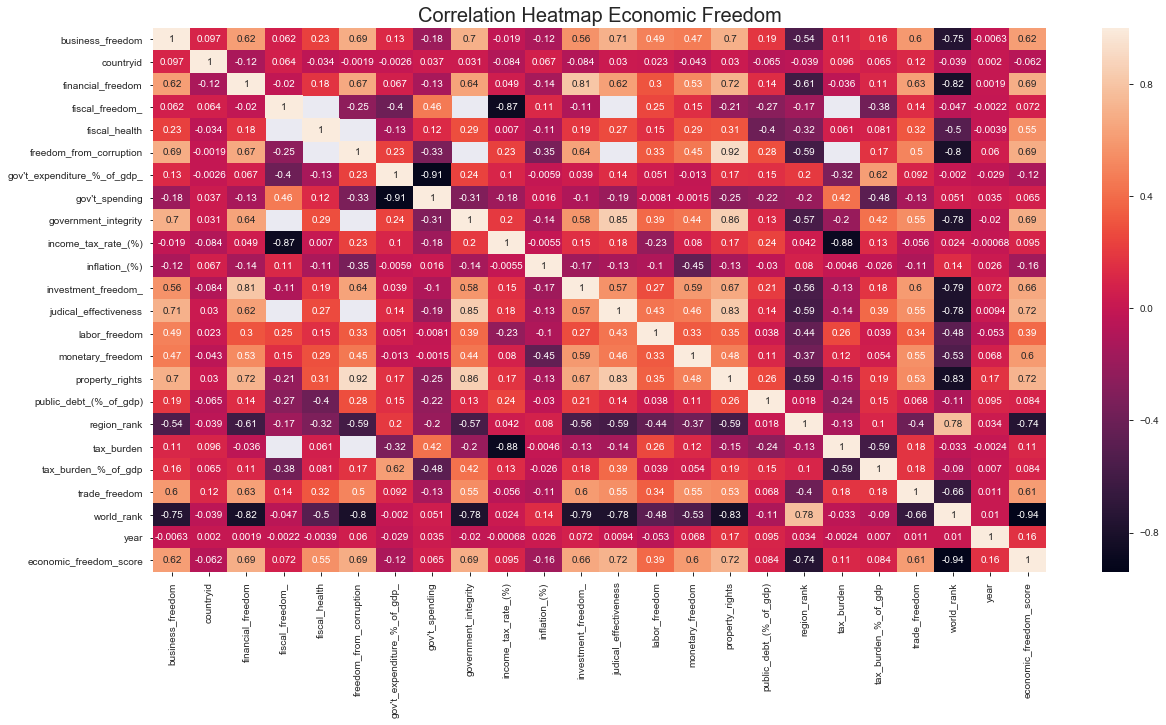

In [109]:
#I believe that some of these values are blank because of missingness
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Heatmap Economic Freedom', fontsize = 20);

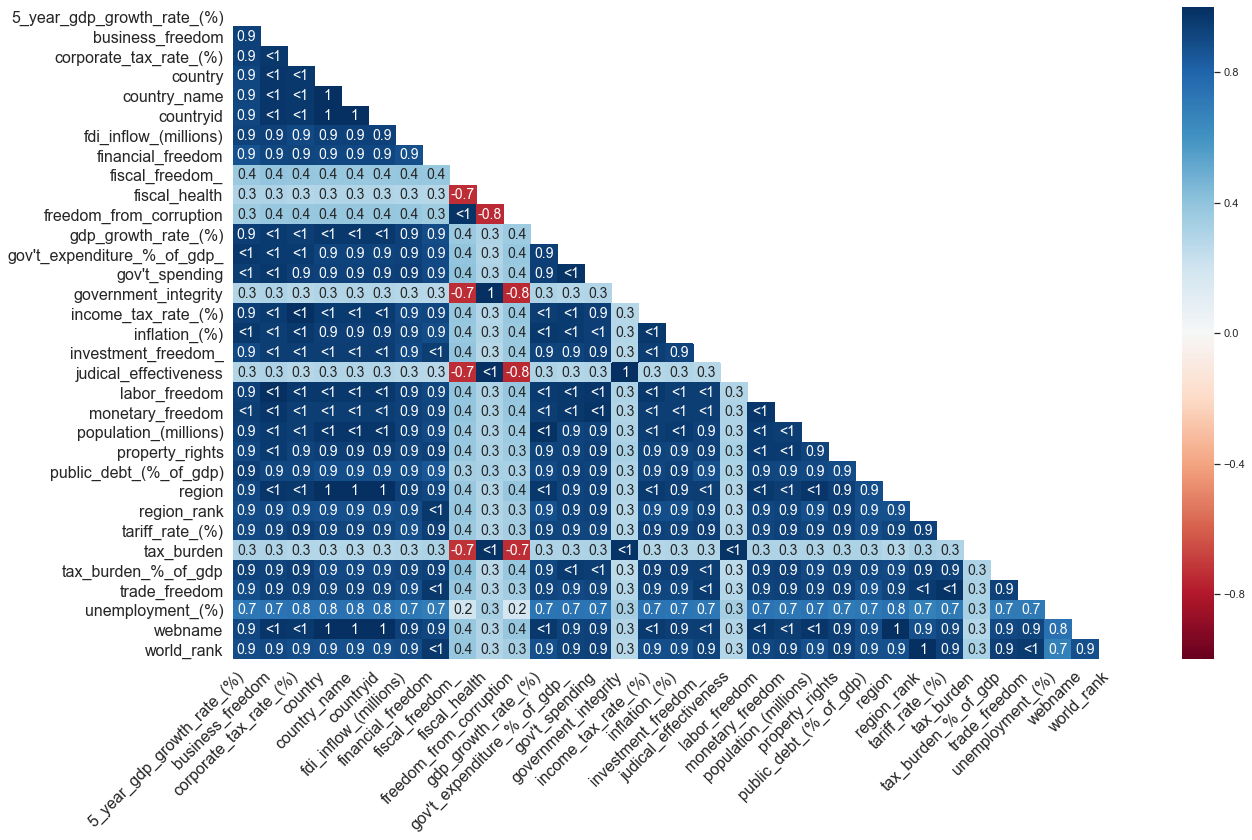

In [155]:
#missingness relationship heatmap, is missingness at random? MNAR, MCAR?- no these values are not missing at random at all (included this because pandas profile
# wont populate into github, wanted everyone to be able to see it)
import missingno as msno
msno.heatmap(df)

In [208]:
#reset the axis since we fudged with the data
df = df.reset_index()
df.drop('index', axis = 1, inplace = True)

In [209]:
df.head(2)

5_year_gdp_growth_rate_(%)  business_freedom corporate_tax_rate_(%)  \
0                        2.9              49.2                     20   
1                        6.8              56.6                     20   

       country country_name  countryid fdi_inflow_(millions)  \
0  afghanistan  afghanistan        1.0                  53.9   
1  afghanistan  afghanistan        1.0                  53.6   

   financial_freedom  fiscal_freedom_  fiscal_health  freedom_from_corruption  \
0               10.0              NaN           99.3                      NaN   
1                NaN             91.6            NaN                     12.0   

  gdp_(billions,_ppp) gdp_growth_rate_(%) gdp_per_capita_(ppp)  \
0               69.6                  2.5                 1958   
1               60.6                  1.5                 1937   

   gov't_expenditure_%_of_gdp_  gov't_spending  government_integrity  \
0                         25.6            80.3                  25.2   
1                         25.0            81.2                   NaN   

   income_tax_rate_(%)  inflation_(%)  investment_freedom_  \
0                 20.0            5.0                 10.0   
1                 20.0            4.6                 55.0   

   judical_effectiveness  labor_freedom  monetary_freedom  \
0                   29.6           60.4              76.7   
1                    NaN           63.2               NaN   

  population_(millions)  property_rights  public_debt_(%_of_gdp)  \
0                  35.5             19.6                     7.3   
1                  31.3              NaN                     6.7   

         region  region_rank tariff_rate_(%)  tax_burden  tax_burden_%_of_gdp  \
0  asia-pacific         39.0               7        91.7                  5.0   
1  asia-pacific          NaN             NaN         NaN                  6.6   

   trade_freedom unemployment_(%)      webname  world_rank  year  \
0           66.0              8.8  afghanistan       152.0  2019   
1            NaN              9.1  afghanistan         NaN  2016   

   economic_freedom_score  
0                    51.5  
1                     0.0

In [210]:
#replacing redundant country names in the data, starting with the congo

#I should note here, hilariously, that taiwan was duplicating becuase there was a space after the name, which was creating 2 separate
#instances of taiwan 
dict = {'congo, republic of': 'the congo', 'congo, democratic republic of the congo':'the congo', 'democratic republic of congo':'the congo', 
        'republic of congo':'the congo', 'hong kong sar':'hong kong', 'taiwan ':'taiwan'}

df['country'].replace(dict, inplace = True)

In [211]:
#averages by country
av_scores = df.groupby('country').economic_freedom_score.mean().sort_values()
av_scores.sort_values(ascending = False).head(15)

country
hong kong         89.685714
singapore         88.771429
new zealand       82.657143
switzerland       81.314286
australia         81.300000
canada            78.657143
ireland           77.628571
chile             77.285714
estonia           77.100000
united kingdom    76.457143
denmark           76.028571
united states     75.814286
mauritius         75.328571
taiwan            75.257143
netherlands       74.971429
Name: economic_freedom_score, dtype: float64

__filter out top 16 countries__

In [212]:
#create an overall top 12 dataframe for use perhaps
top_countries = df[df['country'].str.contains('united states|united kingdom|hong kong|singapore|new zealand|switzerland|australia|canada|ireland|chile| \
                                estonia|taiwan|denmark') == True]

#get top 5 countries with US
top6 = df[df['country'].str.contains('hong kong|singapore|new zealand|switzerland|australia|united states') == True]

#get next 5 with US
next6 = df[df['country'].str.contains('ireland|united kingdom|canada|united arab emirates|taiwan|united states') == True]

#get next 5 with US
last6 = df[df['country'].str.contains('united states|iceland|netherlands|denmark|estonia|georgia') == True]

#capitalize country names using str.title(), str.title() capitalizes the first letter of every separate word in a column
# I am capitalizing for the sake of plotting, so that they plots look more professional
top6['country'] = [str.title() for str in top6['country']]
next6['country'] = [str.title() for str in next6['country']]
last6['country'] = [str.title() for str in last6['country']]

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

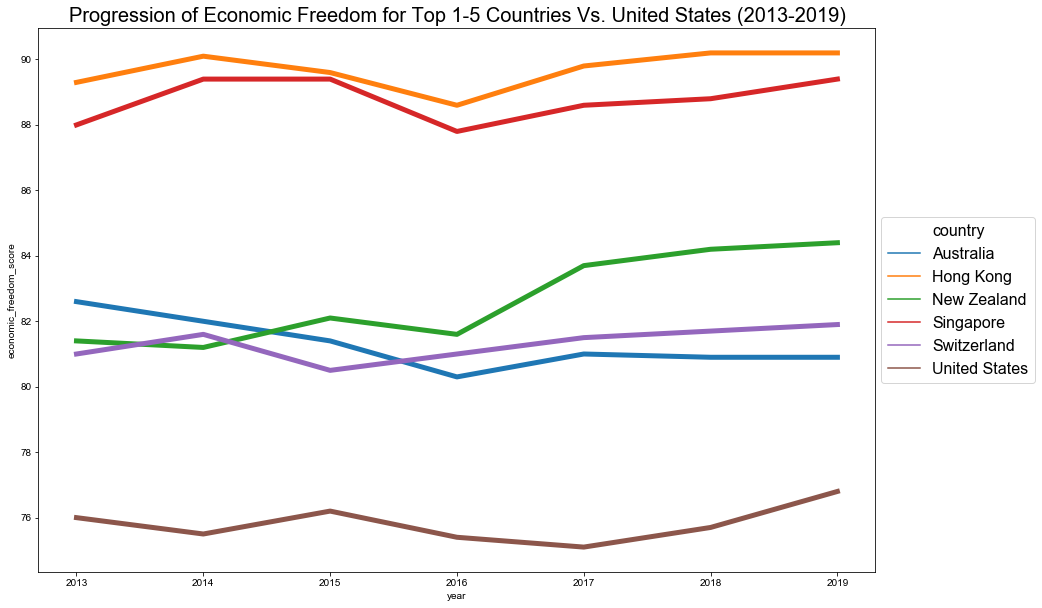

In [123]:
plt.figure(figsize = (15, 10))
ax = sns.lineplot(data = top6, y = 'economic_freedom_score', x = 'year', hue = 'country', markers = True, markersize = 12)  #add style = 'country' for styled lines
plt.title('Progression of Economic Freedom for Top 1-5 Countries Vs. United States (2013-2019)', fontsize = 20)
# plt.legend(loc = 2) #location changes depending on numeric value
ax.legend(loc='center right', bbox_to_anchor=(1.2, .5), ncol=1, fontsize = '16')
sns.set(style = 'darkgrid')
plt.setp(ax.lines,linewidth=5); #linewidth change

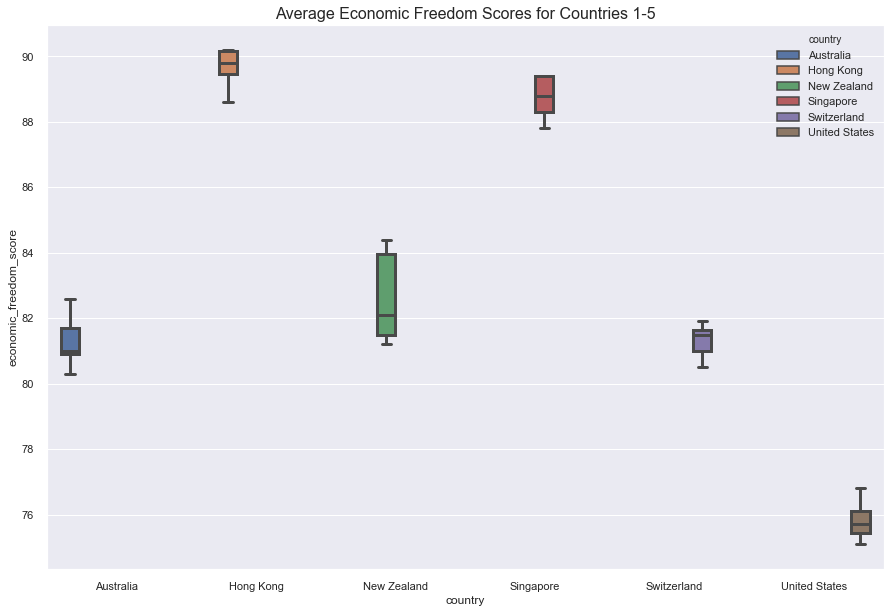

In [116]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = top6, x = 'country', y = 'economic_freedom_score', hue = 'country', linewidth = 3)
plt.title('Average Economic Freedom Scores for Countries 1-5', fontsize = 16);

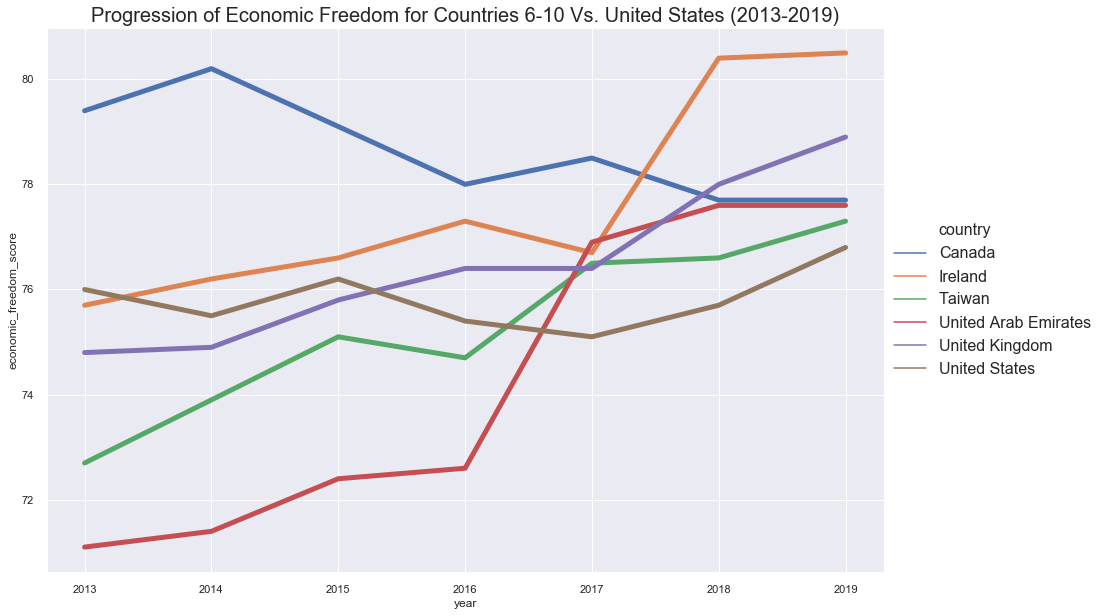

In [117]:
plt.figure(figsize = (15, 10))
ax = sns.lineplot(data = next6, y = 'economic_freedom_score', x = 'year', hue = 'country', markers = True, markersize = 12)
plt.title('Progression of Economic Freedom for Countries 6-10 Vs. United States (2013-2019)', fontsize = 20)
ax.legend(loc='center right', bbox_to_anchor=(1.265, .5), ncol=1, fontsize = '16')
sns.set(style = 'darkgrid')
plt.setp(ax.lines,linewidth=5); #linewidth change

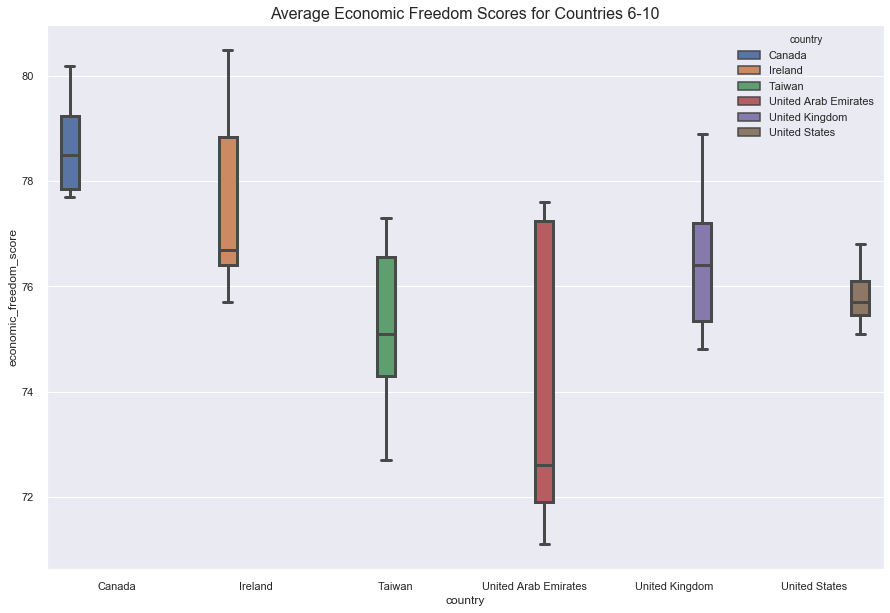

In [118]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = next6, x = 'country', y = 'economic_freedom_score', hue = 'country', linewidth = 3)
plt.title('Average Economic Freedom Scores for Countries 6-10', fontsize = 16);

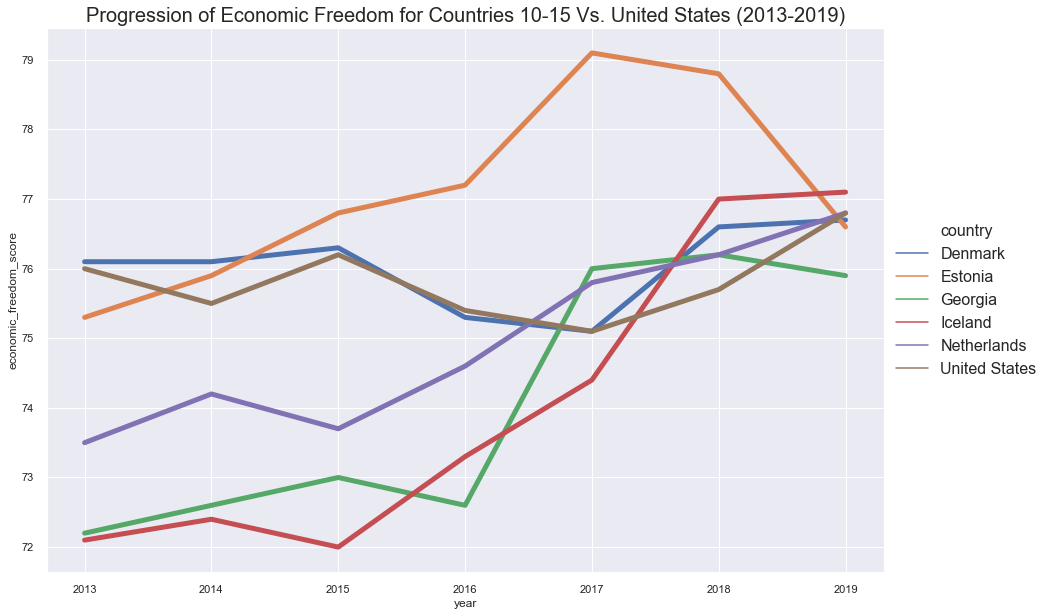

In [119]:
plt.figure(figsize = (15, 10))
ax = sns.lineplot(data = last6, y = 'economic_freedom_score', x = 'year', hue = 'country', markers = True, markersize = 12)
plt.title('Progression of Economic Freedom for Countries 10-15 Vs. United States (2013-2019)', fontsize = 20)
ax.legend(loc='center right', bbox_to_anchor=(1.2, .5), ncol=1, fontsize = '16')
sns.set(style = 'darkgrid')
plt.setp(ax.lines,linewidth=5);

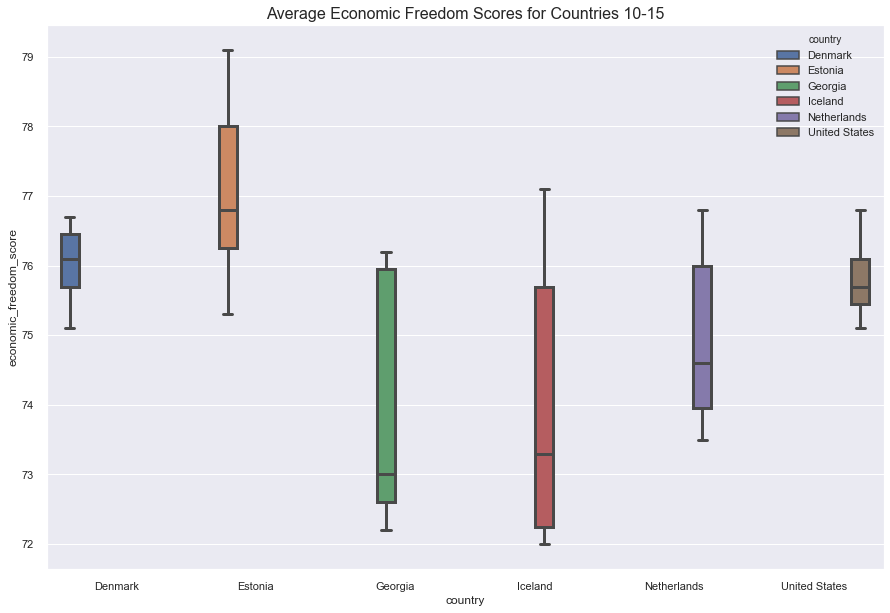

In [120]:
plt.figure(figsize = (15, 10))
sns.boxplot(data = last6, x = 'country', y = 'economic_freedom_score', hue = 'country', linewidth = 3)
plt.title('Average Economic Freedom Scores for Countries 10-15', fontsize = 16);

__Export these data files to csvs to use in Tableau Dashboard__

In [311]:
# top6.to_csv('top6countries.csv')
# next6.to_csv('next6.csv')
# last6.to_csv('last6.csv')

# Looking at Climate Change Legislation Data
- This database http://www.lse.ac.uk/GranthamInstitute/climate-change-laws-of-the-world/?region=all&country=all&fromyear=all&toyear=all&emitter=all&income=all&framework=all&execleg=all&category=all&document=all&type=law
- This contains all of the pieces of legislation related to climate change worldwide

- Climate Change Laws of the World covers national-level climate change legislation and policies globally. The database covers climate and climate-related laws, as well as laws and policies promoting low carbon transitions, which reflects the relevance of climate policy in areas including energy, transport, land use, and climate resilience.

In [213]:
climate = pd.read_csv('climate change legislation.csv')

In [214]:
climate.head()

Country                              Name  Year Passed  \
0      South Africa                 Carbon Tax Act 15         2019   
1       Netherlands                       Climate Act         2019   
2         Australia         Climate Solutions Package         2019   
3           Ecuador  Organic Law on energy efficiency         2019   
4  Marshall Islands             2050 Climate Strategy         2018   

  Executive/Legislative                  Framework  \
0           Legislative                         No   
1           Legislative                 Mitigation   
2             Executive                         No   
3           Legislative                         No   
4             Executive  Mitigation and adaptation   

                                          Categories Document Type  
0                      Carbon Pricing; Energy Demand           Act  
1  Industry; Institutions / Administrative arrang...           Law  
2  Energy Demand; Energy Supply; Industry; Instit...        Policy  
3                       Energy Demand; Energy Supply           Law  
4  Adaptation; Energy Demand; Energy Supply; Inst...      Strategy

In [215]:
climate = climate.sort_values('Country')

In [216]:
climate.head()

Country                                               Name  \
277   Afghanistan                   National Renewable Energy Policy   
148   Afghanistan  National Comprehensive Agriculture Development...   
631   Afghanistan  Law on Disaster Response, Management, and Prep...   
547   Afghanistan               Rural Renewable Energy Policy (RREP)   
1104  Afghanistan   Energy Sector Strategy 1387-1391 (2007/8-2012/3)   

      Year Passed Executive/Legislative Framework  \
277          2015             Executive        No   
148          2016             Executive       NaN   
631          2012           Legislative       NaN   
547          2013             Executive       NaN   
1104         2008             Executive       NaN   

                                        Categories Document Type  
277   Carbon Pricing; Energy Demand; Energy Supply        Policy  
148                                     Adaptation     Programme  
631                                     Adaptation           Law  
547                      Adaptation; Energy Supply        Policy  
1104                                 Energy Supply      Strategy

In [217]:
#lower case the column names, need to do this for the data as well
climate.columns = [str.lower() for str in climate.columns]

In [218]:
# place a _ in white space
climate.columns = [str.replace(' ', '_') for str in climate.columns]

In [219]:
#lower case the entire data set
climate = climate.applymap(lambda s: s.lower() if type(s) == str else s)

## This group below is fascinating, the countries that are on the top of this list vary from the countries in the top of the Economic Freedom Index

In [220]:
#how many pieces of legislation does each country have total?
country_totals = climate.groupby('country').name.size().sort_values(ascending = False)
country_totals = pd.DataFrame(country_totals).reset_index()
country_totals.columns = [str.replace('name', 'pieces_of_legislation') for str in country_totals.columns]

In [132]:
country_totals.head(20)

country  pieces_of_legislation
0   european union                     31
1            spain                     28
2           brazil                     26
3            italy                     23
4        indonesia                     21
5   united kingdom                     20
6            japan                     20
7          germany                     19
8        australia                     18
9          uruguay                     17
10          israel                     17
11        colombia                     17
12         ireland                     17
13        slovakia                     17
14     philippines                     16
15      costa rica                     16
16     netherlands                     16
17          zambia                     15
18     south korea                     15
19         vietnam                     15

In [133]:
# looking at how many countries are in the database since the number varies depending on the data available to the researchers
climate['country'].nunique()

198

In [134]:
#is Taiwan treated seperately? Yes it appears so 
climate[climate['country'] == 'taiwan']

country                                               name  year_passed  \
1157  taiwan                   renewable energy development act         2008   
63    taiwan                                    electricity act         2017   
1161  taiwan  strategic framework for sustainable energy policy         2008   
232   taiwan        greenhouse gas reduction and management act         2015   
688   taiwan   strategic framework on climate change adaptation         2012   

     executive/legislative                  framework  \
1157           legislative                        NaN   
63             legislative                        NaN   
1161             executive                        NaN   
232            legislative  mitigation and adaptation   
688              executive                        NaN   

                                             categories document_type  
1157                       energy demand; energy supply           law  
63                         energy demand; energy supply           law  
1161                       energy demand; energy supply        policy  
232   adaptation; carbon pricing; energy demand; ene...           law  
688   adaptation; institutions / administrative arra...        policy

In [135]:
#what does the USA climate legislation/policy look like?
climate[climate.country.str.contains('united states of america')]

country  \
967   united states of america   
338   united states of america   
1572  united states of america   
1098  united states of america   
201   united states of america   
1112  united states of america   
128   united states of america   
1301  united states of america   
1189  united states of america   
1195  united states of america   
1555  united states of america   
214   united states of america   

                                                   name  year_passed  \
967              american recovery and reinvestment act         2009   
338   executive order 13677: climate-resilient inter...         2014   
1572                                      clean air act         1963   
1098  duncan hunter national defense authorisation a...         2008   
201                                    clean power plan         2015   
1112  food, conservation, and energy act of 2008 (re...         2008   
128                                electrify africa act         2016   
1301               energy policy act 2005 (energy bill)         2005   
1189       energy independence and security act of 2007         2007   
1195  executive order 13423: strengthening federal e...         2007   
1555                 global change research act of 1990         1990   
214               consolidated appropriations act, 2016         2015   

     executive/legislative framework  \
967            legislative       NaN   
338              executive        no   
1572           legislative       NaN   
1098           legislative       NaN   
201              executive       NaN   
1112           legislative       NaN   
128            legislative       NaN   
1301           legislative       NaN   
1189           legislative       NaN   
1195             executive       NaN   
1555           legislative        no   
214            legislative       NaN   

                                             categories  \
967   energy supply; research and development; trans...   
338   adaptation; institutions / administrative arra...   
1572  energy supply; institutions / administrative a...   
1098  energy demand; energy supply; research and dev...   
201                                       energy supply   
1112  energy demand; energy supply; redd+ and lulucf...   
128   energy demand; energy supply; institutions / a...   
1301  energy demand; energy supply; research and dev...   
1189  energy demand; energy supply; research and dev...   
1195       energy demand; energy supply; transportation   
1555  adaptation; institutions / administrative arra...   
214   energy supply; institutions / administrative a...   

               document_type  
967                      law  
338   decree/order/ordinance  
1572                     law  
1098                     law  
201                     plan  
1112                     law  
128                      law  
1301                     law  
1189                     law  
1195  decree/order/ordinance  
1555                     law  
214                      law

In [221]:
top = pd.DataFrame(country_totals['pieces_of_legislation'].nlargest(11))
top['country'] = country_totals['country']
top = pd.DataFrame(top).reset_index().drop('index', axis = 1)
top = top[top['country'] != 'european union']

In [222]:
top

pieces_of_legislation         country
1                      28           spain
2                      26          brazil
3                      23           italy
4                      21       indonesia
5                      20  united kingdom
6                      20           japan
7                      19         germany
8                      18       australia
9                      17         uruguay
10                     17          israel

In [223]:
top.columns = [str.replace('name', 'pieces of legislation') for str in top.columns]

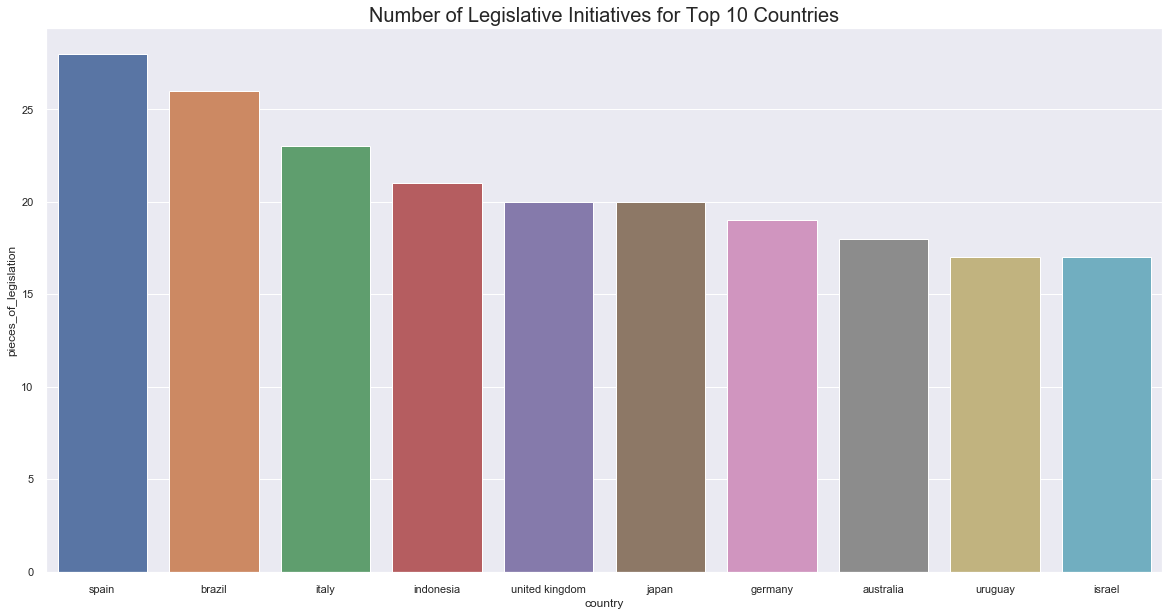

In [167]:
plt.figure(figsize = (20, 10))
sns.barplot( data = top, x = 'country', y = 'pieces_of_legislation')
plt.title('Number of Legislative Initiatives for Top 10 Countries', fontsize = 20);

In [144]:
#country_totals.to_csv('climate_legislation.csv')

# Looking at GGEI Scores
- I am going to scale these and add the into the EFI to see what happens!
- The GGEI will serve as the "ERT (Environmental Regulation)" portion of the EFFERT Index

In [224]:
ggei = pd.read_csv('GGEI SCORES.csv')

In [225]:
ggei.head()

Country   Score
0       Sweden  0.7608
1  Switzerland  0.7594
2      Iceland  0.7129
3       Norway  0.7031
4      Finland  0.6997

In [226]:
#multiplying by 100 allows me to add this score into the EFI data in a more interpretable way, I will do the same with the female equality index that I will create 
ggei['Score'] = ggei['Score'] * 100 
ggei.head()

Country  Score
0       Sweden  76.08
1  Switzerland  75.94
2      Iceland  71.29
3       Norway  70.31
4      Finland  69.97

In [227]:
#looking at the EFI information for the year 2018 to compare with the GGEI for 2018, I wil be using 2018 as the base year for my comparison
df2 = df[df['year'] == 2018]

In [228]:
df2.head()

5_year_gdp_growth_rate_(%)  business_freedom corporate_tax_rate_(%)  \
2                      4.3882              53.0                     20   
7                      2.0478              69.1                     15   
20                     3.5802              68.1                     23   
27                      3.956              58.3                     30   
33                     -0.157              56.2                     35   

        country country_name  countryid fdi_inflow_(millions)  \
2   afghanistan  afghanistan        1.0            99.5689663   
7       albania      albania        2.0           1124.348062   
20      algeria      algeria        3.0                  1546   
27       angola       angola        4.0           14363.55899   
33    argentina    argentina        5.0              5745.183   

    financial_freedom  fiscal_freedom_  fiscal_health  \
2                10.0              NaN           98.3   
7                70.0              NaN           67.5   
20               30.0              NaN           19.2   
27               40.0              NaN           54.8   
33               60.0              NaN           52.6   

    freedom_from_corruption gdp_(billions,_ppp) gdp_growth_rate_(%)  \
2                       NaN              64.081                 1.5   
7                       NaN              34.155                 2.6   
20                      NaN             612.513                 3.7   
27                      NaN             187.261                   3   
33                      NaN             874.072                 1.2   

   gdp_per_capita_(ppp)  gov't_expenditure_%_of_gdp_  gov't_spending  \
2              1918.599                    26.298667            79.3   
7             11840.228                    30.149333            72.7   
20            15026.461                    42.472000            45.9   
27             6844.433                    32.084000            69.1   
33            20047.489                    38.489333            55.6   

    government_integrity  income_tax_rate_(%)  inflation_(%)  \
2                   26.2                 20.0          4.384   
7                   39.9                 23.0          1.275   
20                  29.0                 35.0          6.398   
27                  18.9                 17.0         32.378   
33                  32.6                 35.0         58.400   

    investment_freedom_  judical_effectiveness  labor_freedom  \
2                  10.0                   28.2           57.3   
7                  70.0                   25.4           50.4   
20                 25.0                   35.2           48.7   
27                 30.0                   25.4           50.9   
33                 55.0                   44.5           43.3   

    monetary_freedom population_(millions)  property_rights  \
2               77.8                  33.4             17.9   
7               82.4                 2.885             54.1   
20              69.9                40.762             27.8   
27              58.5                 27.36             36.0   
33              51.3                  43.6             40.8   

    public_debt_(%_of_gdp)                      region  region_rank  \
2                    8.271                asia-pacific         38.0   
7                   71.536                      europe         32.0   
20                  20.356  middle east / north africa         14.0   
27                  71.883          sub-saharan africa         40.0   
33                  51.269                    americas         26.0   

   tariff_rate_(%)  tax_burden  tax_burden_%_of_gdp  trade_freedom  \
2             7.02        91.8                  5.0           66.0   
7             1.11        85.1                 27.2           87.8   
20            8.27        74.0                 29.1           63.5   
27           10.24        82.4                 24.0           59.5   
33            7.35        65.7  

In [229]:
df2.columns = [c.replace("'", "") for c in df2.columns]

In [230]:
df2.head()

5_year_gdp_growth_rate_(%)  business_freedom corporate_tax_rate_(%)  \
2                      4.3882              53.0                     20   
7                      2.0478              69.1                     15   
20                     3.5802              68.1                     23   
27                      3.956              58.3                     30   
33                     -0.157              56.2                     35   

        country country_name  countryid fdi_inflow_(millions)  \
2   afghanistan  afghanistan        1.0            99.5689663   
7       albania      albania        2.0           1124.348062   
20      algeria      algeria        3.0                  1546   
27       angola       angola        4.0           14363.55899   
33    argentina    argentina        5.0              5745.183   

    financial_freedom  fiscal_freedom_  fiscal_health  \
2                10.0              NaN           98.3   
7                70.0              NaN           67.5   
20               30.0              NaN           19.2   
27               40.0              NaN           54.8   
33               60.0              NaN           52.6   

    freedom_from_corruption gdp_(billions,_ppp) gdp_growth_rate_(%)  \
2                       NaN              64.081                 1.5   
7                       NaN              34.155                 2.6   
20                      NaN             612.513                 3.7   
27                      NaN             187.261                   3   
33                      NaN             874.072                 1.2   

   gdp_per_capita_(ppp)  govt_expenditure_%_of_gdp_  govt_spending  \
2              1918.599                   26.298667           79.3   
7             11840.228                   30.149333           72.7   
20            15026.461                   42.472000           45.9   
27             6844.433                   32.084000           69.1   
33            20047.489                   38.489333           55.6   

    government_integrity  income_tax_rate_(%)  inflation_(%)  \
2                   26.2                 20.0          4.384   
7                   39.9                 23.0          1.275   
20                  29.0                 35.0          6.398   
27                  18.9                 17.0         32.378   
33                  32.6                 35.0         58.400   

    investment_freedom_  judical_effectiveness  labor_freedom  \
2                  10.0                   28.2           57.3   
7                  70.0                   25.4           50.4   
20                 25.0                   35.2           48.7   
27                 30.0                   25.4           50.9   
33                 55.0                   44.5           43.3   

    monetary_freedom population_(millions)  property_rights  \
2               77.8                  33.4             17.9   
7               82.4                 2.885             54.1   
20              69.9                40.762             27.8   
27              58.5                 27.36             36.0   
33              51.3                  43.6             40.8   

    public_debt_(%_of_gdp)                      region  region_rank  \
2                    8.271                asia-pacific         38.0   
7                   71.536                      europe         32.0   
20                  20.356  middle east / north africa         14.0   
27                  71.883          sub-saharan africa         40.0   
33                  51.269                    americas         26.0   

   tariff_rate_(%)  tax_burden  tax_burden_%_of_gdp  trade_freedom  \
2             7.02        91.8                  5.0           66.0   
7             1.11        85.1                 27.2           87.8   
20            8.27        74.0                 29.1           63.5   
27           10.24        82.4                 24.0           59.5   
33            7.35        65.7              

In [231]:
#notice 'judical' effectiveness (ugh)
EFI_2018 = df2[['country', 'property_rights', 'judical_effectiveness', 'government_integrity', 'tax_burden', 'govt_spending', 'fiscal_health', 'business_freedom', 
           'labor_freedom', 'monetary_freedom', 'trade_freedom', 'investment_freedom_', 'financial_freedom', 'economic_freedom_score']]

EFI_2018.sort_values(by = ['economic_freedom_score'], ascending = False, inplace = True)

EFI_2018.head()

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


country  property_rights  judical_effectiveness  \
489     hong kong             92.5                   84.3   
1018    singapore             98.4                   90.9   
837   new zealand             95.1                   88.4   
1106  switzerland             84.2                   82.1   
46      australia             78.7                   93.4   

      government_integrity  tax_burden  govt_spending  fiscal_health  \
489                   82.8        93.1           90.2          100.0   
1018                  91.2        90.4           90.6           80.0   
837                   95.7        70.5           49.5           98.3   
1106                  82.8        70.5           65.4           95.9   
46                    77.4        63.0           61.2           84.3   

      business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
489               96.3           89.4              84.3           90.0   
1018              90.9           92.6              85.2           90.0   
837               91.5           84.4              90.0           87.4   
1106              75.7           73.9              85.2           90.0   
46                89.1           79.7              87.4           86.2   

      investment_freedom_  financial_freedom  economic_freedom_score  
489                  90.0               90.0                    90.2  
1018                 85.0               80.0                    88.8  
837                  80.0               80.0                    84.2  
1106                 85.0               90.0                    81.7  
46                   80.0               90.0                    80.9

In [232]:
#as long as each country has been given an economic freedom score, I think we can proceed
EFI_2018.isna().sum()

country                   0
property_rights           1
judical_effectiveness     1
government_integrity      1
tax_burden                5
govt_spending             3
fiscal_health             2
business_freedom          2
labor_freedom             2
monetary_freedom          2
trade_freedom             3
investment_freedom_       2
financial_freedom         5
economic_freedom_score    0
dtype: int64

In [233]:
ggei.columns = [c.lower() for c in ggei.columns]

In [234]:
#gotta lower the entire df
ggei = ggei.applymap(lambda s: s.lower() if type(s) == str else s)

## Which countries are actually shared between both data sets?

In [235]:
#which countries are not in the EFI for 2018 that are in the GGEI?
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19                         monaco  59.09
25                    south korea  55.91
38                        andorra  53.46
41                     cape verde  52.55
62                           laos  48.13
79   democratic republic of congo  46.02
84                        myanmar  45.15
86                  cote d'ivoire  44.89
104            russian federation  41.15
111                       niger    39.57
115         sao tome and principe  39.12
123           trinidad and tobego  37.78
124                         congo  37.64
126            bosnia-herzegovina  34.41

In [151]:
#which countries from the EFI are not included in the GGEI analysis? Too many :(, but that will be ok for our analysis of the top countries and how they shift
EFI_2018[EFI_2018.country.isin(ggei.country) == False]

country  property_rights  \
489                          hong kong        92.500000   
610                       korea, south        79.400000   
695                              macau        60.000000   
142                           botswana        57.700000   
578                         kazakhstan        56.000000   
556                            jamaica        60.900000   
968   saint vincent and the grenadines        36.700000   
615                             kosovo        52.300000   
154                  brunei darussalam        56.600000   
443                          guatemala        40.400000   
64                             bahamas        46.500000   
351                        el salvador        37.300000   
1177                             tonga        62.100000   
627                    kyrgyz republic        50.200000   
900                           paraguay        38.300000   
388                               fiji        68.300000   
300                     cã´te d'ivoire        39.400000   
1216                            uganda        43.500000   
118                             bhutan        60.900000   
977                              samoa        53.100000   
133             bosnia and herzegovina        39.500000   
482                           honduras        44.300000   
184                         cabo verde        42.100000   
847                          nicaragua        29.800000   
464                             guyana        42.100000   
820                            namibia        56.600000   
1137                        tajikistan        46.800000   
951                             russia        48.700000   
93                             belarus        53.500000   
1062                         sri lanka        46.500000   
1187               trinidad and tobago        54.900000   
1040                   solomon islands        49.400000   
104                             belize        42.100000   
83                            barbados        51.400000   
1091                         swaziland        55.300000   
895                   papua new guinea        38.000000   
658                            lesotho        49.400000   
174                              burma        32.500000   
633                         lao p.d.r.        34.100000   
1124          sã£o tomã© and prã­ncipe        38.000000   
775                         micronesia         5.200000   
413                             gambia        34.400000   
254                          the congo        24.100000   
718                             malawi        33.100000   
1009                      sierra leone        33.600000   
1257                        uzbekistan        48.700000   
2                          afghanistan        17.900000   
664                            liberia        28.200000   
524                               iran        32.500000   
590                           kiribati        45.000000   
855                              niger        37.400000   
1081                             sudan        27.800000   
27                              angola        36.000000   
1090                          suriname        39.700000   
1161                       timor-leste        29.900000   
1207                      turkmenistan        29.800000   
20                             algeria        27.800000   
123                            bolivia        19.000000   
1294                          zimbabwe        27.600000   
367                            eritrea        35.500000   
258                          the congo        32.400000   
280                               cuba        29.700000   
1271                         venezuela         5.200000   
602                      korea, north         29.800000   
529                               iraq        36.700000   
671                              libya         5.200000   
678                      liechtenstein              NaN   
1285               

__Cleaning the data for country names, many of these countries are included in both data sets, but the names are slightly different, I am going to attempt to clean the country names to the point that the countries more central to our analysis are corrected based on the timeframe that I have in completing this project__

In [236]:
#I know Russia is included in both, but the data says otherwise, the names must be different, Russia is sometimes "Russian Federation"
EFI_2018[EFI_2018.country.str.contains('rus') == True]

country  property_rights  judical_effectiveness  \
287             cyprus             71.2                   56.7   
154  brunei darussalam             56.6                   57.1   
951             russia             48.7                   46.9   
93             belarus             53.5                   57.3   

     government_integrity  tax_burden  govt_spending  fiscal_health  \
287                  41.3        75.2           52.9           79.3   
154                  45.4        85.6           57.7           20.0   
951                  38.1        85.8           62.5           87.7   
93                   42.0        89.8           47.9           75.4   

     business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
287              77.0           55.7              83.0           86.9   
154              79.9           88.9              75.1           89.1   
951              77.0           52.0              60.8           79.4   
93               74.1           73.1              62.3           81.4   

     investment_freedom_  financial_freedom  economic_freedom_score  
287                 75.0               60.0                    67.8  
154                 65.0               50.0                    64.2  
951                 30.0               30.0                    58.2  
93                  30.0               10.0                    58.1

In [237]:
ggei[ggei.country.str.contains('rus') == True]

country  score
85               cyprus  45.11
104  russian federation  41.15

In [238]:
#lets see if we can correct this
russia = {'russian federation':'russia'}
ggei.country.replace(russia, inplace = True)

#see if it worked
ggei[ggei.country.str.contains('rus') == True]
#yay it worked! on to the next country, I may decide to do this in one giant block of code if the indiviual ones are becoming too monotonous 

country  score
85   cyprus  45.11
104  russia  41.15

In [239]:
#now moving to the Congo, this is another country that frequently is called something different in these databases
EFI_2018[EFI_2018['country'].astype(str).str.contains('congo') == True]

country  property_rights  judical_effectiveness  government_integrity  \
254  the congo             24.1                   23.9                  27.3   
258  the congo             32.4                   28.2                  24.6   

     tax_burden  govt_spending  fiscal_health  business_freedom  \
254        73.2           94.8           99.1              60.2   
258        60.8           33.4            6.2              31.3   

     labor_freedom  monetary_freedom  trade_freedom  investment_freedom_  \
254           47.8              60.3           64.6                 30.0   
258           34.1              73.8           61.9                 50.0   

     financial_freedom  economic_freedom_score  
254               20.0                    52.1  
258               30.0                    38.9

In [240]:
ggei[ggei['country'].astype(str).str.contains('congo') == True]

country  score
79   democratic republic of congo  46.02
124                         congo  37.64

In [241]:
congo = {'democratic republic of congo':'the congo', 'congo':'the congo'}

ggei.country.replace(congo, inplace = True)

ggei[ggei.country.str.contains('congo') == True]

#cool it worked

country  score
79   the congo  46.02
124  the congo  37.64

In [242]:
#looks like Hong Kong, a high scorer in the EFI, is not used in the GGEI, another roadblock to comparing sovereign nations with countries, I will preface
# the blog post with an explanation of this unfortunate quirk in combining index data
ggei[ggei.country.str.contains('kong') == True]

Empty DataFrame
Columns: [country, score]
Index: []

In [243]:
EFI_2018[EFI_2018.country.str.contains('kong') == True]

country  property_rights  judical_effectiveness  government_integrity  \
489  hong kong             92.5                   84.3                  82.8   

     tax_burden  govt_spending  fiscal_health  business_freedom  \
489        93.1           90.2          100.0              96.3   

     labor_freedom  monetary_freedom  trade_freedom  investment_freedom_  \
489           89.4              84.3           90.0                 90.0   

     financial_freedom  economic_freedom_score  
489               90.0                    90.2

In [244]:
#now I will fix the korea, south issue in the GGEI, since north korea is not included in the index
korea = {'korea, south':'south korea'}

ggei.country.replace(korea, inplace = True)

ggei[ggei.country.str.contains('korea') == True]

#cool it worked 

country  score
25  south korea  55.91

In [245]:
#now lets look at that original list of countries that were not shared between the GGEI and the EFI to see what else we need to clean (remember a lot of these 
# countries were not included in the GGEI at all, so we are going to look at the ones that are not shared between the GGEI and EFI in that order)
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19                  monaco  59.09
25             south korea  55.91
38                 andorra  53.46
41              cape verde  52.55
62                    laos  48.13
84                 myanmar  45.15
86           cote d'ivoire  44.89
111                niger    39.57
115  sao tome and principe  39.12
123    trinidad and tobego  37.78
126     bosnia-herzegovina  34.41

In [246]:
#Ahh, so we need to replace the name in the EFI, got it
EFI_2018[EFI_2018.country.str.contains('korea') == True]

country  property_rights  judical_effectiveness  \
610   korea, south             79.4                   63.7   
602  korea, north              29.8                    5.0   

     government_integrity  tax_burden  govt_spending  fiscal_health  \
610                  49.9        73.3           68.8           97.0   
602                  25.2         0.0            0.0            0.0   

     business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
610              90.7           58.7              83.9           80.4   
602               5.0            5.0               0.0            0.0   

     investment_freedom_  financial_freedom  economic_freedom_score  
610                 70.0               70.0                    73.8  
602                  0.0                0.0                     5.8

In [247]:
EFI_2018.country.replace(korea, inplace = True)

EFI_2018[EFI_2018.country.str.contains('korea') == True]

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


country  property_rights  judical_effectiveness  \
610    south korea             79.4                   63.7   
602  korea, north              29.8                    5.0   

     government_integrity  tax_burden  govt_spending  fiscal_health  \
610                  49.9        73.3           68.8           97.0   
602                  25.2         0.0            0.0            0.0   

     business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
610              90.7           58.7              83.9           80.4   
602               5.0            5.0               0.0            0.0   

     investment_freedom_  financial_freedom  economic_freedom_score  
610                 70.0               70.0                    73.8  
602                  0.0                0.0                     5.8

In [248]:
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19                  monaco  59.09
38                 andorra  53.46
41              cape verde  52.55
62                    laos  48.13
84                 myanmar  45.15
86           cote d'ivoire  44.89
111                niger    39.57
115  sao tome and principe  39.12
123    trinidad and tobego  37.78
126     bosnia-herzegovina  34.41

In [249]:
#Trinidad and Tobago is misspelled in the GGEI! I can fix that!
trinidad = {'trinidad and tobego':'trinidad and tobago'}

ggei.country.replace(trinidad, inplace = True)

ggei[ggei.country.str.contains('tobago') == True]

country  score
123  trinidad and tobago  37.78

In [250]:
#cool, so we got trinidada and tobago off our list!
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19                  monaco  59.09
38                 andorra  53.46
41              cape verde  52.55
62                    laos  48.13
84                 myanmar  45.15
86           cote d'ivoire  44.89
111                niger    39.57
115  sao tome and principe  39.12
126     bosnia-herzegovina  34.41

In [251]:
#Now I need to rectify the "Ivory Coast" issue between the GGEI and EFI
ggei_ivory = {"cote d'ivoire":'ivory coast'}

ggei.country.replace(ggei_ivory, inplace = True)

In [252]:
#this was fun to figure out, using unicode combining characters to add accents and tildes and everything else to a character!
# https://stackoverflow.com/questions/34755556/how-do-i-add-accents-to-a-letter
# list of character ids https://en.wikipedia.org/wiki/Combining_character
# although this was not how I used the code to get my answer, it is still valuable to know this little skill, as always I find several new bits of 
#knowledge randomly during a project!
# EFI_ivory = {'c' + 'a' + u'\u0342' + "`te d'ivoire":'ivory coast'}

# I ended up just copying and pasting haha
EFI_ivory = {"cã´te d'ivoire":'ivory coast'}

EFI_2018.country.replace(EFI_ivory, inplace = True)

In [253]:
ggei[ggei.country.isin(EFI_2018.country) == False]
#it worked!, now we have a few more, lets see if I can fix these too

country  score
19                  monaco  59.09
38                 andorra  53.46
41              cape verde  52.55
62                    laos  48.13
84                 myanmar  45.15
111                niger    39.57
115  sao tome and principe  39.12
126     bosnia-herzegovina  34.41

In [254]:
#I'll replace Bosnia-Herzegovina
bosnia = {'bosnia-herzegovina':'bosnia and herzegovina'}
ggei.country.replace(bosnia, inplace = True)
ggei[ggei.country.str.contains('bosnia') == True]

country  score
126  bosnia and herzegovina  34.41

In [255]:
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19                  monaco  59.09
38                 andorra  53.46
41              cape verde  52.55
62                    laos  48.13
84                 myanmar  45.15
111                niger    39.57
115  sao tome and principe  39.12

In [256]:
#now I will fix Sao Tome and Principe in the EFI
sao = {'sã£o tomã© and prã­ncipe':'sao tome and principe'}
EFI_2018.country.replace(sao, inplace = True)
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19       monaco  59.09
38      andorra  53.46
41   cape verde  52.55
62         laos  48.13
84      myanmar  45.15
111     niger    39.57

In [257]:
#now I will try to figure Niger out since they both contain Niger there must be a spacing issue here, yay!
ggei[ggei.country.str.contains('niger  ') == True]
#AHA! we found it! TWO spaces after the name! classic :)

country  score
111  niger    39.57

In [258]:
niger = {'niger  ':'niger'}
ggei.country.replace(niger, inplace = True)
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19      monaco  59.09
38     andorra  53.46
41  cape verde  52.55
62        laos  48.13
84     myanmar  45.15

In [259]:
#since "Cabo Verde" means Cape Verde, I will replace the EFI country name 
cape = {'cabo verde':'cape verde'}
EFI_2018.country.replace(cape, inplace = True)
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19   monaco  59.09
38  andorra  53.46
62     laos  48.13
84  myanmar  45.15

In [260]:
#looks like Monaco and Andorra are not included in the EFI, I will move on to Laos
laos = {'lao p.d.r.':'laos'}
EFI_2018.country.replace(laos, inplace = True)
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19   monaco  59.09
38  andorra  53.46
84  myanmar  45.15

In [261]:
#controversy aside, in order to facilitate analysis, I am going to change "Burma" in the EFI to "Myanmar" in the GGEI
myanmar = {'burma':'myanmar'}
EFI_2018.country.replace(myanmar, inplace = True)
ggei[ggei.country.isin(EFI_2018.country) == False]

country  score
19   monaco  59.09
38  andorra  53.46

__OK, looks like we cleaned all of the countries up! Now I want to move on to inserting the GGEI into the EFI and getting some scores__

In [262]:
#There are a lot of countries that are not included in the GGEI, but we can still continue our analysis with the ones that are, there simply isn't enough data 
# sometimes :(... 
len(EFI_2018.country)

186

# Inserting the GGEI data into the EFI to create the first-step of the EFFERT Index

In [263]:
climate_data = ggei[ggei.country.isin(EFI_2018.country) == True]
climate_data.head()
climate_data.shape

country  score
0       sweden  76.08
1  switzerland  75.94
2      iceland  71.29
3       norway  70.31
4      finland  69.97

(128, 2)

In [264]:
efi_data = EFI_2018[EFI_2018.country.isin(ggei.country) == True]
efi_data.head()
efi_data.shape

country  property_rights  judical_effectiveness  \
1018    singapore             98.4                   90.9   
837   new zealand             95.1                   88.4   
1106  switzerland             84.2                   82.1   
46      australia             78.7                   93.4   
538       ireland             87.7                   79.0   

      government_integrity  tax_burden  govt_spending  fiscal_health  \
1018                  91.2        90.4           90.6           80.0   
837                   95.7        70.5           49.5           98.3   
1106                  82.8        70.5           65.4           95.9   
46                    77.4        63.0           61.2           84.3   
538                   79.0        76.1           69.6           80.8   

      business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
1018              90.9           92.6              85.2           90.0   
837               91.5           84.4              90.0           87.4   
1106              75.7           73.9              85.2           90.0   
46                89.1           79.7              87.4           86.2   
538               81.8           76.4              87.4           86.9   

      investment_freedom_  financial_freedom  economic_freedom_score  
1018                 85.0               80.0                    88.8  
837                  80.0               80.0                    84.2  
1106                 85.0               90.0                    81.7  
46                   80.0               90.0                    80.9  
538                  90.0               70.0                    80.4

(128, 14)

In [265]:
efi_and_climate = efi_data.merge(climate_data)
efi_and_climate['final_score'] = (efi_and_climate['score'] + efi_and_climate['economic_freedom_score'])/2
efi_and_climate.sort_values('final_score', ascending = False, inplace  = True)
efi_and_climate.reset_index(inplace = True)

In [266]:
efi_and_climate[efi_and_climate.country.str.contains('arab') == True]
efi_and_climate[efi_and_climate.country.str.contains('china') == True]

index               country  property_rights  judical_effectiveness  \
27      8  united arab emirates             76.3                   83.4   
85     78          saudi arabia             53.1                   60.2   

    government_integrity  tax_burden  govt_spending  fiscal_health  \
27                  77.3        98.4           70.9           99.0   
85                  49.9        99.7           52.0           19.7   

    business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
27              79.9           81.1              80.2           84.3   
85              74.0           64.8              73.8           78.2   

    investment_freedom_  financial_freedom  economic_freedom_score  score  \
27                 40.0               60.0                    77.6  48.89   
85                 40.0               50.0                    59.6  44.51   

    final_score  
27       63.245  
85       52.055

index country  property_rights  judical_effectiveness  \
55     85   china             46.7                   65.4   

    government_integrity  tax_burden  govt_spending  fiscal_health  \
55                  47.3        70.4           71.6           85.9   

    business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
55              54.9           61.4              71.4           73.2   

    investment_freedom_  financial_freedom  economic_freedom_score  score  \
55                 25.0               20.0                    57.8  55.31   

    final_score  
55       56.555

In [267]:
efi_and_climate.drop('index', axis = 1, inplace = True)

In [268]:
#top countries based on economic freedom and climate metrics 
efi_and_climate[['country', 'final_score']].head(20)

country  final_score
0      switzerland       78.820
1           sweden       76.190
2        singapore       75.170
3          iceland       74.145
4           norway       72.305
5          denmark       72.300
6          finland       72.035
7      new zealand       71.740
8           taiwan       71.645
9          germany       71.550
10         ireland       70.165
11  united kingdom       70.150
12          canada       68.680
13         austria       68.295
14     netherlands       67.785
15           japan       65.785
16        colombia       65.390
17   united states       65.205
18     south korea       64.855
19           chile       64.575

In [269]:
#top countries based on economic freedom
efi_and_climate[['country', 'economic_freedom_score']].sort_values('economic_freedom_score', ascending = False).reset_index().drop('index', axis = 1).head(20)

country  economic_freedom_score
0              singapore                    88.8
1            new zealand                    84.2
2            switzerland                    81.7
3              australia                    80.9
4                ireland                    80.4
5                estonia                    78.8
6         united kingdom                    78.0
7                 canada                    77.7
8   united arab emirates                    77.6
9                iceland                    77.0
10                taiwan                    76.6
11               denmark                    76.6
12            luxembourg                    76.4
13                sweden                    76.3
14           netherlands                    76.2
15               georgia                    76.2
16         united states                    75.7
17             lithuania                    75.3
18                 chile                    75.2
19             mauritius                    75.1

In [270]:
efi_and_climate[efi_and_climate['country'] == 'united arab emirates']

country  property_rights  judical_effectiveness  \
27  united arab emirates             76.3                   83.4   

    government_integrity  tax_burden  govt_spending  fiscal_health  \
27                  77.3        98.4           70.9           99.0   

    business_freedom  labor_freedom  monetary_freedom  trade_freedom  \
27              79.9           81.1              80.2           84.3   

    investment_freedom_  financial_freedom  economic_freedom_score  score  \
27                 40.0               60.0                    77.6  48.89   

    final_score  
27       63.245

## How are the EFI and the GGEI correlated?

In [273]:
#does the EFI have any correlation with the GGEI? It seems like there is a small negative correlation, which is interesting. So... when a country gains "economic
#freedom" they are usually a little less environmentally friendly
EFI_2018['economic_freedom_score'].corr(ggei['score'])

-0.04125548067754888

# YES! This is fascinating! the differences are starting to reflect a more complete picture of the concept of "Economic Freedom" with respect to taking into consideration our climate, next comes added bonus points for legislative measures 

# Now, I need to begin looking at gender statistics to create the "FE (Female Equality)" portion of EFFERT
 - I am going to start with gender wage gaps using OECD data

In [2]:
pwd

'C:\\Users\\Sam Cannon\\Desktop\\Python\\Nicole'

In [40]:
#since the OECD data uses ISO 3 letter country codes instead of names, I need to convert these abbreviations to full names, I will be using an AWESOME package
# named country_converter https://pypi.org/project/country_converter/
import country_converter as coco

#instantiate a converter object
cc = coco.CountryConverter()

wage_gaps = pd.read_csv('gender wage gaps.csv')

standard_names = cc.convert(names = wage_gaps['LOCATION'], to = 'name_short')

In [41]:
#loop through countries and convert abbreviations to full country names
countries = []
for x in wage_gaps['LOCATION']:
    a = cc.convert(names = x, to = 'name_short')
    countries.append(a)
    
wage_gaps['country'] = countries

In [42]:
wage_gaps.head()

LOCATION INDICATOR   SUBJECT MEASURE FREQUENCY  TIME      Value  Flag Codes  \
0      AUS   WAGEGAP  EMPLOYEE      PC         A  1975  21.582734         NaN   
1      AUS   WAGEGAP  EMPLOYEE      PC         A  1976  20.754717         NaN   
2      AUS   WAGEGAP  EMPLOYEE      PC         A  1977  18.390805         NaN   
3      AUS   WAGEGAP  EMPLOYEE      PC         A  1978  19.791667         NaN   
4      AUS   WAGEGAP  EMPLOYEE      PC         A  1979  20.000000         NaN   

     country  
0  Australia  
1  Australia  
2  Australia  
3  Australia  
4  Australia

In [43]:
wage_gaps.drop(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'Flag Codes'], axis = 1, inplace = True)

#rearrange the columns to have country come first
wage_gaps = wage_gaps[['country', 'TIME', 'Value']]

#rename value to wage gaps
wage_gaps.columns = [c.replace('Value', 'wage_gap_%') for c in wage_gaps.columns]

wage_gaps.head()

country  TIME  wage_gap_%
0  Australia  1975   21.582734
1  Australia  1976   20.754717
2  Australia  1977   18.390805
3  Australia  1978   19.791667
4  Australia  1979   20.000000

In [44]:
#lower the entire dataset
wage_gaps = wage_gaps.applymap(lambda s: s.lower() if type(s) == str else s)

In [46]:
#lower the column names
wage_gaps.columns = [c.lower() for c in wage_gaps.columns]

In [48]:
wage_gaps.head()

country  time  wage_gap_%
0  australia  1975   21.582734
1  australia  1976   20.754717
2  australia  1977   18.390805
3  australia  1978   19.791667
4  australia  1979   20.000000

In [80]:
wage_gaps.country.nunique()

37

In [50]:
wage_gaps.country.unique()

array(['australia', 'austria', 'belgium', 'canada', 'czech republic',
       'denmark', 'finland', 'france', 'germany', 'greece', 'hungary',
       'iceland', 'ireland', 'italy', 'japan', 'south korea',
       'luxembourg', 'mexico', 'netherlands', 'new zealand', 'norway',
       'poland', 'portugal', 'slovakia', 'spain', 'sweden', 'switzerland',
       'turkey', 'united kingdom', 'united states', 'chile', 'estonia',
       'israel', 'latvia', 'lithuania', 'slovenia', 'not found'],
      dtype=object)

__Well... This is disappointing, only 37 countries have wage gap data, I may consider taking this indicator out of the analysis since it cannot extend to more countries, this would be worth noting for future research, I am going to move on to World Bank indicators using the World Bank API and see what I can gather from their data__

## Topics within World Bank
- Here is how you can find the list of topics within the World Bank data
- http://abdulbaqi.io/2017/09/13/Wdi/
- http://jeremymikecz.com/498/4_wbdata.html

In [10]:
wbdata.get_source()

1 	Doing Business
2 	World Development Indicators
3 	Worldwide Governance Indicators
5 	Subnational Malnutrition Database
6 	International Debt Statistics
11	Africa Development Indicators
12	Education Statistics
13	Enterprise Surveys
14	Gender Statistics
15	Global Economic Monitor
16	Health Nutrition and Population Statistics
18	IDA Results Measurement System
19	Millennium Development Goals
20	Quarterly Public Sector Debt
22	Quarterly External Debt Statistics SDDS
23	Quarterly External Debt Statistics GDDS
24	Poverty and Equity
25	Jobs
27	Global Economic Prospects
28	Global Financial Inclusion
29	The Atlas of Social Protection: Indicators of Resilience and Equity
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
31	Country Policy and Institutional Assessment
32	Global Financial Development
33	G20 Financial Inclusion Indicators
34	Global Partnership for Education
35	Sustainable Energy for All
36	Statistical Capacity Indicators
37	LAC Equity Lab
38	Subnational Poverty
39

In [ ]:
# wbdata.search_indicators(source=15)
wbdata.get_topic()

__World-bank-data__
- this is another API for the World Bank data
- https://pypi.org/project/world-bank-data/

In [11]:
#another open source api tool for worldbank 
import world_bank_data as wb

In [12]:
#get the countries within worldbank data
wb.get_countries().head()

iso2Code         name                      region  \
id                                                      
ABW       AW        Aruba  Latin America & Caribbean    
AFG       AF  Afghanistan                  South Asia   
AFR       A9       Africa                  Aggregates   
AGO       AO       Angola         Sub-Saharan Africa    
ALB       AL      Albania       Europe & Central Asia   

                                       adminregion          incomeLevel  \
id                                                                        
ABW                                                         High income   
AFG                                     South Asia           Low income   
AFR                                                          Aggregates   
AGO     Sub-Saharan Africa (excluding high income)  Lower middle income   
ALB  Europe & Central Asia (excluding high income)  Upper middle income   

        lendingType capitalCity  longitude  latitude  
id                                                    
ABW  Not classified  Oranjestad   -70.0167  12.51670  
AFG             IDA       Kabul    69.1761  34.52280  
AFR      Aggregates                    NaN       NaN  
AGO            IBRD      Luanda    13.2420  -8.81155  
ALB            IBRD      Tirane    19.8172  41.33170

In [13]:
wb.get_topics().head()

value  \
id                                    
1   Agriculture & Rural Development   
2                 Aid Effectiveness   
3                  Economy & Growth   
4                         Education   
5                   Energy & Mining   

                                           sourceNote  
id                                                     
1   For the 70 percent of the world's poor who liv...  
2   Aid effectiveness is the impact that aid has i...  
3   Economic growth is central to economic develop...  
4   Education is one of the most powerful instrume...  
5   The world economy needs ever-increasing amount...

In [14]:
wb.get_sources().head(20)

lastupdated                                        name code description  \
id                                                                            
1   2018-10-31                              Doing Business  DBS               
2   2019-07-10                World Development Indicators  WDI               
3   2018-10-04             Worldwide Governance Indicators  WGI               
5   2016-03-21           Subnational Malnutrition Database  SNM               
6   2019-09-11               International Debt Statistics  IDS               
11  2013-02-22               Africa Development Indicators  ADI               
12  2019-06-13                        Education Statistics  EDS               
13  2017-01-03                          Enterprise Surveys  ESY               
14  2019-07-16                           Gender Statistics  GDS               
15  2019-09-13                     Global Economic Monitor  GEM               
16  2019-06-28  Health Nutrition and Population Statistics  HNP               
18  2018-09-24              IDA Results Measurement System  IDA               
19  2018-09-19                Millennium Development Goals  MDG               
20  2019-08-22                Quarterly Public Sector Debt  PSD               
22  2019-07-31     Quarterly External Debt Statistics SDDS  QDS               
23  2019-07-31     Quarterly External Debt Statistics GDDS  QDG               
24  2019-03-21                          Poverty and Equity  POV               
25  2019-07-10                                        Jobs  JOB               
27  2019-06-04                   Global Economic Prospects  GEP               
28  2018-10-15                  Global Financial Inclusion  FDX               

   url dataavailability metadataavailability concepts  
id                                                     
1                     Y                    Y        3  
2                     Y                    Y        3  
3                     Y                    Y        3  
5                     Y                    Y        3  
6                     Y                    Y        3  
11                    Y                    Y        3  
12                    Y                    Y        3  
13                    Y                    Y        3  
14                    Y                    Y        3  
15                    Y                    Y        3  
16                    Y                    Y        3  
18                    Y                    Y        3  
19                    Y                    Y        3  
20                    Y                    Y        3  
22                    Y                    Y        3  
23                    Y                    Y        3  
24                    Y                    Y        3  
25                    Y                    Y        3  
27                    Y                    N        3  
28                    Y                    Y        3

In [15]:
wb.get_indicators(source=14).head()
# topic and source id are from get_topics/get_sources

name unit  \
id                                                                       
fin1.t.a.1          Financial institution account,male(% age 15+)        
fin1.t.a.2        Financial institution account,female(% age 15+)        
fin18.t.d.1     Saved any money in the past year, male  (% age...        
fin18.t.d.2     Saved any money in the past year, female  (% a...        
FP.CPI.TOTL.ZG              Inflation, consumer prices (annual %)        

                           source  \
id                                  
fin1.t.a.1      Gender Statistics   
fin1.t.a.2      Gender Statistics   
fin18.t.d.1     Gender Statistics   
fin18.t.d.2     Gender Statistics   
FP.CPI.TOTL.ZG  Gender Statistics   

                                                       sourceNote  \
id                                                                  
fin1.t.a.1      The percentage of respondents who report havin...   
fin1.t.a.2      The percentage of respondents who report havin...   
fin18.t.d.1     The percentage of respondents who report perso...   
fin18.t.d.2     The percentage of respondents who report perso...   
FP.CPI.TOTL.ZG  Inflation as measured by the consumer price in...   

                                               sourceOrganization  \
id                                                                  
fin1.t.a.1                                 Global Findex database   
fin1.t.a.2                                 Global Findex database   
fin18.t.d.1                                Global Findex database   
fin18.t.d.2                                Global Findex database   
FP.CPI.TOTL.ZG  International Monetary Fund, International Fin...   

                                            topics  
id                                                  
fin1.t.a.1                                          
fin1.t.a.2                                          
fin18.t.d.1                                         
fin18.t.d.2                                         
FP.CPI.TOTL.ZG  Economy & Growth,Financial Sector

# Pulling WorldBank Data With the API (Application Programming Interface)!
- I want to look into indicators that depict how a country is utilizing and treating its female labor force, these data points will be combined eventually to 
    form the "FE (female equality/empowerment" portion of the EFFERT Index
- First, I am going to look at the total % of a country's labor force that is female
 - The labor force is the supply of labor available for producing goods and services in an economy. It includes people who are currently employed and people who are unemployed but seeking work as well as first-time job-seekers. Not everyone who works is included, however. Unpaid workers, family workers, and students are often omitted, and some countries do not count members of the armed forces. Labor force size tends to vary during the year as seasonal workers enter and leave. Data are generated with World Bank population estimates and ILO estimates on labor force participation rate. The ILO estimates are harmonized to ensure comparability across countries and over time by accounting for differences in data source, scope of coverage, methodology, and other country-specific factors. The estimates are based mainly on nationally representative labor force surveys, with other sources (population censuses and nationally reported estimates) used only when no survey data are available.

## Total Percent Female Workforce

In [275]:
#grab a dataframe from the series codes above,I am pulling %female of labor force first
per_female_work = pd.DataFrame(wb.get_series('SL.TLF.TOTL.FE.ZS'))

In [276]:
#drop the NA values, seems like there was not data collected before 1990, so just drop it all
per_female_work.dropna(inplace = True)

In [277]:
#reset our index so that we can populate the country column fully
per_female_work.reset_index(inplace = True)

In [278]:
#rename the % female column
per_female_work.columns = [str.replace('SL.TLF.TOTL.FE.ZS', 'percent_female_workforce') for str in per_female_work.columns]

In [279]:
#lowercase the columns, makes it easier to subset and play around with the columns
per_female_work.columns = [str.lower() for str in per_female_work.columns]

In [280]:
#lowercase the entire dataframe, ensures that there are not data points that are capitalized when they aren't supposed to be, and visa versa
per_female_work = per_female_work.applymap(lambda s: s.lower() if type(s) == str else s)

In [281]:
#drop first few thousand rows, they contained broad regional data, I want to look at individual countries
percent_females_working = per_female_work.iloc[1334:,]
#take a look at afghanistan
percent_females_working.head(29)

country                                        series  year  \
1334  afghanistan  labor force, female (% of total labor force)  1990   
1335  afghanistan  labor force, female (% of total labor force)  1991   
1336  afghanistan  labor force, female (% of total labor force)  1992   
1337  afghanistan  labor force, female (% of total labor force)  1993   
1338  afghanistan  labor force, female (% of total labor force)  1994   
1339  afghanistan  labor force, female (% of total labor force)  1995   
1340  afghanistan  labor force, female (% of total labor force)  1996   
1341  afghanistan  labor force, female (% of total labor force)  1997   
1342  afghanistan  labor force, female (% of total labor force)  1998   
1343  afghanistan  labor force, female (% of total labor force)  1999   
1344  afghanistan  labor force, female (% of total labor force)  2000   
1345  afghanistan  labor force, female (% of total labor force)  2001   
1346  afghanistan  labor force, female (% of total labor force)  2002   
1347  afghanistan  labor force, female (% of total labor force)  2003   
1348  afghanistan  labor force, female (% of total labor force)  2004   
1349  afghanistan  labor force, female (% of total labor force)  2005   
1350  afghanistan  labor force, female (% of total labor force)  2006   
1351  afghanistan  labor force, female (% of total labor force)  2007   
1352  afghanistan  labor force, female (% of total labor force)  2008   
1353  afghanistan  labor force, female (% of total labor force)  2009   
1354  afghanistan  labor force, female (% of total labor force)  2010   
1355  afghanistan  labor force, female (% of total labor force)  2011   
1356  afghanistan  labor force, female (% of total labor force)  2012   
1357  afghanistan  labor force, female (% of total labor force)  2013   
1358  afghanistan  labor force, female (% of total labor force)  2014   
1359  afghanistan  labor force, female (% of total labor force)  2015   
1360  afghanistan  labor force, female (% of total labor force)  2016   
1361  afghanistan  labor force, female (% of total labor force)  2017   
1362  afghanistan  labor force, female (% of total labor force)  2018   

      percent_female_workforce  
1334                 33.423260  
1335                 33.264621  
1336                 33.076598  
1337                 32.880361  
1338                 32.736188  
1339                 32.701182  
1340                 32.586068  
1341                 32.527769  
1342                 32.517877  
1343                 32.514542  
1344                 32.478695  
1345                 32.519010  
1346                 32.582537  
1347                 32.665065  
1348                 32.777013  
1349                 32.931808  
1350                 32.841425  
1351                 32.785828  
1352                 32.777364  
1353                 32.830706  
1354                 32.950500  
1355                 33.237143  
1356                 33.598729  
1357                 34.011233  
1358                 34.445269  
1359                 34.883369  
1360                 35.296569  
1361                 35.675704  
1362                 35.797793

In [282]:
percent_females_working.shape

(5413, 4)

In [283]:
#look at percent of female workforce by country in descending order
percent_females_working.groupby('country').percent_female_workforce.mean().sort_values().nsmallest(20)

#look at top 20
percent_females_working.groupby('country').percent_female_workforce.mean().sort_values().nlargest(20)

country
iraq                    12.514042
united arab emirates    12.541771
saudi arabia            14.025656
qatar                   14.695294
oman                    15.248205
algeria                 15.262809
jordan                  15.373249
yemen, rep.             15.932748
iran, islamic rep.      15.958533
west bank and gaza      16.850989
pakistan                17.215508
syrian arab republic    17.737513
somalia                 20.062063
libya                   20.368950
bahrain                 20.439622
egypt, arab rep.        22.604274
lebanon                 23.154313
bangladesh              24.097932
india                   24.348676
morocco                 25.254944
Name: percent_female_workforce, dtype: float64

country
mozambique          54.353110
guinea              52.509884
burundi             52.144958
rwanda              51.006363
moldova             50.319406
cambodia            50.266608
togo                50.203879
lao pdr             50.063141
sierra leone        49.948620
nepal               49.906870
congo, dem. rep.    49.729881
congo, rep.         49.452583
malawi              49.403997
tanzania            49.145388
belarus             49.089295
madagascar          49.035501
lithuania           48.967692
latvia              48.800237
zimbabwe            48.774840
angola              48.701064
Name: percent_female_workforce, dtype: float64

In [284]:
usa_female_labor = percent_females_working[percent_females_working.country.str.contains('united states')]

In [285]:
usa_female_labor.head()

country                                        series  year  \
6428  united states  labor force, female (% of total labor force)  1990   
6429  united states  labor force, female (% of total labor force)  1991   
6430  united states  labor force, female (% of total labor force)  1992   
6431  united states  labor force, female (% of total labor force)  1993   
6432  united states  labor force, female (% of total labor force)  1994   

      percent_female_workforce  
6428                 44.313313  
6429                 44.430548  
6430                 44.564919  
6431                 44.686281  
6432                 45.158407

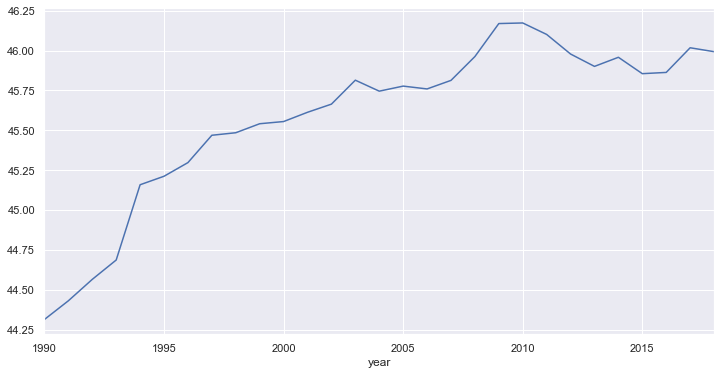

In [286]:
#look at trend over time, it appears as though female labor has been decreasing since the recession in 2008 in the USA

#gotta have a datetime index, so turn the year into the index
usa_female_labor.index = usa_female_labor['year']
usa_female_labor.index = pd.to_datetime(usa_female_labor.index)

usa_female_labor['percent_female_workforce'].plot(figsize = (12, 6));

## Now pulling data from Wage and Salaried Workers % Female
- This data accounts for the % of the female labor force that is paid a salary or tangible wages (since a female can be in the labor force and not be getting paid formally or at all)

In [287]:
#pull in data from https://data.worldbank.org/indicator/SL.EMP.WORK.FE.ZS?view=chart
per_female_salaried = pd.DataFrame(wb.get_series('SL.EMP.WORK.FE.ZS'))

In [288]:
#drop all NAs since data was not collected prior to 1991
per_female_salaried.dropna(inplace = True)

In [289]:
#reset the index to get countries in every row
per_female_salaried.reset_index(inplace = True)

In [290]:
#drop overarching regional information and retain individual country info
per_female_salaried = per_female_salaried.iloc[1288:, ]

In [291]:
#rename indicator column
per_female_salaried.columns = [str.replace('SL.EMP.WORK.FE.ZS', 'percent_female_paid') for str in per_female_salaried.columns]

In [292]:
#lower the columns 
per_female_salaried.columns = [str.lower() for str in per_female_salaried.columns]

In [293]:
#lower the entire dataframe
per_female_salaried = per_female_salaried.applymap(lambda s: s.lower() if type(s) == str else s)

In [294]:
#look at bottom 20
per_female_salaried.groupby('country').percent_female_paid.mean().sort_values().nsmallest(20)

#look at top 20
per_female_salaried.groupby('country').percent_female_paid.mean().sort_values().nlargest(20)

country
chad                        0.895500
central african republic    2.348393
guinea                      2.515464
burundi                     2.828393
afghanistan                 3.404821
mozambique                  3.898500
benin                       3.968607
sierra leone                4.723036
burkina faso                5.091250
mali                        5.231357
congo, dem. rep.            5.588321
tanzania                    7.252429
south sudan                 7.434107
nepal                       7.474607
niger                       7.810143
congo, rep.                 7.926500
ethiopia                    8.099893
lao pdr                     8.769643
liberia                     8.853286
cameroon                    9.508393
Name: percent_female_paid, dtype: float64

country
qatar                   99.750000
kuwait                  99.477500
united arab emirates    98.729822
bahrain                 97.940250
saudi arabia            97.902036
belarus                 97.708750
jordan                  96.710536
libya                   95.123250
cuba                    95.113858
norway                  95.032857
russian federation      94.765750
estonia                 94.652322
hong kong sar, china    94.347250
brunei darussalam       94.282214
denmark                 94.223857
macao sar, china        94.201250
united states           94.006035
sweden                  93.804608
malta                   93.787500
oman                    93.695606
Name: percent_female_paid, dtype: float64

In [295]:
#check out the shape, I am trying to figure out how best to join this data once I want to create one dataframe
per_female_salaried.shape

(5236, 4)

In [296]:
#trying to see how the World Bank deals with Hong Kong and Taiwan, it appears that they treat Hong Kong as seperate from China but not Taiwan, interesting, 
# this is something that I will have to take into account when combining several index data points, we may simply have to preface the results with a 
# warning that countries are treated differently with these index data and the reader should consider this in the analysis
per_female_salaried[per_female_salaried.country.str.contains('china')].head(40)

country                                             series  \
2240                 china  wage and salaried workers, female (% of female...   
2241                 china  wage and salaried workers, female (% of female...   
2242                 china  wage and salaried workers, female (% of female...   
2243                 china  wage and salaried workers, female (% of female...   
2244                 china  wage and salaried workers, female (% of female...   
2245                 china  wage and salaried workers, female (% of female...   
2246                 china  wage and salaried workers, female (% of female...   
2247                 china  wage and salaried workers, female (% of female...   
2248                 china  wage and salaried workers, female (% of female...   
2249                 china  wage and salaried workers, female (% of female...   
2250                 china  wage and salaried workers, female (% of female...   
2251                 china  wage and salaried workers, female (% of female...   
2252                 china  wage and salaried workers, female (% of female...   
2253                 china  wage and salaried workers, female (% of female...   
2254                 china  wage and salaried workers, female (% of female...   
2255                 china  wage and salaried workers, female (% of female...   
2256                 china  wage and salaried workers, female (% of female...   
2257                 china  wage and salaried workers, female (% of female...   
2258                 china  wage and salaried workers, female (% of female...   
2259                 china  wage and salaried workers, female (% of female...   
2260                 china  wage and salaried workers, female (% of female...   
2261                 china  wage and salaried workers, female (% of female...   
2262                 china  wage and salaried workers, female (% of female...   
2263                 china  wage and salaried workers, female (% of female...   
2264                 china  wage and salaried workers, female (% of female...   
2265                 china  wage and salaried workers, female (% of female...   
2266                 china  wage and salaried workers, female (% of female...   
2267                 china  wage and salaried workers, female (% of female...   
3332  hong kong sar, china  wage and salaried workers, female (% of female...   
3333  hong kong sar, china  wage and salaried workers, female (% of female...   
3334  hong kong sar, china  wage and salaried workers, female (% of female...   
3335  hong kong sar, china  wage and salaried workers, female (% of female...   
3336  hong kong sar, china  wage and salaried workers, female (% of female...   
3337  hong kong sar, china  wage and salaried workers, female (% of female...   
3338  hong kong sar, china  wage and salaried workers, female (% of female...   
3339  hong kong sar, china  wage and salaried workers, female (% of female...   
3340  hong kong sar, china  wage and salaried workers, female (% of female...   
3341  hong kong sar, china  wage and salaried workers, female (% of female...   
3342  hong kong sar, china  wage and salaried workers, female (% of female...   
3343  hong kong sar, china  wage and salaried workers, female (% of female...   

      year  percent_female_paid  
2240  1991            26.598000  
2241  1992            27.605000  
2242  1993            28.683001  
2243  1994            29.652000  
2244  1995            30.610001  
2245  1996            31.547001  
2246  1997            32.463001  
2247  1998            33.306000  
2248  1999            34.183998  
2249  2000            35.105999  
2250  2001            36.048000  
2251  2002            37.056000  
2252  2003            38.150002  
2253  2004            39.202999  
2254  2005            40.310001  
2255  2006            41.390999  
2256  2007            42.417999  
2257  2008            43.410000  
2258  2009            44.313000  
2259  2010       

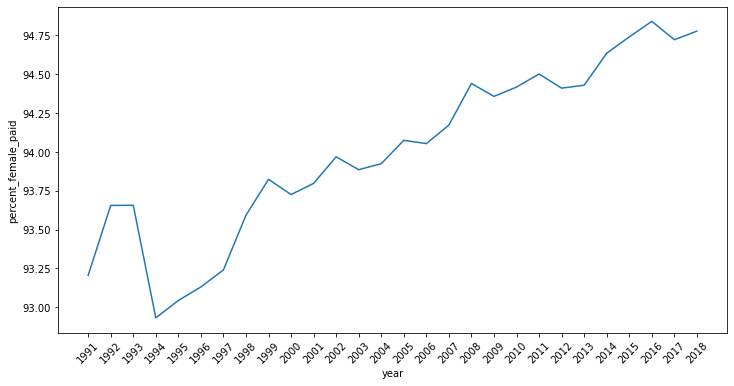

In [39]:
#lets plot the USA over time----------------nice to see that the trend has increased over time, but shouldnt it be 100%?!
usa_paid_females = per_female_salaried[per_female_salaried.country.str.contains('united states')]

plt.figure(figsize = (12, 6))
ax = sns.lineplot(data = usa_paid_females, x = 'year', y = 'percent_female_paid')
plt.xticks(rotation=45); #use ; to get rid of text before plots, 

## How Many Countries Require Women to Obey their Husbands By Law?
- Pulling this data from worldbank, it looks at whether a country requires women to obey their husbands (1=yes, 0=no)
- Data cleaning methods are exact replicas from the data sets being pulled above, so I will not comment the steps out

In [297]:
female_obeyance = pd.DataFrame(wb.get_series('SG.LAW.OBHB.MR'))

In [298]:
female_obeyance.reset_index(inplace = True)

In [299]:
female_obeyance.columns = [str.replace('SG.LAW.OBHB.MR', 'women_survitude') for str in female_obeyance.columns]

In [300]:
female_obeyance.columns = [str.lower() for str in female_obeyance.columns]

In [301]:
female_obeyance = female_obeyance.applymap(lambda s: s.lower() if type(s) == str else s)

In [302]:
female_obeyance.dropna(inplace = True)

In [303]:
# #filter dataframe for countries that make women obey their husbands
# female_obeyance = female_obeyance[female_obeyance['women_survitude'] == 1]

In [304]:
female_obeyance.head(20)

country                                             series  \
2769          afghanistan  married women are required by law to obey thei...   
2771          afghanistan  married women are required by law to obey thei...   
2822              albania  married women are required by law to obey thei...   
2824              albania  married women are required by law to obey thei...   
2826              albania  married women are required by law to obey thei...   
2828              albania  married women are required by law to obey thei...   
2830              albania  married women are required by law to obey thei...   
2881              algeria  married women are required by law to obey thei...   
2883              algeria  married women are required by law to obey thei...   
2885              algeria  married women are required by law to obey thei...   
2887              algeria  married women are required by law to obey thei...   
2889              algeria  married women are required by law to obey thei...   
3058               angola  married women are required by law to obey thei...   
3060               angola  married women are required by law to obey thei...   
3062               angola  married women are required by law to obey thei...   
3064               angola  married women are required by law to obey thei...   
3066               angola  married women are required by law to obey thei...   
3123  antigua and barbuda  married women are required by law to obey thei...   
3125  antigua and barbuda  married women are required by law to obey thei...   
3176            argentina  married women are required by law to obey thei...   

      year  women_survitude  
2769  2015              1.0  
2771  2017              1.0  
2822  2009              0.0  
2824  2011              0.0  
2826  2013              0.0  
2828  2015              0.0  
2830  2017              0.0  
2881  2009              0.0  
2883  2011              0.0  
2885  2013              0.0  
2887  2015              0.0  
2889  2017              0.0  
3058  2009              0.0  
3060  2011              0.0  
3062  2013              0.0  
3064  2015              0.0  
3066  2017              0.0  
3123  2015              0.0  
3125  2017              0.0  
3176  2009              0.0

In [305]:
female_obeyance.shape

(799, 4)

In [306]:
female_obeyance[female_obeyance.country.str.contains('china')]

country                                             series  \
5182                 china  married women are required by law to obey thei...   
5184                 china  married women are required by law to obey thei...   
5186                 china  married women are required by law to obey thei...   
5188                 china  married women are required by law to obey thei...   
5190                 china  married women are required by law to obey thei...   
7837  hong kong sar, china  married women are required by law to obey thei...   
7839  hong kong sar, china  married women are required by law to obey thei...   
7841  hong kong sar, china  married women are required by law to obey thei...   
7843  hong kong sar, china  married women are required by law to obey thei...   
7845  hong kong sar, china  married women are required by law to obey thei...   

      year  women_survitude  
5182  2009              0.0  
5184  2011              0.0  
5186  2013              0.0  
5188  2015              0.0  
5190  2017              0.0  
7837  2009              0.0  
7839  2011              0.0  
7841  2013              0.0  
7843  2015              0.0  
7845  2017              0.0

In [307]:
np.min(female_obeyance.year)

'2009'

In [308]:
#get list of all the countries where wives must obey their husbands, these countries will be penalized for this in the final index scores, which will drop the UAE 
# (from a cursory glance) significantly. I am also realizing that the UAE will not have nearly the same score in the EFFERT Index as it does in the EFI
female_obeyance[female_obeyance['women_survitude'] == 1].country.unique()

array(['afghanistan', 'bahrain', 'brunei darussalam', 'congo, dem. rep.',
       'djibouti', 'egypt, arab rep.', 'equatorial guinea', 'gabon',
       'iran, islamic rep.', 'iraq', 'jordan', 'malaysia', 'mali',
       'mauritania', 'qatar', 'saudi arabia', 'sudan',
       'united arab emirates', 'west bank and gaza', 'yemen, rep.'],
      dtype=object)

In [309]:
#send it into csv for tableau
#female_obeyance.to_csv('female_obeyance.csv')

## Are Women Allowed to Work in the Same Industries as Men?
- 1 = no restrictions, 0 = restrictions
- these data points will also serve, as the previous section did, as a penalizing factor in final scoring
- https://databank.worldbank.org/metadataglossary/gender-statistics/series/SG.IND.WORK.EQ

In [310]:
industry_restrictions = pd.DataFrame(wb.get_series('SG.IND.WORK.EQ'))

In [311]:
industry_restrictions.reset_index(inplace=True)
industry_restrictions.columns = [str.replace('SG.IND.WORK.EQ', 'industry_restrictions') for str in industry_restrictions.columns]
industry_restrictions.columns = [str.lower() for str in industry_restrictions.columns]
industry_restrictions = industry_restrictions.applymap(lambda s: s.lower() if type(s) == str else s)
industry_restrictions.dropna(inplace = True)

In [312]:
#look at countries in the past year who have restrictions on females working in the same industries as men
a = industry_restrictions[industry_restrictions['industry_restrictions'] == 0]
a[a['year'] == '2018'].head()

country                                             series  year  \
2772  afghanistan  women are able to work in the same industries ...  2018   
3067       angola  women are able to work in the same industries ...  2018   
3185    argentina  women are able to work in the same industries ...  2018   
3480   azerbaijan  women are able to work in the same industries ...  2018   
3598      bahrain  women are able to work in the same industries ...  2018   

      industry_restrictions  
2772                    0.0  
3067                    0.0  
3185                    0.0  
3480                    0.0  
3598                    0.0

In [313]:
b = industry_restrictions[industry_restrictions['year'] == '2018']

In [314]:
#look at all the countries that have these restrictions
b[b['industry_restrictions'] == 0].country.unique()

array(['afghanistan', 'angola', 'argentina', 'azerbaijan', 'bahrain',
       'bangladesh', 'belarus', 'belize', 'benin',
       'bosnia and herzegovina', 'burkina faso', 'cameroon',
       'central african republic', 'chad', 'china', 'congo, rep.',
       "cote d'ivoire", 'cyprus', 'dominica', 'egypt, arab rep.',
       'eswatini', 'ethiopia', 'fiji', 'gabon', 'ghana', 'guinea',
       'guinea-bissau', 'india', 'jamaica', 'japan', 'jordan',
       'kazakhstan', 'korea, rep.', 'kuwait', 'kyrgyz republic',
       'lebanon', 'lesotho', 'madagascar', 'malaysia', 'mali',
       'mauritania', 'moldova', 'montenegro', 'morocco', 'myanmar',
       'niger', 'nigeria', 'north macedonia', 'pakistan',
       'papua new guinea', 'russian federation', 'sao tome and principe',
       'saudi arabia', 'senegal', 'sierra leone', 'slovenia',
       'solomon islands', 'south sudan', 'sri lanka',
       'st. kitts and nevis', 'st. vincent and the grenadines', 'sudan',
       'syrian arab republic', 'tajiki

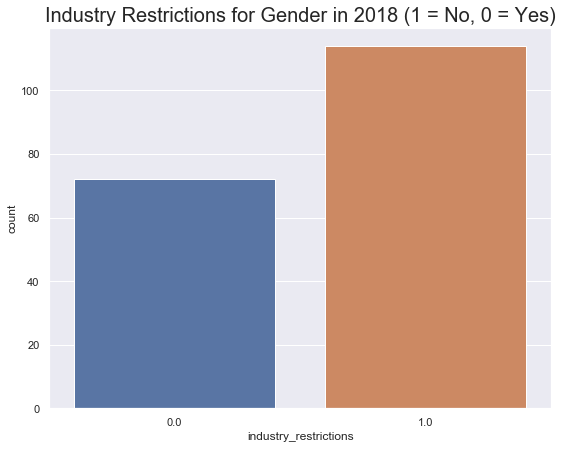

In [660]:
#plotting out the number of countries with gender restrictions overall, wow the result is pretty remarkable, why all these restrictions? 
plt.figure(figsize = (9, 7))
sns.countplot(b['industry_restrictions'])
plt.title('Industry Restrictions for Gender in 2018 (1 = No, 0 = Yes)', fontsize = 20);

# Creating a merged DF for Indicators
## REALLY IMPORTANT NOTE: I HAVE TO merge on both country and year to create the dataframe that I want
- I can just do a SQL-like left outer merge so I will have NAs where the data in years is not present

In [315]:
a = percent_females_working.merge(per_female_salaried, how = 'left', on = ['country', 'year'])

In [316]:
a.shape

(5413, 6)

In [317]:
a.head(10)

country                                      series_x  year  \
0  afghanistan  labor force, female (% of total labor force)  1990   
1  afghanistan  labor force, female (% of total labor force)  1991   
2  afghanistan  labor force, female (% of total labor force)  1992   
3  afghanistan  labor force, female (% of total labor force)  1993   
4  afghanistan  labor force, female (% of total labor force)  1994   
5  afghanistan  labor force, female (% of total labor force)  1995   
6  afghanistan  labor force, female (% of total labor force)  1996   
7  afghanistan  labor force, female (% of total labor force)  1997   
8  afghanistan  labor force, female (% of total labor force)  1998   
9  afghanistan  labor force, female (% of total labor force)  1999   

   percent_female_workforce  \
0                 33.423260   
1                 33.264621   
2                 33.076598   
3                 32.880361   
4                 32.736188   
5                 32.701182   
6                 32.586068   
7                 32.527769   
8                 32.517877   
9                 32.514542   

                                            series_y  percent_female_paid  
0                                                NaN                  NaN  
1  wage and salaried workers, female (% of female...                3.175  
2  wage and salaried workers, female (% of female...                3.102  
3  wage and salaried workers, female (% of female...                3.137  
4  wage and salaried workers, female (% of female...                3.271  
5  wage and salaried workers, female (% of female...                2.968  
6  wage and salaried workers, female (% of female...                3.070  
7  wage and salaried workers, female (% of female...                3.107  
8  wage and salaried workers, female (% of female...                3.159  
9  wage and salaried workers, female (% of female...                3.230

In [318]:
#important note here, the subsetted numbers need to match the length of the string you pass afterwards exactly, I know this can be done more efficiently with regex
cols = [c for c in a.columns if c[:6] != 'series']

In [319]:
cols

['country', 'year', 'percent_female_workforce', 'percent_female_paid']

In [320]:
a = a[cols]

This is really the first look at what I want the final dataset to look like

In [321]:
a

country  year  percent_female_workforce  percent_female_paid
0  afghanistan  1990                 33.423260                  NaN
1  afghanistan  1991                 33.264621                3.175
2  afghanistan  1992                 33.076598                3.102
3  afghanistan  1993                 32.880361                3.137
4  afghanistan  1994                 32.736188                3.271

## Now I want to look at "Vulnerable Employees"
- Vulnerable Employees Description from World Bank -  The indicator of status in employment distinguishes between two categories of the total employed. These are: (a) wage and salaried workers (also known as employees); and (b) self-employed workers. Self-employed group is broken down in the subcategories: self-employed workers with employees (employers), self-employed workers without employees (own-account workers), members of producers' cooperatives and contributing family workers (also known as unpaid family workers). Vulnerable employment refers to the sum of contributing family workers and own-account workers.

- I will be reverse scoring this indicator so that the points will be subtracted from a country's overall score, since this is a negative indicator, the same will be done for other indicators

In [518]:
vulnerable_employees = pd.DataFrame(wb.get_series('SL.EMP.VULN.FE.ZS'))

In [519]:
vulnerable_employees.head()

SL.EMP.VULN.FE.ZS
Country    Series                                             Year                   
Arab World Vulnerable employment, female (% of female empl... 1960                NaN
                                                              1961                NaN
                                                              1962                NaN
                                                              1963                NaN
                                                              1964                NaN

In [520]:
#reset the index to change it from the country names
vulnerable_employees.reset_index(inplace = True)

vulnerable_employees.columns = [c.replace('SL.EMP.VULN.FE.ZS', '%_vulnerable_employees') for c in vulnerable_employees.columns]

#lower the column names 
vulnerable_employees.columns = [c.lower() for c in vulnerable_employees.columns]

#lower the df
vulnerable_employees = vulnerable_employees.applymap(lambda s: s.lower() if type(s) == str else s)

In [521]:
vulnerable_employees.head()

country                                             series  year  \
0  arab world  vulnerable employment, female (% of female emp...  1960   
1  arab world  vulnerable employment, female (% of female emp...  1961   
2  arab world  vulnerable employment, female (% of female emp...  1962   
3  arab world  vulnerable employment, female (% of female emp...  1963   
4  arab world  vulnerable employment, female (% of female emp...  1964   

   %_vulnerable_employees  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

In [523]:
#creating the 2018 year dataframe to be included in the index and merged with the rest of the data
vulnerable_2018 = vulnerable_employees[vulnerable_employees['year'] == '2018'].sort_values(by = '%_vulnerable_employees', ascending = False).reset_index()

vulnerable_2018.drop(['index'], axis = 1, inplace = True)

vulnerable_2018.head(20)

country  \
0                       chad   
1   central african republic   
2                    burundi   
3                     guinea   
4                afghanistan   
5                       mali   
6                      benin   
7                south sudan   
8                 mozambique   
9               sierra leone   
10               congo, rep.   
11                     niger   
12          congo, dem. rep.   
13                     nepal   
14              burkina faso   
15                madagascar   
16                  ethiopia   
17                   liberia   
18                  tanzania   
19                   somalia   

                                               series  year  \
0   vulnerable employment, female (% of female emp...  2018   
1   vulnerable employment, female (% of female emp...  2018   
2   vulnerable employment, female (% of female emp...  2018   
3   vulnerable employment, female (% of female emp...  2018   
4   vulnerable employment, female (% of female emp...  2018   
5   vulnerable employment, female (% of female emp...  2018   
6   vulnerable employment, female (% of female emp...  2018   
7   vulnerable employment, female (% of female emp...  2018   
8   vulnerable employment, female (% of female emp...  2018   
9   vulnerable employment, female (% of female emp...  2018   
10  vulnerable employment, female (% of female emp...  2018   
11  vulnerable employment, female (% of female emp...  2018   
12  vulnerable employment, female (% of female emp...  2018   
13  vulnerable employment, female (% of female emp...  2018   
14  vulnerable employment, female (% of female emp...  2018   
15  vulnerable employment, female (% of female emp...  2018   
16  vulnerable employment, female (% of female emp...  2018   
17  vulnerable employment, female (% of female emp...  2018   
18  vulnerable employment, female (% of female emp...  2018   
19  vulnerable employment, female (% of female emp...  2018   

    %_vulnerable_employees  
0                98.840000  
1                97.189999  
2                97.051998  
3                96.061001  
4                95.573997  
5                95.075003  
6                94.324997  
7                93.152000  
8                92.770998  
9                91.779003  
10               91.304002  
11               91.227001  
12               90.327000  
13               90.199001  
14               90.056000  
15               89.651001  
16               89.414001  
17               88.284002  
18               88.194000  
19               88.105999

In [524]:
#curious about the UAE and the USA
vulnerable_2018[vulnerable_2018['country'].str.contains('unit')]

country                                             series  \
180        united kingdom  vulnerable employment, female (% of female emp...   
223         united states  vulnerable employment, female (% of female emp...   
229  united arab emirates  vulnerable employment, female (% of female emp...   

     year  %_vulnerable_employees  
180  2018                   9.521  
223  2018                   3.337  
229  2018                   0.988

__I would like to note here that I reverse scored the column and divided the score by 10 to create a reasonable score that could be subtracted from the country's overall score without impacting it detrimentally, while the countries with higher vulnerable employment will be penalized heavily, this will not zero out their entire score__

In [525]:
# make every score negative now, rename the column to reflect this 
vulnerable_2018.columns = [c.replace('%_vulnerable_employees', '%_vulnerable_employees_reverse_scored') for c in vulnerable_2018.columns]

vulnerable_2018['%_vulnerable_employees_reverse_scored'] = (vulnerable_2018['%_vulnerable_employees_reverse_scored'] * -1) / 10

vulnerable_2018.head()

country  \
0                      chad   
1  central african republic   
2                   burundi   
3                    guinea   
4               afghanistan   

                                              series  year  \
0  vulnerable employment, female (% of female emp...  2018   
1  vulnerable employment, female (% of female emp...  2018   
2  vulnerable employment, female (% of female emp...  2018   
3  vulnerable employment, female (% of female emp...  2018   
4  vulnerable employment, female (% of female emp...  2018   

   %_vulnerable_employees_reverse_scored  
0                                -9.8840  
1                                -9.7190  
2                                -9.7052  
3                                -9.6061  
4                                -9.5574

__Now comes the country name data cleaning!__
 - This should be similar to the EFI and GGEI process

In [526]:
#top countries based on EFI and GGEI
EFFERT1 = efi_and_climate[['country', 'final_score']]

#rename column to reflect the EFI and GGEI combination
EFFERT1.rename(columns = {'final_score':'EFI_and_GGEI_combined'}, inplace = True)

EFFERT_1.head()

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


country  final_score
0  switzerland       78.820
1       sweden       76.190
2    singapore       75.170
3      iceland       74.145
4       norway       72.305

In [527]:
EFFERT1.country.nunique()

127

In [528]:
#looking at the countries within the EFFERT1 (version 1) that are also shared with the vulnerable_2018 dataframe
EFFERT1[EFFERT1.country.isin(vulnerable_2018.country) == False].sort_values(by = 'country')

country  EFI_and_GGEI_combined
58    cape verde                 56.275
91         egypt                 50.660
76   ivory coast                 53.445
89          laos                 50.865
51     macedonia                 57.260
97        russia                 49.675
74   saint lucia                 53.895
18   south korea                 64.855
8         taiwan                 71.645
101    the congo                 49.060
119    the congo                 44.870
127    the congo                 42.460
129    the congo                 38.270

In [529]:
#looking for these countries in the vulnerable_2018 df
vulnerable_2018[vulnerable_2018.country.str.contains('taiw|kor|mac|st. l|ivoire|lao|egyp|russia|ver')].sort_values(by = 'country')

country  \
127                 cabo verde   
32               cote d'ivoire   
118           egypt, arab rep.   
52   korea, dem. people’s rep.   
148                korea, rep.   
27                     lao pdr   
226           macao sar, china   
157            north macedonia   
215         russian federation   
137                  st. lucia   

                                                series  year  \
127  vulnerable employment, female (% of female emp...  2018   
32   vulnerable employment, female (% of female emp...  2018   
118  vulnerable employment, female (% of female emp...  2018   
52   vulnerable employment, female (% of female emp...  2018   
148  vulnerable employment, female (% of female emp...  2018   
27   vulnerable employment, female (% of female emp...  2018   
226  vulnerable employment, female (% of female emp...  2018   
157  vulnerable employment, female (% of female emp...  2018   
215  vulnerable employment, female (% of female emp...  2018   
137  vulnerable employment, female (% of female emp...  2018   

     %_vulnerable_employees_reverse_scored  
127                                -3.0992  
32                                 -8.4622  
118                                -3.4495  
52                                 -7.5909  
148                                -2.1829  
27                                 -8.5887  
226                                -0.1977  
157                                -1.6798  
215                                -0.4590  
137                                -2.5677

In [530]:
#well, I really wanted to include Taiwan, but it seems as though this may be where I ahve to drop it from the analysis...
vulnerable_2018[vulnerable_2018.country.str.contains('taiwan')]

Empty DataFrame
Columns: [country, series, year, %_vulnerable_employees_reverse_scored]
Index: []

__I am going to begin cleaning the names of these countries in the vulnerable_2018 df so that they match the EFFERT1 df, I am not doing this to offend anyone, I simply need to rename them so that they match, I apologize if the naming is changed to something that does not reflect the current geopolitical stance of the nation itself, If anyone has an opinion on this or wants me to change anything my email is fultoncannon@gmail.com, please contact me__

In [531]:
#now I need to rectify these country names, I will do so according to the names that I have already establihsed to keep things consistent
country_mapper = {'cabo verde':'cape verde', "cote d'ivoire":'ivory coast', 'egypt, arab rep.':'egypt', "korea, dem. people's rep.":'north korea', 
                 'korea, rep.':'south korea', 'lao pdr':'laos', 'north macedonia':'macedonia', 'russian federation':'russia', 'st. lucia':'saint lucia'}

vulnerable_2018.country.replace(country_mapper, inplace = True)

EFFERT1[EFFERT1.country.isin(vulnerable_2018.country) == False].sort_values(by = 'country')

country  EFI_and_GGEI_combined
8       taiwan                 71.645
101  the congo                 49.060
119  the congo                 44.870
127  the congo                 42.460
129  the congo                 38.270

In [532]:
#now dealing with Taiwan and The Congo, it is weird that The Congo has so many entries, I am going to have to simply average them out and use that

#drop Taiwan from analysis
EFFERT1.drop(EFFERT1.index[[8]], inplace = True)

#average The Congo and drop it (~ operator acts as a "other than" sign here)
congo_data = EFFERT1[EFFERT1.country.str.contains('congo')]

congo_av = np.mean(congo_data['EFI_and_GGEI_combined'])

congo_data['EFI_and_GGEI_combined'] = congo_av

congo_data.head()

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


country  EFI_and_GGEI_combined
101  the congo                 43.665
119  the congo                 43.665
127  the congo                 43.665
129  the congo                 43.665

In [533]:
#set EFFERT to everything but The Congo and concatenate the new Congo data in 
EFFERT1 = EFFERT1[~EFFERT1.country.str.contains('congo')]

congo_data.drop(congo_data.index[[0, 1, 2]], inplace = True)

EFFERT1 = pd.concat([EFFERT1, congo_data])

In [534]:
#check to see that it worked, cool 
EFFERT1[EFFERT1.country.str.contains('congo')]

country  EFI_and_GGEI_combined
129  the congo                 43.665

In [535]:
#now check to see if the countries are the same between EFFERT and vulnerable_2018, knowing we will need to replace the congo again
EFFERT1[EFFERT1.country.isin(vulnerable_2018.country) == False].sort_values(by = 'country')

country  EFI_and_GGEI_combined
129  the congo                 43.665

In [536]:
EFFERT1[EFFERT1.country.str.contains('the congo')]

country  EFI_and_GGEI_combined
129  the congo                 43.665

In [537]:
vulnerable_2018[vulnerable_2018.country.str.contains('congo')]

country                                             series  year  \
10       congo, rep.  vulnerable employment, female (% of female emp...  2018   
12  congo, dem. rep.  vulnerable employment, female (% of female emp...  2018   

    %_vulnerable_employees_reverse_scored  
10                                -9.1304  
12                                -9.0327

In [538]:
#for some reason there are two values here again, we will average them and re-impute them into the dataframe in the same manner as I did with EFFERT above
congo = {'congo, rep.':'the congo', 'congo, dem. rep.':'the congo'}

vulnerable_2018.country.replace(congo, inplace = True)

congo_data = vulnerable_2018[vulnerable_2018.country.str.contains('congo')]

congo_av = np.mean(congo_data['%_vulnerable_employees_reverse_scored'])

congo_data['%_vulnerable_employees_reverse_scored'] = congo_av

congo_data.drop(congo_data.index[[0]], inplace = True)

vulnerable_2018 = vulnerable_2018[~vulnerable_2018.country.str.contains('congo')]

vulnerable_2018 = pd.concat([vulnerable_2018, congo_data])

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Sam Cannon\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [539]:
#check to see that it worked, cool
vulnerable_2018[vulnerable_2018.country.str.contains('congo')]

country                                             series  year  \
12  the congo  vulnerable employment, female (% of female emp...  2018   

    %_vulnerable_employees_reverse_scored  
12                               -9.08155

In [540]:
#NOW check to see if they match
EFFERT1[EFFERT1.country.isin(vulnerable_2018.country) == False].sort_values(by = 'country')

Empty DataFrame
Columns: [country, EFI_and_GGEI_combined]
Index: []

__AWESOME we have cleaned the country names for our vulnerable employees dataset to match EFFERT, now I can add this into the dataframe I have created with the previous indicators__
- I will have to rename the countries in my "Female Equality" dataframe to match the EFFERT Index now
- I am trying to keep as many countries as possible in this index, therefore I will continue to clean the names of the countries that are shared between data bases

In [541]:
EFFERT1[EFFERT1.country.isin(a.country) == False]

country  EFI_and_GGEI_combined
61    dominica                 55.585
70  seychelles                 54.415

In [542]:
countries = a[a.country.str.contains('korea|macedon|verde|seyche|dominic|lucia|ivoire|lao|egypt|russia|congo')]
countries[countries.year == '2018']

country  year  percent_female_workforce  \
782                  cape verde  2018                 47.087244   
1101                  the congo  2018                 48.336612   
1130                  the congo  2018                 48.748410   
1391         dominican republic  2018                 40.031590   
1449                      egypt  2018                 23.730747   
2573  korea, dem. people’s rep.  2018                 47.634574   
2602                south korea  2018                 41.999500   
2686                       laos  2018                 49.199137   
3614                  macedonia  2018                 39.029262   
4020                     russia  2018                 48.486226   
4513                saint lucia  2018                 45.518496   

      percent_female_paid  
782             65.983002  
1101             8.590000  
1130             8.156000  
1391            69.674004  
1449            63.417000  
2573            23.718000  
2602            77.471001  
2686            13.839000  
3614            80.582001  
4020            94.542999  
4513            70.811996

In [543]:
#ok now I will change these names as I have done before
country_mapper = {'cabo verde':'cape verde', "cote d'ivoire":'ivory coast', 'egypt, arab rep.':'egypt', "korea, dem. people's rep.":'north korea', 
                 'korea, rep.':'south korea', 'lao pdr':'laos', 'north macedonia':'macedonia', 'russian federation':'russia', 'st. lucia':'saint lucia', 
                 'congo, dem. rep.':'the congo', 'congo, rep.':'the congo'}

a.country.replace(country_mapper, inplace = True)

EFFERT1[EFFERT1.country.isin(a.country) == False]

country  EFI_and_GGEI_combined
61    dominica                 55.585
70  seychelles                 54.415

In [544]:
#drop these two countries from our analysis since they are unshared
EFFERT1.drop(EFFERT1.index[[60, 69]], inplace = True)

EFFERT1[EFFERT1.country.isin(a.country) == False]

Empty DataFrame
Columns: [country, EFI_and_GGEI_combined]
Index: []

In [545]:
EFFERT1.iloc[[60, 69]]

country  EFI_and_GGEI_combined
62  jordan                  55.30
72   india                  54.24

In [546]:
#looks like it worked!, now lets reset the index
EFFERT1.shape

EFFERT1.reset_index(inplace = True)

(124, 2)

In [547]:
EFFERT1.drop('index', axis = 1, inplace = True)

In [550]:
EFFERT1.head()

country  EFI_and_GGEI_combined
0  switzerland                 78.820
1       sweden                 76.190
2    singapore                 75.170
3      iceland                 74.145
4       norway                 72.305

In [555]:
EFFERT1[EFFERT1.country.isin(a.country)].sort_values(by = 'EFI_and_GGEI_combined', ascending = False)

country  EFI_and_GGEI_combined
0                 switzerland                 78.820
1                      sweden                 76.190
2                   singapore                 75.170
3                     iceland                 74.145
4                      norway                 72.305
5                     denmark                 72.300
6                     finland                 72.035
7                 new zealand                 71.740
8                     germany                 71.550
9                     ireland                 70.165
10             united kingdom                 70.150
11                     canada                 68.680
12                    austria                 68.295
13                netherlands                 67.785
14                      japan                 65.785
15                   colombia                 65.390
16              united states                 65.205
17                south korea                 64.855
18                      chile                 64.575
19                 luxembourg                 64.355
20                    georgia                 64.015
21                     france                 63.975
22                    uruguay                 63.520
23                 costa rica                 63.510
24                  lithuania                 63.445
25                  mauritius                 63.360
26       united arab emirates                 63.245
27                    estonia                 62.710
28                    belgium                 62.435
29                   malaysia                 62.200
30                       peru                 61.980
31                  australia                 61.745
32                     israel                 61.700
33                   thailand                 61.305
34             czech republic                 60.965
35                    hungary                 60.445
36                      malta                 60.065
37                     rwanda                 60.010
38                     latvia                 59.960
39                      qatar                 59.875
40                      spain                 59.605
41                      italy                 59.280
42                    albania                 59.080
43                   portugal                 58.725
44                     mexico                 58.715
45                    romania                 58.695
46                     panama                 58.015
47                philippines                 57.890
48                   slovenia                 57.690
49                    vanuatu                 57.665
50                  macedonia                 57.260
51                     turkey                 57.050
52                    armenia                 56.750
53                    morocco                 56.590
54                      china                 56.555
55                     cyprus                 56.455
56                      kenya                 56.395
57                 cape verde                 56.275
58                     greece                 56.075
59                     zambia                 55.850
60                     jordan                 55.300
61            slovak republic                 55.285
62                    croatia                 55.060
63                     poland                 54.755
64                  indonesia                 54.735
65                    nigeria                 54.530
66                   tanzania                 54.490
67                   cambodia                 54.460
68                   bulgaria                 54.285
69                      india                 54.240
70                 azerbaijan                 53.980
71                saint lucia                 53.895
72                     kuwait                 53.505
73                ivory coast                 53.445
74               burkina faso                 5

In [572]:
FE = a[a.country.isin(vulnerable_2018.country) == True]

FE = FE[FE['year'] == '2018']

FE.shape

(186, 4)

In [566]:
vulnerable_2018.country.nunique()

263

In [567]:
EFFERT1.country.nunique()

124

# Now I have to make my Female Equality dataframe the same length and same countries as the EFFERT Index, this will scale the country size down to about 124

In [571]:
vulnerable_2018_final = vulnerable_2018[vulnerable_2018.country.isin(EFFERT1.country)]

vulnerable_2018_final.shape

(124, 4)

## Now I am going to do the same with the already merged Female Equality dataframe with female workforce and female paid

In [573]:
FE = FE[FE.country.isin(EFFERT1.country)]

FE.shape

(125, 4)

In [575]:
#merge the vulnerable employee data in with the % female workforce and % female paid
FE = FE.merge(vulnerable_2018_final)

__REMINDER: I am going to average the percent_female_workforce and percent_female_paid columns and subtract the vulnerable employee info from them__

In [579]:
#drop the series column
FE.drop('series', axis = 1, inplace = True)

#sweet, we have a cool dataframe in the works here!
FE

country  year  percent_female_workforce  \
0                     albania  2018                 41.659845   
1                   argentina  2018                 42.046921   
2                     armenia  2018                 45.991442   
3                   australia  2018                 46.372302   
4                     austria  2018                 46.626155   
5                  azerbaijan  2018                 48.709875   
6                     bahrain  2018                 20.382789   
7                  bangladesh  2018                 30.385054   
8                     belgium  2018                 45.842453   
9                       benin  2018                 49.255669   
10     bosnia and herzegovina  2018                 39.126065   
11                     brazil  2018                 43.384777   
12                   bulgaria  2018                 46.437892   
13               burkina faso  2018                 44.657802   
14                    burundi  2018                 51.911884   
15                 cape verde  2018                 47.087244   
16                   cambodia  2018                 48.352884   
17                   cameroon  2018                 46.989195   
18                     canada  2018                 47.279570   
19   central african republic  2018                 45.787388   
20                       chad  2018                 45.743999   
21                      chile  2018                 41.790141   
22                      china  2018                 43.817462   
23                   colombia  2018                 43.144490   
24                    comoros  2018                 42.335885   
25                  the congo  2018                 48.336612   
26                  the congo  2018                 48.748410   
27                 costa rica  2018                 38.258129   
28                ivory coast  2018                 41.571352   
29                    croatia  2018                 46.367666   
30                     cyprus  2018                 46.295177   
31             czech republic  2018                 44.575573   
32                    denmark  2018                 47.403284   
33                   djibouti  2018                 41.175101   
34         dominican republic  2018                 40.031590   
35                    ecuador  2018                 41.284131   
36                      egypt  2018                 23.730747   
37          equatorial guinea  2018                 36.903879   
38                    estonia  2018                 48.269055   
39                   ethiopia  2018                 46.589490   
40                    finland  2018                 48.000092   
41                     france  2018                 47.706814   
42                      gabon  2018                 40.654686   
43                    georgia  2018                 45.706116   
44                    germany  2018                 46.493824   
45                      ghana  2018                 46.727507   
46                     greece  2018                 44.002027   
47                     guinea  2018                 53.056403   
48              guinea-bissau  2018                 48.217226   
49                      haiti  2018                 47.890353   
50                    hungary  2018                 45.626187   
51                    iceland  2018                 47.249918   
52                      india  2018                 21.922550   
53                  indonesia  2018                 38.886068   
54                    ireland  2018                 45.580608   
55                     israel  2018                 47.076511   
56                      italy  2018                 42.380728   
57                      japan  2018                 43.594421   
58                     jordan  2018                 17.778284   
59                      kenya  2018                 48.714973   
60                south korea  2018                 41.99

In [603]:
#remember the EFI standings, now compare them with the cell below
EFI_scores = EFI_2018.sort_values(by = 'economic_freedom_score', ascending = False).country.reset_index().drop('index', axis = 1)

In [601]:
#displays tables side-by-side https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [610]:
#comparing everything so far, this is pretty cool to look at together
display_side_by_side(EFI_scores, ggei, EFFERT1)

country 
 
 
 
 
 0 
 hong kong 
 
 
 1 
 singapore 
 
 
 2 
 new zealand 
 
 
 3 
 switzerland 
 
 
 4 
 australia 
 
 
 5 
 ireland 
 
 
 6 
 estonia 
 
 
 7 
 united kingdom 
 
 
 8 
 canada 
 
 
 9 
 united arab emirates 
 
 
 10 
 iceland 
 
 
 11 
 denmark 
 
 
 12 
 taiwan 
 
 
 13 
 luxembourg 
 
 
 14 
 sweden 
 
 
 15 
 georgia 
 
 
 16 
 netherlands 
 
 
 17 
 united states 
 
 
 18 
 lithuania 
 
 
 19 
 chile 
 
 
 20 
 mauritius 
 
 
 21 
 malaysia 
 
 
 22 
 norway 
 
 
 23 
 germany 
 
 
 24 
 czech republic 
 
 
 25 
 finland 
 
 
 26 
 south korea 
 
 
 27 
 latvia 
 
 
 28 
 qatar 
 
 
 29 
 japan 
 
 
 30 
 israel 
 
 
 31 
 austria 
 
 
 32 
 macedonia 
 
 
 33 
 macau 
 
 
 34 
 botswana 
 
 
 35 
 vanuatu 
 
 
 36 
 romania 
 
 
 37 
 uruguay 
 
 
 38 
 kazakhstan 
 
 
 39 
 jamaica 
 
 
 40 
 rwanda 
 
 
 41 
 colombia 
 
 
 42 
 peru 
 
 
 43 
 armenia 
 
 
 44 
 malta 
 
 
 45 
 poland 
 
 
 46 
 bulgaria 
 
 
 47 
 cyprus 
 
 
 48 
 bahrain 
 
 
 49 
 saint vincent and the grenadines 
 
 
 50 
 saint lucia 
 
 
 51 
 belgium 
 
 
 52 
 thailand 
 
 
 53 
 panama 
 
 
 54 
 hungary 
 
 
 55 
 kosovo 
 
 
 56 
 costa rica 
 
 
 57 
 turkey 
 
 
 58 
 slovak republic 
 
 
 59 
 spain 
 
 
 60 
 philippines 
 
 
 61 
 jordan 
 
 
 62 
 slovenia 
 
 
 63 
 mexico 
 
 
 64 
 dominica 
 
 
 65 
 albania 
 
 
 66 
 montenegro 
 
 
 67 
 azerbaijan 
 
 
 68 
 brunei darussalam 
 
 
 69 
 indonesia 
 
 
 70 
 france 
 
 
 71 
 guatemala 
 
 
 72 
 portugal 
 
 
 73 
 bahamas 
 
 
 74 
 el salvador 
 
 
 75 
 tonga 
 
 
 76 
 south africa 
 
 
 77 
 kyrgyz republic 
 
 
 78 
 italy 
 
 
 79 
 serbia 
 
 
 80 
 kuwait 
 
 
 81 
 paraguay 
 
 
 82 
 uganda 
 
 
 83 
 fiji 
 
 
 84 
 ivory coast 
 
 
 85 
 morocco 
 
 
 86 
 bhutan 
 
 
 87 
 seychelles 
 
 
 88 
 dominican republic 
 
 
 89 
 samoa 
 
 
 90 
 bosnia and herzegovina 
 
 
 91 
 croatia 
 
 
 92 
 oman 
 
 
 93 
 honduras 
 
 
 94 
 burkina faso 
 
 
 95 
 cape verde 
 
 
 96 
 tanzania 
 
 
 97 
 saudi arabia 
 
 
 98 
 tunisia 
 
 
 99 
 nicaragua 
 
 
 100 
 guyana 
 
 
 101 
 cambodia 
 
 
 102 
 namibia 
 
 
 103 
 nigeria 
 
 
 104 
 moldova 
 
 
 105 
 tajikistan 
 
 
 106 
 russia 
 
 
 107 
 belarus 
 
 
 108 
 gabon 
 
 
 109 
 sri lanka 
 
 
 110 
 china 
 
 
 111 
 trinidad and tobago 
 
 
 112 
 mali 
 
 
 113 
 solomon islands 
 
 
 114 
 greece 
 
 
 115 
 belize 
 
 
 116 
 barbados 
 
 
 117 
 guinea-bissau 
 
 
 118 
 madagascar 
 
 
 119 
 benin 
 
 
 120 
 comoros 
 
 
 121 
 ghana 
 
 
 122 
 swaziland 
 
 
 123 
 haiti 
 
 
 124 
 papua new guinea 
 
 
 125 
 mongolia 
 
 
 126 
 senegal 
 
 
 127 
 bangladesh 
 
 
 128 
 kenya 
 
 
 129 
 india 
 
 
 130 
 pakistan 
 
 
 131 
 zambia 
 
 
 132 
 nepal 
 
 
 133 
 mauritania 
 
 
 134 
 lesotho 
 
 
 135 
 myanmar 
 
 
 136 
 laos 
 
 
 137 
 sao tome and principe 
 
 
 138 
 egypt 
 
 
 139 
 lebanon 
 
 
 140 
 vietnam 
 
 
 141 
 ethiopia 
 
 
 142 
 argentina 
 
 
 143 
 micronesia 
 
 
 144 
 gambia 
 
 
 145 
 guinea 
 
 
 146 
 the congo 
 
 
 147 
 malawi 
 
 
 148 
 ukraine 
 
 
 149 
 cameroon 
 
 
 150 
 sierra leone 
 
 
 151 
 uzbekistan 
 
 
 152 
 brazil 
 
 
 153 
 afghanistan 
 
 
 154 
 maldives 
 
 
 155 
 burundi 
 
 
 156 
 liberia 
 
 
 157 
 iran 
 
 
 158 
 kiribati 
 
 
 159 
 niger 
 
 
 160 
 sudan 
 
 
 161 
 chad 
 
 
 162 
 central african republic 
 
 
 163 
 angola 
 
 
 164 
 ecuador 
 
 
 165 
 suriname 
 
 
 166 
 timor-leste 
 
 
 167 
 togo 
 
 
 168 
 turkmenistan 
 
 
 169 
 mozambique 
 
 
 170 
 djibouti 
 
 
 171 
 algeria 
 
 
 172 
 bolivia 
 
 
 173 
 zimbabwe 
 
 
 174 
 equatorial guinea 
 
 
 175 
 eritrea 
 
 
 176 
 the congo 
 
 
 177 
 cuba 
 
 
 178 
 venezuela 
 
 
 179 
 korea, north 
 
 
 180 
 iraq 
 
 
 181 
 libya 
 
 
 182 
 liechtenstein 
 
 
 183 
 yemen 
 
 
 184 
 syria 
 
 
 185 
 somalia 
 
 
 
 
 
 
 country 
 score 
 
 
 
 
 0 
 sweden 
 76.08 
 
 
 1 
 switzerland 
 75.94 
 
 
 2 
 iceland 
 71.29 
 
 
 3 
 no

In [627]:
b = b[['country', 'industry_restrictions']]

In [631]:
FE[FE.country.isin(b.country) == False]

country  year  percent_female_workforce  percent_female_paid  \
15    cape verde  2018                 47.087244            65.983002   
25     the congo  2018                 48.336612             8.590000   
26     the congo  2018                 48.748410             8.156000   
28   ivory coast  2018                 41.571352            14.227000   
36         egypt  2018                 23.730747            63.417000   
60   south korea  2018                 41.999500            77.471001   
62          laos  2018                 49.199137            13.839000   
86     macedonia  2018                 39.029262            80.582001   
97        russia  2018                 48.486226            94.542999   
108  saint lucia  2018                 45.518496            70.811996   

     %_vulnerable_employees_reverse_scored  
15                                -3.09920  
25                                -9.08155  
26                                -9.08155  
28                                -8.46220  
36                                -3.44950  
60                                -2.18290  
62                                -8.58870  
86                                -1.67980  
97                                -0.45900  
108                               -2.56770

In [632]:
country_mapper = {'cabo verde':'cape verde', "cote d'ivoire":'ivory coast', 'egypt, arab rep.':'egypt', "korea, dem. people's rep.":'north korea', 
                 'korea, rep.':'south korea', 'lao pdr':'laos', 'north macedonia':'macedonia', 'russian federation':'russia', 'st. lucia':'saint lucia', 
                 'congo, dem. rep.':'the congo', 'congo, rep.':'the congo'}

b.country.replace(country_mapper, inplace = True)

FE[FE.country.isin(b.country) == False]

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Empty DataFrame
Columns: [country, year, percent_female_workforce, percent_female_paid, %_vulnerable_employees_reverse_scored]
Index: []

In [633]:
FE = FE.merge(b)

In [659]:
#checking for duplicates, I had a feeling that The Congo was being duplicated in here, this only shows the occurrences after the first one though!! be careful
FE[FE.country.duplicated()]

FE[FE.country.str.contains('congo')]

country  year  percent_female_workforce  percent_female_paid  \
26  the congo  2018                 48.336612                8.590   
27  the congo  2018                 48.748410                8.156   
28  the congo  2018                 48.748410                8.156   

    %_vulnerable_employees_reverse_scored  industry_restrictions  
26                               -9.08155                    0.0  
27                               -9.08155                    1.0  
28                               -9.08155                    0.0

country  year  percent_female_workforce  percent_female_paid  \
25  the congo  2018                 48.336612                8.590   
26  the congo  2018                 48.336612                8.590   
27  the congo  2018                 48.748410                8.156   
28  the congo  2018                 48.748410                8.156   

    %_vulnerable_employees_reverse_scored  industry_restrictions  
25                               -9.08155                    1.0  
26                               -9.08155                    0.0  
27                               -9.08155                    1.0  
28                               -9.08155                    0.0

In [672]:
#I am going to drop the duplicated Congo entries, they are very close to each other so they will not affect the scores very much, since it is duplicated and has 
# both 0 and 1 scores for the restrictions, I looked up the laws in The Congo and found that they have an anti-discrimination law in place for gender in employement,
# So I will give them a score of 1 for the indicator 
#https://www.export.gov/article?id=Congo-Democratic-Republic-Labor-Policies-Practices
FE['country'] = FE.country

In [674]:
#drop NA values introduced
FE.dropna(inplace = True)

In [677]:
#reset the index
FE.reset_index(inplace = True)

In [679]:
FE.drop('index', axis = 1, inplace = True)

Text(0.5, 1.0, 'Industry Restrictions Count')

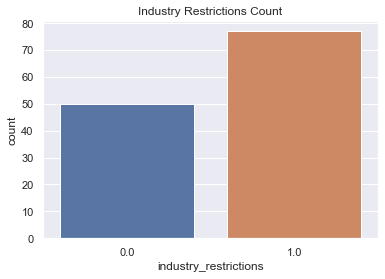

In [645]:
import seaborn as sns
sns.countplot(FE.industry_restrictions)
plt.title('Industry Restrictions Count')

In [681]:
#recode the industry restrictions scores to make this more intuitive and understandable
mapper = {1.0:'no gender restrictions', 0.0:'gender restrictions'}

FE.industry_restrictions.replace(mapper, inplace = True)

FE

country  year  percent_female_workforce  \
0                     albania  2018                 41.659845   
1                   argentina  2018                 42.046921   
2                     armenia  2018                 45.991442   
3                   australia  2018                 46.372302   
4                     austria  2018                 46.626155   
5                  azerbaijan  2018                 48.709875   
6                     bahrain  2018                 20.382789   
7                  bangladesh  2018                 30.385054   
8                     belgium  2018                 45.842453   
9                       benin  2018                 49.255669   
10     bosnia and herzegovina  2018                 39.126065   
11                     brazil  2018                 43.384777   
12                   bulgaria  2018                 46.437892   
13               burkina faso  2018                 44.657802   
14                    burundi  2018                 51.911884   
15                 cape verde  2018                 47.087244   
16                   cambodia  2018                 48.352884   
17                   cameroon  2018                 46.989195   
18                     canada  2018                 47.279570   
19   central african republic  2018                 45.787388   
20                       chad  2018                 45.743999   
21                      chile  2018                 41.790141   
22                      china  2018                 43.817462   
23                   colombia  2018                 43.144490   
24                    comoros  2018                 42.335885   
25                  the congo  2018                 48.336612   
26                 costa rica  2018                 38.258129   
27                ivory coast  2018                 41.571352   
28                    croatia  2018                 46.367666   
29                     cyprus  2018                 46.295177   
30             czech republic  2018                 44.575573   
31                    denmark  2018                 47.403284   
32                   djibouti  2018                 41.175101   
33         dominican republic  2018                 40.031590   
34                    ecuador  2018                 41.284131   
35                      egypt  2018                 23.730747   
36          equatorial guinea  2018                 36.903879   
37                    estonia  2018                 48.269055   
38                   ethiopia  2018                 46.589490   
39                    finland  2018                 48.000092   
40                     france  2018                 47.706814   
41                      gabon  2018                 40.654686   
42                    georgia  2018                 45.706116   
43                    germany  2018                 46.493824   
44                      ghana  2018                 46.727507   
45                     greece  2018                 44.002027   
46                     guinea  2018                 53.056403   
47              guinea-bissau  2018                 48.217226   
48                      haiti  2018                 47.890353   
49                    hungary  2018                 45.626187   
50                    iceland  2018                 47.249918   
51                      india  2018                 21.922550   
52                  indonesia  2018                 38.886068   
53                    ireland  2018                 45.580608   
54                     israel  2018                 47.076511   
55                      italy  2018                 42.380728   
56                      japan  2018                 43.594421   
57                     jordan  2018                 17.778284   
58                      kenya  2018                 48.714973   
59                south korea  2018                 41.999500   
60                     kuwait  2018                 29.25

# I am getting close to having a finalized version of the Female Equality portion of the EFFERT Index now, I just want to look at the difference between the percent of male workforce and percent of males paid in contrast to their female counterparts. This will be one of the final indicators of the Female Equality Index

In [698]:
paid_males = pd.DataFrame(wb.get_series('SL.EMP.WORK.MA.ZS'))

In [699]:
paid_males.reset_index(inplace = True)

In [700]:
paid_males.columns = [c.lower() for c in paid_males.columns]

paid_males.rename(columns = {'sl.emp.work.ma.zs':'%_paid_males'}, inplace = True)

paid_males = paid_males[paid_males.year == '2018']

In [702]:
paid_males = paid_males.applymap(lambda s: s.lower() if type(s) == str else s)

In [703]:
paid_males.head()

country  \
58                       arab world   
117          caribbean small states   
176  central europe and the baltics   
235      early-demographic dividend   
294             east asia & pacific   

                                                series  year  %_paid_males  
58   wage and salaried workers, male (% of male emp...  2018     70.665257  
117  wage and salaried workers, male (% of male emp...  2018     62.822021  
176  wage and salaried workers, male (% of male emp...  2018     78.814596  
235  wage and salaried workers, male (% of male emp...  2018     39.786331  
294  wage and salaried workers, male (% of male emp...  2018     56.913074

In [704]:
#now which countries am I going to have to clean up to get this data to match the FE data? The same ones
FE[FE.country.isin(paid_males.country) == False]

country  year  percent_female_workforce  percent_female_paid  \
15    cape verde  2018                 47.087244            65.983002   
25     the congo  2018                 48.336612             8.590000   
27   ivory coast  2018                 41.571352            14.227000   
35         egypt  2018                 23.730747            63.417000   
59   south korea  2018                 41.999500            77.471001   
61          laos  2018                 49.199137            13.839000   
85     macedonia  2018                 39.029262            80.582001   
96        russia  2018                 48.486226            94.542999   
107  saint lucia  2018                 45.518496            70.811996   

     %_vulnerable_employees_reverse_scored   industry_restrictions  
15                                -3.09920  no gender restrictions  
25                                -9.08155  no gender restrictions  
27                                -8.46220     gender restrictions  
35                                -3.44950     gender restrictions  
59                                -2.18290     gender restrictions  
61                                -8.58870  no gender restrictions  
85                                -1.67980     gender restrictions  
96                                -0.45900     gender restrictions  
107                               -2.56770  no gender restrictions

In [705]:
country_mapper = {'cabo verde':'cape verde', "cote d'ivoire":'ivory coast', 'egypt, arab rep.':'egypt', "korea, dem. people's rep.":'north korea', 
                 'korea, rep.':'south korea', 'lao pdr':'laos', 'north macedonia':'macedonia', 'russian federation':'russia', 'st. lucia':'saint lucia', 
                 'congo, dem. rep.':'the congo', 'congo, rep.':'the congo'}

paid_males.country.replace(country_mapper, inplace = True)

FE[FE.country.isin(paid_males.country) == False]

#cool we are good there, lets merge them

Empty DataFrame
Columns: [country, year, percent_female_workforce, percent_female_paid, %_vulnerable_employees_reverse_scored, industry_restrictions]
Index: []

In [708]:
paid_males.drop(['series', 'year'], axis = 1, inplace = True)

FE = FE.merge(paid_males)

In [722]:
FE.rename(columns = {'%_vulnerable_employees_reverse_scored':'%_vulnerable_female_employees_reverse'}, inplace = True)

In [724]:
FE.head()

country  year  percent_female_workforce  percent_female_paid  \
0    albania  2018                 41.659845            44.320999   
1  argentina  2018                 42.046921            78.581001   
2    armenia  2018                 45.991442            59.757999   
3  australia  2018                 46.372302            87.561996   
4    austria  2018                 46.626155            90.223000   

   %_vulnerable_female_employees_reverse   industry_restrictions  %_paid_males  
0                                -5.4663  no gender restrictions     41.542999  
1                                -1.8957     gender restrictions     71.898003  
2                                -3.9836  no gender restrictions     57.867001  
3                                -0.8331  no gender restrictions     79.286003  
4                                -0.7139  no gender restrictions     85.483002

## I am going to use a "one-sided scale" with this indicator
 - This approach was adapted from The Global Gender Gap Report, specifically the Global Gender Gap Index
 - "The second choice was a one-sided scale that measures how close women are to reaching parity with men but does not reward or penalize countries for having a gender gap in the other direction. We find the one-sided scale more appropriate for our purposes, as it does not reward countries for having exceeded the parity benchmark" (p.6)
 - points will be subtracted from the countries with a negative score in this field, but positive or equal scores will not affect a country's score at all
 - http://www3.weforum.org/docs/WEF_GGGR_2018.pdf

In [726]:
FE['%_individuals_pay_difference'] = FE['percent_female_paid'] - FE['%_paid_males']

In [727]:
FE.head()

country  year  percent_female_workforce  percent_female_paid  \
0    albania  2018                 41.659845            44.320999   
1  argentina  2018                 42.046921            78.581001   
2    armenia  2018                 45.991442            59.757999   
3  australia  2018                 46.372302            87.561996   
4    austria  2018                 46.626155            90.223000   

   %_vulnerable_female_employees_reverse   industry_restrictions  \
0                                -5.4663  no gender restrictions   
1                                -1.8957     gender restrictions   
2                                -3.9836  no gender restrictions   
3                                -0.8331  no gender restrictions   
4                                -0.7139  no gender restrictions   

   %_paid_males  %_individuals_pay_difference  
0     41.542999                      2.778000  
1     71.898003                      6.682999  
2     57.867001                      1.890999  
3     79.286003                      8.275993  
4     85.483002                      4.739998

In [831]:
FE.sort_values(by = '%_individuals_pay_difference', ascending = False).head()

country  year  %_female_pop  percent_female_workforce  \
70               lebanon  2018     49.705806                 24.988588   
40    dominican republic  2018     50.007796                 40.031590   
60               ireland  2018     50.425509                 45.580608   
120  trinidad and tobago  2018     50.591327                 42.347262   
64                jordan  2018     49.389684                 17.778284   

     percent_female_paid  %_vulnerable_female_employees_reverse  \
70             83.073997                                -1.5168   
40             69.674004                                -2.8351   
60             92.327003                                -0.5460   
120            84.255997                                -1.2873   
64             96.737999                                -0.1698   

      industry_restrictions  %_paid_males  %_individuals_pay_difference  \
70      gender restrictions     56.817001                     26.256996   
40   no gender restrictions     47.707001                     21.967003   
60   no gender restrictions     78.369003                     13.958000   
120  no gender restrictions     70.867996                     13.388000   
64      gender restrictions     83.417000                     13.320999   

     female_labor_participation_ratio  
70                          33.110060  
40                          65.559063  
60                          80.911899  
120                         70.653443  
64                          22.072276

In [729]:
total_female_population_percent = pd.DataFrame(wb.get_series('SP.POP.TOTL.FE.ZS'))

In [731]:
total_female_population_percent.reset_index(inplace = True)

In [733]:
percent_female_pop = total_female_population_percent[total_female_population_percent['Year'] == '2018']

In [735]:
#I've done this several times before, so I will not explain the whole process again
percent_female_pop.columns = [c.replace('SP.POP.TOTL.FE.ZS', '%_female_pop') for c in percent_female_pop.columns]

percent_female_pop.columns = [c.lower() for c in percent_female_pop.columns]

percent_female_pop = percent_female_pop.applymap(lambda s: s.lower() if type(s) == str else s)

percent_female_pop.country.replace(country_mapper, inplace = True)

FE[FE.country.isin(percent_female_pop.country) == False]
#perfect, all of our countries are in there

Empty DataFrame
Columns: [country, year, percent_female_workforce, percent_female_paid, %_vulnerable_female_employees_reverse, industry_restrictions, %_paid_males, %_individuals_pay_difference]
Index: []

In [738]:
FE = FE.merge(percent_female_pop)
FE.head()

country  year  percent_female_workforce  percent_female_paid  \
0    albania  2018                 41.659845            44.320999   
1  argentina  2018                 42.046921            78.581001   
2    armenia  2018                 45.991442            59.757999   
3  australia  2018                 46.372302            87.561996   
4    austria  2018                 46.626155            90.223000   

   %_vulnerable_female_employees_reverse   industry_restrictions  \
0                                -5.4663  no gender restrictions   
1                                -1.8957     gender restrictions   
2                                -3.9836  no gender restrictions   
3                                -0.8331  no gender restrictions   
4                                -0.7139  no gender restrictions   

   %_paid_males  %_individuals_pay_difference  \
0     41.542999                      2.778000   
1     71.898003                      6.682999   
2     57.867001                      1.890999   
3     79.286003                      8.275993   
4     85.483002                      4.739998   

                                       series  %_female_pop  
0  population, female (% of total population)     49.063095  
1  population, female (% of total population)     51.237348  
2  population, female (% of total population)     52.956577  
3  population, female (% of total population)     50.199623  
4  population, female (% of total population)     50.829427

In [752]:
#this function brings columns to wherever you wnat, 
# can be useful https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
def change_column_order(df, col_name, index):
    cols = df.columns.tolist()
    cols.remove(col_name)
    cols.insert(index, col_name)
    return df[cols]

In [755]:
FE = change_column_order(FE, '%_female_pop', 2)

In [758]:
FE = change_column_order(FE, 'country', 0)

In [759]:
FE = change_column_order(FE, 'year', 1)

In [761]:
#FE.drop('series', axis = 1, inplace = True)

FE.head(10)

country  year  %_female_pop  percent_female_workforce  \
0     albania  2018     49.063095                 41.659845   
1   argentina  2018     51.237348                 42.046921   
2     armenia  2018     52.956577                 45.991442   
3   australia  2018     50.199623                 46.372302   
4     austria  2018     50.829427                 46.626155   
5  azerbaijan  2018     50.115749                 48.709875   
6     bahrain  2018     36.348252                 20.382789   
7  bangladesh  2018     49.387297                 30.385054   
8     belgium  2018     50.593319                 45.842453   
9       benin  2018     50.098202                 49.255669   

   percent_female_paid  %_vulnerable_female_employees_reverse  \
0            44.320999                                -5.4663   
1            78.581001                                -1.8957   
2            59.757999                                -3.9836   
3            87.561996                                -0.8331   
4            90.223000                                -0.7139   
5            27.173000                                -6.1987   
6            96.849998                                -0.0957   
7            31.886999                                -6.7466   
8            89.352997                                -0.8161   
9             4.982000                                -9.4325   

    industry_restrictions  %_paid_males  %_individuals_pay_difference  
0  no gender restrictions     41.542999                      2.778000  
1     gender restrictions     71.898003                      6.682999  
2  no gender restrictions     57.867001                      1.890999  
3  no gender restrictions     79.286003                      8.275993  
4  no gender restrictions     85.483002                      4.739998  
5     gender restrictions     36.046001                     -8.873001  
6     gender restrictions     97.357002                     -0.507004  
7     gender restrictions     43.568001                    -11.681002  
8  no gender restrictions     82.656998                      6.695999  
9     gender restrictions     16.309000                    -11.327000

In [749]:
#looks like the overall average is basically half, so the population shouldn't be a huge consideration in the top countries of the analysis, please let me know 
# if you think otherwise. Bahrain was the country that popped out to me that made me look more closely at this, but it seems to be somewhat of an outlier
np.mean(FE['%_female_pop'])

49.63195200867028

## Now that I am looking into how to best combine these data points, I think using the labor force participation rate for females compared to males would be a great addition to the scale that could take the place of the % females in the labor force 
- Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
- https://data.worldbank.org/indicator/SL.TLF.CACT.FM.ZS
    - Description of the data from World Bank:
    - Labor force participation rate is the proportion of the population ages 15 and older that is economically active: all people who supply labor for the production of goods and services during a specified period. Ratio of female to male labor force participation rate is calculated by dividing female labor force participation rate by male labor force participation rate and multiplying by 100.
    - Development Relevance: Estimates of women in the labor force and employment are generally lower than those of men and are not comparable internationally, reflecting that demographic, social, legal, and cultural trends and norms determine whether women's activities are regarded as economic. In many low-income countries women often work on farms or in other family enterprises without pay, and others work in or near their homes, mixing work and family activities during the day. In many high-income economies, women have been increasingly acquiring higher education that has led to better-compensated, longer-term careers rather than lower-skilled, shorter-term jobs. However, access to good- paying occupations for women remains unequal in many occupations and countries around the world. Labor force statistics by gender is important to monitor gender disparities in employment and unemployment patterns.

In [773]:
female_labor_participation_rate = pd.DataFrame(wb.get_series('SL.TLF.CACT.FM.ZS'))

In [774]:
female_labor_participation_rate.reset_index(inplace = True)

In [776]:
female_labor_participation_rate.rename(columns = {'SL.TLF.CACT.FM.ZS':'female_labor_participation_ratio'}, inplace = True)

In [778]:
female_labor_participation_rate.columns = [c.lower() for c in female_labor_participation_rate.columns]

In [782]:
female_labor_participation_rate = female_labor_participation_rate.applymap(lambda s: s.lower() if type(s) == str else s)

In [784]:
female_labor_participation_rate = female_labor_participation_rate[female_labor_participation_rate.year == '2018']

In [786]:
female_labor_participation_rate.country.replace(country_mapper, inplace = True)

FE[FE.country.isin(female_labor_participation_rate.country) == False]
#great, cleaning over, that country mapper is magic

Empty DataFrame
Columns: [country, year, %_female_pop, percent_female_workforce, percent_female_paid, %_vulnerable_female_employees_reverse, industry_restrictions, %_paid_males, %_individuals_pay_difference]
Index: []

In [788]:
female_labor_participation_rate.drop(['series', 'year'], axis = 1, inplace = True)

In [789]:
FE = FE.merge(female_labor_participation_rate)

In [791]:
FE.head()

country  year  %_female_pop  percent_female_workforce  \
0    albania  2018     49.063095                 41.659845   
1  argentina  2018     51.237348                 42.046921   
2    armenia  2018     52.956577                 45.991442   
3  australia  2018     50.199623                 46.372302   
4    austria  2018     50.829427                 46.626155   

   percent_female_paid  %_vulnerable_female_employees_reverse  \
0            44.320999                                -5.4663   
1            78.581001                                -1.8957   
2            59.757999                                -3.9836   
3            87.561996                                -0.8331   
4            90.223000                                -0.7139   

    industry_restrictions  %_paid_males  %_individuals_pay_difference  \
0  no gender restrictions     41.542999                      2.778000   
1     gender restrictions     71.898003                      6.682999   
2  no gender restrictions     57.867001                      1.890999   
3  no gender restrictions     79.286003                      8.275993   
4  no gender restrictions     85.483002                      4.739998   

   female_labor_participation_ratio  
0                         72.733577  
1                         67.242042  
2                         70.956250  
3                         84.565655  
4                         83.173034

__So, since the percent of female workers is not necessarily reflective of the economic strength or participation of females in certain countries, I will not use it and instead will use the ratio of female to male workers__

# Moving on to Female Ownership of Businesses
- I am going to use two sources of data to fill in this indicator. First, I am going to use the MasterCard Index of Women Entrepeneurs to fill in the first 57 countries (since they only studied 57 countries in their report) 
- The remaining countries left in the Female Equality Index will be imputed with data from the World Bank which reflects % of firms with female participation in ownership. While these two are different, I believe they capture very similar information with MasterCard capturing what I was looking for in this indicator
- https://databank.worldbank.org/indicator/IC.FRM.FEMO.ZS?id=2ddc971b&report_name=Gender_Indicators_Report&populartype=series
- https://ceoworld.biz/2019/01/21/countries-with-the-most-women-business-owners-as-a-percentage-of-total-business-owners-2018/

In [1213]:
female_owners = pd.DataFrame(wb.get_series('IC.FRM.FEMO.ZS'))

In [1214]:
#put it through the cleaning wringer
female_owners.reset_index(inplace = True)
female_owners.rename(columns = {'IC.FRM.FEMO.ZS':'%_female_business_ownership'}, inplace = True)
female_owners.columns = [c.lower() for c in female_owners.columns]
female_owners = female_owners.applymap(lambda s: s.lower() if type(s) == str else s)
female_owners = female_owners[female_owners.year > '2010']

In [1215]:
female_owners.dropna(inplace = True)

In [1216]:
female_owners.reset_index(inplace = True)

In [1217]:
female_owners.drop(['index'], axis = 1, inplace = True)

In [1218]:
#take the index that starts at afghanistan, since that is where the individual country indicators start
female_owners = female_owners.iloc[45:]

In [1219]:
#create dataframe from MasterCard female entrepeneurship index
c = ['Ghana','Russia', 'Uganda','New Zealand',	'Australia','Vietnam', 	'Poland', 	'Spain', 'Romania',	'Portugal',	'Peru',	'Hungary','Argentina',
     'Singapore','Brazil','Canada','Uruguay', 'Bangladesh',	'Italy','Colombia', 'Switzerland','Belgium','United States', 'Germany',	'Thailand',
     'Chile', 'United Kingdom',	'France','Botswana','Korea'	,'Philippines',	'Czech Republic','China', 'Denmark','Hong Kong SAR','Ecuador','Sweden',
    'Costa Rica','Taiwan','Ireland','Mexico','South Africa','Nigeria','Israel',	'Japan','Malaysia',	'Indonesia','India','Tunisia','Ethiopia','Turkey',	
     'Malawi','Algeria','Iran',	'Egypt','United Arab Emirates',	'Saudi Arabia']
d = [46.4, 34.6, 33.8, 33, 32.1, 31.3, 30.3, 29.4, 28.9, 28.7, 28.3, 28.1, 27.7, 27.5, 27.2, 27, 26, 25.9, 25.7, 25.7, 25.5, 25.5, 25.5, 25.3, 25.2, 25.1, 
    25, 24.6, 24.5, 24.1, 23.9, 23.6, 23.1, 23, 22, 21.9, 21.8, 21.6, 20.6, 20.1, 19.3, 18.8, 17.8, 17.5, 16.8, 16.7, 15.8, 11, 9.9, 9.5, 8.5, 8, 7.9, 6.1, 
    3.3, 2.8, 1.4]

e = pd.DataFrame(c, d)

In [1220]:
e.reset_index(inplace = True)
e = e.rename(columns = {'index':'female_business_owners_%_of_total', 0:'country'})

In [1221]:
#e.drop('level_0', axis = 1, inplace = True)
e = change_column_order(e, 'country', 0)

In [1222]:
e = e.applymap(lambda s: s.lower() if type(s) == str else s)

In [1223]:
FE_final.head()

country  year  %_female_pop  percent_female_workforce  \
0        ghana  2018     49.325830                 46.727507   
1       russia  2018     53.661762                 48.486226   
2       uganda   NaN           NaN                       NaN   
3  new zealand  2018     50.837769                 47.407568   
4    australia  2018     50.199623                 46.372302   

   percent_female_paid  %_vulnerable_female_employees_reverse  \
0            17.399000                                -7.8134   
1            94.542999                                -0.4590   
2                  NaN                                    NaN   
3            85.019997                                -1.0840   
4            87.561996                                -0.8331   

    industry_restrictions  %_paid_males  %_individuals_pay_difference  \
0     gender restrictions     32.962002                    -15.563002   
1     gender restrictions     92.342003                      2.200996   
2                     NaN           NaN                           NaN   
3  no gender restrictions     78.337997                      6.681999   
4  no gender restrictions     79.286003                      8.275993   

   female_labor_participation_ratio  female_business_owners_%_of_total  
0                         89.021495                               46.4  
1                         77.881623                               34.6  
2                               NaN                               33.8  
3                         85.344551                               33.0  
4                         84.565655                               32.1

In [1224]:
FE_final.shape

(139, 11)

In [1225]:
FE_final[FE_final.country.duplicated()]

country  year  %_female_pop  percent_female_workforce  \
74  the congo  2018     50.097743                 48.336612   
75  the congo  2018     50.097743                 48.336612   
76  the congo  2018     50.097743                 48.336612   
77  the congo  2018     50.065604                 48.336612   
78  the congo  2018     50.065604                 48.336612   
79  the congo  2018     50.065604                 48.336612   
80  the congo  2018     50.065604                 48.336612   

    percent_female_paid  %_vulnerable_female_employees_reverse  \
74                 8.59                               -9.08155   
75                 8.59                               -9.08155   
76                 8.59                               -9.08155   
77                 8.59                               -9.08155   
78                 8.59                               -9.08155   
79                 8.59                               -9.08155   
80                 8.59                               -9.08155   

     industry_restrictions  %_paid_males  %_individuals_pay_difference  \
74  no gender restrictions     27.559000                    -18.969000   
75  no gender restrictions     34.780998                    -26.190998   
76  no gender restrictions     34.780998                    -26.190998   
77  no gender restrictions     27.559000                    -18.969000   
78  no gender restrictions     27.559000                    -18.969000   
79  no gender restrictions     34.780998                    -26.190998   
80  no gender restrictions     34.780998                    -26.190998   

    female_labor_participation_ratio  female_business_owners_%_of_total  
74                         93.531486                                NaN  
75                         91.530374                                NaN  
76                         93.531486                                NaN  
77                         91.530374                                NaN  
78                         93.531486                                NaN  
79                         91.530374                                NaN  
80                         93.531486                                NaN

In [1226]:
FE_final = pd.merge(e, FE, on = 'country', how = 'outer')
FE_final = change_column_order(FE_final, 'female_business_owners_%_of_total', 10)
FE_final.head()

country  year  %_female_pop  percent_female_workforce  \
0        ghana  2018     49.325830                 46.727507   
1       russia  2018     53.661762                 48.486226   
2       uganda   NaN           NaN                       NaN   
3  new zealand  2018     50.837769                 47.407568   
4    australia  2018     50.199623                 46.372302   

   percent_female_paid  %_vulnerable_female_employees_reverse  \
0            17.399000                                -7.8134   
1            94.542999                                -0.4590   
2                  NaN                                    NaN   
3            85.019997                                -1.0840   
4            87.561996                                -0.8331   

    industry_restrictions  %_paid_males  %_individuals_pay_difference  \
0     gender restrictions     32.962002                    -15.563002   
1     gender restrictions     92.342003                      2.200996   
2                     NaN           NaN                           NaN   
3  no gender restrictions     78.337997                      6.681999   
4  no gender restrictions     79.286003                      8.275993   

   female_labor_participation_ratio  female_business_owners_%_of_total  
0                         89.021495                               46.4  
1                         77.881623                               34.6  
2                               NaN                               33.8  
3                         85.344551                               33.0  
4                         84.565655                               32.1

You can tell from the above output that merging these two dataframes together produces a lot of NA values becuase we don't have all of the countries in the FE dataframe included in the MasterCard female entrepeneur index. To fix this, I am going to add in the data from the female ownership dataframe to replace the NA values in the female business ownership dataframe. While these data are not exactly the same, they reflect similar indicators. Another note here is that the data available for the % of firms that had female ownership was not all available for the year 2018, but was available from a year between 2013-2018. Therefore, to construct this indicator, I used the most recent year that the information was available for the country in terms of its % female ownership in businesses.  

In [1227]:
female_owners.head()

country                                             series  year  \
45  afghanistan  firms with female participation in ownership (...  2014   
46      albania  firms with female participation in ownership (...  2013   
47    argentina  firms with female participation in ownership (...  2017   
48      armenia  firms with female participation in ownership (...  2013   
49   azerbaijan  firms with female participation in ownership (...  2013   

    %_female_business_ownership  
45                          2.2  
46                         12.5  
47                         57.8  
48                         25.3  
49                          4.5

In [1228]:
#I want to retain the data points that represent the most recent data, not the first entry, that would be misleading, so I am using keep = 'last'
female_owners_duplicates = female_owners[female_owners.country.duplicated(keep = 'last')]

In [1229]:
female_owners.drop(female_owners_duplicates.index, inplace = True)

In [1230]:
#great , it worked
female_owners.reset_index()

index                   country  \
0       45               afghanistan   
1       46                   albania   
2       47                 argentina   
3       48                   armenia   
4       49                azerbaijan   
5       50                bangladesh   
6       51                   belarus   
7       52                     benin   
8       53                    bhutan   
9       54                   bolivia   
10      55    bosnia and herzegovina   
11      56                  bulgaria   
12      57                   burundi   
13      58                  cambodia   
14      59                  cameroon   
15      60  central african republic   
16      61                      chad   
17      62                     china   
18      63                  colombia   
19      64          congo, dem. rep.   
20      65             cote d'ivoire   
21      66                   croatia   
22      67            czech republic   
23      68                  djibouti   
24      69        dominican republic   
25      70                   ecuador   
26      72          egypt, arab rep.   
27      73               el salvador   
28      74                   estonia   
29      75                  eswatini   
30      77                  ethiopia   
31      78               gambia, the   
32      79                   georgia   
33      80                     ghana   
34      81                    greece   
35      82                 guatemala   
36      83                    guinea   
37      84                  honduras   
38      85                   hungary   
39      86                     india   
40      87                 indonesia   
41      88                      iraq   
42      89                    israel   
43      90                    jordan   
44      91                kazakhstan   
45      93                     kenya   
46      94                    kosovo   
47      95           kyrgyz republic   
48      98                   lao pdr   
49      99                    latvia   
50     100                   lebanon   
51     101                   lesotho   
52     102                   liberia   
53     103                 lithuania   
54     104                madagascar   
55     105                    malawi   
56     106                  malaysia   
57     107                      mali   
58     108                mauritania   
59     109                   moldova   
60     110                  mongolia   
61     111                montenegro   
62     112                   morocco   
63     113                mozambique   
64     115                   myanmar   
65     116                   namibia   
66     117                     nepal   
67     118                 nicaragua   
68     119                     niger   
69     120                   nigeria   
70     121           north macedonia   
71     122                  pakistan   
72     123          papua new guinea   
73     124                  paraguay   
74     125                      peru   
75     126               philippines   
76     127                    poland   
77     128                   romania   
78     129        russian federation   
79     130                    rwanda   
80     131                   senegal   
81     132                    serbia   
82     133              sierra leone   
83     134           slovak republic   
84     135                  slovenia   
85     136           solomon islands   
86     137               south sudan   
87     138                 sri lanka   
88     139                     sudan   
89     140                  suriname   
90     141                    sweden   
91     142                tajikistan   
92     143                  tanzania   
93     144                  thailand   
94     145               timor-leste   
95     146                      togo   
96     147                   tunisia   
97     148                    turkey   
98     149                    uganda   
99   

In [1231]:
#new delete method I learned, interesting
#del FE_final['female_owners']

In [1232]:
z = pd.merge(FE_final, female_owners, on = 'country', how = 'outer')
z = z[['female_business_owners_%_of_total', '%_female_business_ownership', 'country']]
z

female_business_owners_%_of_total  %_female_business_ownership  \
0                                 46.4                         31.6   
1                                 34.6                          NaN   
2                                 33.8                         26.6   
3                                 33.0                          NaN   
4                                 32.1                          NaN   
5                                 31.3                         51.1   
6                                 30.3                         40.4   
7                                 29.4                          NaN   
8                                 28.9                         47.0   
9                                 28.7                          NaN   
10                                28.3                         56.6   
11                                28.1                         47.1   
12                                27.7                         57.8   
13                                27.5                          NaN   
14                                27.2                          NaN   
15                                27.0                          NaN   
16                                26.0                         37.0   
17                                25.9                         12.7   
18                                25.7                          NaN   
19                                25.7                         66.9   
20                                25.5                          NaN   
21                                25.5                          NaN   
22                                25.5                          NaN   
23                                25.3                          NaN   
24                                25.2                         64.4   
25                                25.1                          NaN   
26                                25.0                          NaN   
27                                24.6                          NaN   
28                                24.5                          NaN   
29                                24.1                          NaN   
30                                23.9                         69.2   
31                                23.6                         30.8   
32                                23.1                         64.2   
33                                23.0                          NaN   
34                                22.0                          NaN   
35                                21.9                         70.4   
36                                21.8                         52.5   
37                                21.6                          NaN   
38                                20.6                          NaN   
39                                20.1                          NaN   
40                                19.3                          NaN   
41                                18.8                          NaN   
42                                17.8                         16.2   
43                                17.5                         27.3   
44                                16.8                          NaN   
45                                16.7                         25.4   
46                                15.8                         22.1   
47                                11.0                         10.7   
48                                 9.9                         49.5   
49                                 9.5                         36.2   
50                                 8.5                         25.4   
51                                 8.0                         28.1   
52                                 7.9                          NaN   
53                                 6.1                          NaN   
54                                 3.3                          NaN   
55                           

In [1233]:
#Now I need to fill the NA values from the MasterCard index column witht he World Bank data
z['female_business_owners_%_of_total'].fillna(z['%_female_business_ownership'], inplace = True)

In [1234]:
#looks like it worked!
z.sort_values('country')

female_business_owners_%_of_total  %_female_business_ownership  \
139                                2.2                          2.2   
57                                12.5                         12.5   
52                                 7.9                          NaN   
12                                27.7                         57.8   
58                                25.3                         25.3   
4                                 32.1                          NaN   
59                                 NaN                          NaN   
60                                 4.5                          4.5   
61                                 NaN                          NaN   
17                                25.9                         12.7   
140                               43.6                         43.6   
21                                25.5                          NaN   
62                                36.7                         36.7   
141                               43.3                         43.3   
142                               68.6                         68.6   
63                                27.2                         27.2   
28                                24.5                          NaN   
14                                27.2                          NaN   
64                                39.0                         39.0   
65                                 NaN                          NaN   
66                                44.0                         44.0   
68                                46.2                         46.2   
69                                39.7                         39.7   
15                                27.0                          NaN   
67                                 NaN                          NaN   
70                                53.3                         53.3   
71                                13.1                         13.1   
25                                25.1                          NaN   
32                                23.1                         64.2   
19                                25.7                         66.9   
72                                 NaN                          NaN   
143                               15.1                         15.1   
37                                21.6                          NaN   
144                               24.4                         24.4   
82                                32.1                         32.1   
83                                 NaN                          NaN   
31                                23.6                         30.8   
33                                23.0                          NaN   
84                                22.3                         22.3   
85                                32.2                         32.2   
35                                21.9                         70.4   
54                                 3.3                          NaN   
145                               17.8                         17.8   
146                               38.4                         38.4   
86                                 NaN                          NaN   
87                                35.8                         35.8   
147                               36.0                         36.0   
49                                 9.5                         36.2   
88                                 NaN                          NaN   
27                                24.6                          NaN   
89                                 NaN                          NaN   
148                               16.8                         16.8   
90                                33.9                         33.9   
23                                25.3                          NaN   
0                                 46.4                         31.6   
91                           

In [1235]:
FE_final.shape
z.shape

(139, 11)

(176, 3)

In [1236]:
#final_copy = pd.merge(FE_final, z, on = 'country', how = 'inner')
final_copy = FE.merge(z)

In [1237]:
final_copy.shape

(187, 12)

In [1205]:
# #save the country duplicates into a dataframe
# final_copy_duplicates = final_copy[final_copy.country.duplicated()]

In [1240]:
#drop any completely duplicated entries, keeping only the first entry
final_copy = final_copy.drop_duplicates(keep = 'first').reset_index().drop(['index', '%_female_business_ownership'], axis = 1)
percent_missing(final_copy)

Percent Missing Values: 

female_business_owners_%_of_total: 29.01%


In [1241]:
final_copy.shape

(131, 11)

In [1244]:
final_copy_duplicates = final_copy[final_copy.country.duplicated()]

In [1245]:
final_copy_duplicates.index

Int64Index([26, 27, 28, 29, 30, 31, 32], dtype='int64')

In [1246]:
#drop duplicated data points based on their indeices
final_copy = final_copy.drop(final_copy_duplicates.index)
final_copy.shape

(124, 11)

# I had a HUGE bug fix prior to this line I am typing, I am bookmarking it so that if I need to do any version control I can know where things were weird

In [1250]:
final_copy.reset_index().drop('index', axis = 1, inplace = True)

In [1251]:
#drop unnecessary columns that will not be included as indicators
final_copy.drop(['%_female_pop', 'percent_female_workforce', '%_paid_males'], axis = 1, inplace = True)
final_copy.head()

country  year  percent_female_paid  \
0    albania  2018            44.320999   
1  argentina  2018            78.581001   
2    armenia  2018            59.757999   
3  australia  2018            87.561996   
4    austria  2018            90.223000   

   %_vulnerable_female_employees_reverse   industry_restrictions  \
0                                -5.4663  no gender restrictions   
1                                -1.8957     gender restrictions   
2                                -3.9836  no gender restrictions   
3                                -0.8331  no gender restrictions   
4                                -0.7139  no gender restrictions   

   %_individuals_pay_difference  female_labor_participation_ratio  \
0                      2.778000                         72.733577   
1                      6.682999                         67.242042   
2                      1.890999                         70.956250   
3                      8.275993                         84.565655   
4                      4.739998                         83.173034   

   female_business_owners_%_of_total  
0                               12.5  
1                               27.7  
2                               25.3  
3                               32.1  
4                                NaN

In [984]:
#in order to fill in remaining NA values, I am going to find out the region mean values and impute them

In [1252]:
#loop through countries and find region names, append to df
regions = []
for x in final_copy['country']:
    a = cc.convert(names = x, to = 'UNregion')
    regions.append(a)
final_copy['region'] = regions

In [1253]:
#change order of column to go beside country
final_copy = change_column_order(final_copy, 'region', 1)

In [1254]:
#lowercase the region
final_copy = final_copy.applymap(lambda s: s.lower() if type(s) == str else s)

In [1255]:
final_copy.groupby(final_copy['region']).mean()

percent_female_paid  \
region                                           
australia and new zealand            86.290997   
caribbean                            59.065999   
central america                      71.993665   
eastern africa                       21.712727   
eastern asia                         62.289600   
eastern europe                       85.557445   
melanesia                            23.745001   
middle africa                        22.576143   
northern africa                      60.445334   
northern america                     91.466000   
northern europe                      92.331801   
south america                        61.837572   
south-eastern asia                   51.382374   
southern africa                      87.144997   
southern asia                        30.327199   
southern europe                      79.893083   
western africa                       17.336692   
western asia                         82.035000   
western europe                       89.853144   

                           %_vulnerable_female_employees_reverse  \
region                                                             
australia and new zealand                              -0.958550   
caribbean                                              -3.860750   
central america                                        -2.593133   
eastern africa                                         -7.624445   
eastern asia                                           -3.665000   
eastern europe                                         -1.293456   
melanesia                                              -7.518500   
middle africa                                          -7.637307   
northern africa                                        -3.754667   
northern america                                       -0.629650   
northern europe                                        -0.582380   
south america                                          -3.565743   
south-eastern asia                                     -4.714250   
southern africa                                        -1.019000   
southern asia                                          -6.902760   
southern europe                                        -1.699967   
western africa                                         -8.144800   
western asia                                           -1.617193   
western europe                                         -0.763429   

                           %_individuals_pay_difference  \
region                                                    
australia and new zealand                      7.478996   
caribbean                                     10.478000   
central america                                3.458998   
eastern africa                               -12.672909   
eastern asia                                   2.291800   
eastern europe                                 5.752001   
melanesia                                     -7.143999   
middle africa                                -13.637572   
northern africa                               -3.259665   
northern america                               4.125000   
northern europe                                7.273201   
south america                                  0.456143   
south-eastern asia                            -5.135125   
southern africa                                4.163994   
southern asia                                -13.691201   
southern europe                                7.082499   
western africa                               -11.282308   
western asia                                   3.298999   
western europe                                 4.922430   

                           female_labor_participation_ratio  \
region                                                        
australia and new zealand                         84.955103   
caribbean                                         75.781626   
central america                                   60.63

In [1271]:
#fill NA values for countries in the 'female_business_owners' column based on region mean
final_copy['female_business_owners_%_of_total'] = final_copy.groupby('region')['female_business_owners_%_of_total'].transform(lambda x: x.replace(np.nan, np.mean(x)))

In [1274]:
percent_missing(final_copy)

Percent Missing Values: 

female_business_owners_%_of_total: 0.81%


In [1258]:
#this is the list of countries that I will have to impute for missingness by region, FYI
final_copy[final_copy.isnull().any(axis = 1)]

country              region  year  percent_female_paid  \
4                  austria      western europe  2018            90.223000   
6                  bahrain        western asia  2018            96.849998   
13            burkina faso      western africa  2018             9.622000   
15              cape verde      western africa  2018            65.983002   
24                 comoros      eastern africa  2018            17.077000   
25               the congo       middle africa  2018             8.590000   
34             ivory coast      western africa  2018            14.227000   
36                  cyprus        western asia  2018            89.942001   
43       equatorial guinea       middle africa  2018            29.191999   
46                 finland     northern europe  2018            90.980003   
48                   gabon       middle africa  2018            59.275002   
54           guinea-bissau      western africa  2018            12.652000   
55                   haiti           caribbean  2018            11.522000   
57                 iceland     northern europe  2018            92.365997   
66             south korea        eastern asia  2018            77.471001   
67                  kuwait        western asia  2018            99.382004   
68                    laos  south-eastern asia  2018            13.839000   
72              luxembourg      western europe  2018            91.302002   
75                maldives       southern asia  2018            65.977997   
77                   malta     southern europe  2018            92.216003   
79               mauritius      eastern africa  2018            85.194000   
88             netherlands      western europe  2018            86.882004   
92               macedonia     southern europe  2018            80.582001   
93                  norway     northern europe  2018            95.711998   
94                    oman        western asia  2018            95.575996   
96                  panama     central america  2018            68.291000   
101                  qatar        western asia  2018            99.589996   
105  sao tome and principe       middle africa  2018            43.514999   
114            saint lucia           caribbean  2018            70.811996   
120    trinidad and tobago           caribbean  2018            84.255997   
128                vanuatu           melanesia  2018            23.745001   

     %_vulnerable_female_employees_reverse   industry_restrictions  \
4                                 -0.71390  no gender restrictions   
6                                 -0.09570     gender restrictions   
13                                -9.00560     gender restrictions   
15                                -3.09920  no gender restrictions   
24                                -7.81490  no gender restrictions   
25                                -9.08155  no gender restrictions   
34                                -8.46220     gender restrictions   
36                                -0.92690     gender restrictions   
43                                -6.97730  no gender restrictions   
46                                -0.70700  no gender restrictions   
48                                -3.94000     gender restrictions   
54                                -8.67400     gender restrictions   
55                                -8.75290  no gender restrictions   
57                                -0.57440  no gender restrictions   
66                                -2.18290     gender restrictions   
67                                -0.00330     gender restrictions   
68                                -8.58870  no gender restrictions   
72                                -0.65630  no gender restrictions   
75                                -3.24540  no gender restrictions   
77                                -0.59100  no gender restrictions   
79                                -1.31350  no gender restrictions   
88            

In [1276]:
FINAL_COPY_FE = final_copy.reset_index().drop(['index'], axis = 1)

In [1282]:
#Drop Vanuatu from the analysis, it is the only remaining NA value...
FINAL_COPY_FE[FINAL_COPY_FE.isnull().any(axis = 1)]

country     region  year  percent_female_paid  \
121  vanuatu  melanesia  2018            23.745001   

     %_vulnerable_female_employees_reverse   industry_restrictions  \
121                                -7.5185  no gender restrictions   

     %_individuals_pay_difference  female_labor_participation_ratio  \
121                     -7.143999                         77.248065   

     female_business_owners_%_of_total  
121                                NaN

In [1285]:
FINAL_COPY_FE = FINAL_COPY_FE.drop(FINAL_COPY_FE.index[[121]]).reset_index().drop('index', axis = 1)

# HOLY SMOKES, I THINK I AM DONE WITH PUTTING THIS ALL TOGETHER

In [1287]:
#save this s**t to a csv so that it can go nowhere!
FINAL_COPY_FE.to_csv('EFFERT_Index_FE_scale.csv')

In [1686]:
df = pd.read_csv('EFFERT_Index_FE_scale.csv')

In [1687]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [1688]:
df_stage1 = df[['country', 'percent_female_paid', 'female_labor_participation_ratio', 'female_business_owners_%_of_total']]

In [1617]:
scaled_df = df[['percent_female_paid', 'female_labor_participation_ratio', 'female_business_owners_%_of_total']]

## Confirmatory Factor Analysis with the Female Equality Scale
-  https://stats.idre.ucla.edu/spss/output/factor-analysis/ - all analysts are looking for simple structure.  Simple structure is pattern of results such that each variable loads highly onto one and only one factor. Factor analysis is a technique that requires a large sample size. Factor analysis is based on the correlation matrix of the variables involved, and correlations usually need a large sample size before they stabilize. Tabachnick and Fidell (2001, page 588) cite Comrey and Lee’s (1992) advise regarding sample size: 50 cases is very poor, 100 is poor, 200 is fair, 300 is good, 500 is very good, and 1000 or more is excellent.  As a rule of thumb, a bare minimum of 10 observations per variable is necessary to avoid computational difficulties.
- I don't have great sample size, but it isn't the wost either, so its still useful to know

In [1624]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(scaled_df)
scaled_df = pd.DataFrame(scaled_df)
scaled_df = scaled_df.rename(columns = {0:'percent_female_paid', 1:'female_labor_participation_ratio', 2:'female_business_owners_%_of_total'})

In [1625]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)    

model_dict = {"F1": ["percent_female_paid", "female_labor_participation_ratio", "female_business_owners_%_of_total"]}

model_spec = ModelSpecificationParser.parse_model_specification_from_dict(scaled_df, model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False) 

cfa.fit(scaled_df.values) 

cfa.loadings_

ConfirmatoryFactorAnalyzer(bounds=None, disp=False, impute='median',
                           is_cov_matrix=False, max_iter=200, n_obs=123,
                           specification=<factor_analyzer.confirmatory_factor_analyzer.ModelSpecification object at 0x00000222F0DF1CC0>,
                           tol=None)

array([[-0.24119219],
       [ 0.90460798],
       [ 0.45346629]])

## Scoring the FE Scale

In [1689]:
df['stage_1_score'] = df_stage1.sum(axis = 1)/3
df.head()

country                     region  year  percent_female_paid  \
0    albania            southern europe  2018            44.320999   
1  argentina              south america  2018            78.581001   
2    armenia               western asia  2018            59.757999   
3  australia  australia and new zealand  2018            87.561996   
4    austria             western europe  2018            90.223000   

   %_vulnerable_female_employees_reverse   industry_restrictions  \
0                                -5.4663  no gender restrictions   
1                                -1.8957     gender restrictions   
2                                -3.9836  no gender restrictions   
3                                -0.8331  no gender restrictions   
4                                -0.7139  no gender restrictions   

   %_individuals_pay_difference  female_labor_participation_ratio  \
0                      2.778000                         72.733577   
1                      6.682999                         67.242042   
2                      1.890999                         70.956250   
3                      8.275993                         84.565655   
4                      4.739998                         83.173034   

   female_business_owners_%_of_total  stage_1_score  
0                             12.500      43.184859  
1                             27.700      57.841015  
2                             25.300      52.004750  
3                             32.100      68.075884  
4                             25.225      66.207011

In [1690]:
df_stage2 = df.drop(['percent_female_paid', 'female_labor_participation_ratio', 'female_business_owners_%_of_total'], axis = 1)

In [1691]:
#replace any numbers == 0 or greater than 0 with 0, only using one sided scale here so only subtracting from a country if they are not reaching gender parity
holder = []
for x in df_stage2['%_individuals_pay_difference']:
    if x >= 0:
        holder.append(0)
    else:
        holder.append(x)
        
df_stage2['percent_gender_pay_difference'] = holder
df_stage2.drop('%_individuals_pay_difference', axis = 1, inplace = True)

In [1692]:
#re-map industry restrictions and add penalty of -10 points to countries who have industry gender restrictions
restriction_mapper = {'no gender restrictions':0, 'gender restrictions':-10}
df_stage2.industry_restrictions.replace(restriction_mapper, inplace = True)
df_stage2.head()

country                     region  year  \
0    albania            southern europe  2018   
1  argentina              south america  2018   
2    armenia               western asia  2018   
3  australia  australia and new zealand  2018   
4    austria             western europe  2018   

   %_vulnerable_female_employees_reverse  industry_restrictions  \
0                                -5.4663                      0   
1                                -1.8957                    -10   
2                                -3.9836                      0   
3                                -0.8331                      0   
4                                -0.7139                      0   

   stage_1_score  percent_gender_pay_difference  
0      43.184859                            0.0  
1      57.841015                            0.0  
2      52.004750                            0.0  
3      68.075884                            0.0  
4      66.207011                            0.0

In [1693]:
df_stage3 = df_stage2.drop(['region', 'year'], axis = 1)
df_stage3['stage_3_score'] = df_stage3.sum(axis = 1)
df_stage3.head()

country  %_vulnerable_female_employees_reverse  industry_restrictions  \
0    albania                                -5.4663                      0   
1  argentina                                -1.8957                    -10   
2    armenia                                -3.9836                      0   
3  australia                                -0.8331                      0   
4    austria                                -0.7139                      0   

   stage_1_score  percent_gender_pay_difference  stage_3_score  
0      43.184859                            0.0      37.718559  
1      57.841015                            0.0      45.945315  
2      52.004750                            0.0      48.021150  
3      68.075884                            0.0      67.242784  
4      66.207011                            0.0      65.493111

In [1694]:
df_stage3 = df_stage3.sort_values('country').reset_index().drop('index', axis = 1)

In [1699]:
EFFERT1 = EFFERT1.sort_values('country').reset_index().drop('index', axis = 1)

In [1701]:
#looks like we need to drop vanuatu
EFFERT1[EFFERT1.country.isin(df_stage3.country) == False]

country  EFI_and_GGEI_combined
121  vanuatu                 57.665

In [1703]:
EFFERT1.drop(EFFERT1.index[[121]], inplace = True)

In [1705]:
EFFERT1.head()
EFFERT1.tail()

country  EFI_and_GGEI_combined
0    albania                 59.080
1  argentina                 47.855
2    armenia                 56.750
3  australia                 61.745
4    austria                 68.295

country  EFI_and_GGEI_combined
118  united kingdom                 70.150
119   united states                 65.205
120         uruguay                 63.520
122         vietnam                 50.685
123          zambia                 55.850

In [1706]:
df_stage3.head()
df_stage3.tail()

country  %_vulnerable_female_employees_reverse  industry_restrictions  \
0    albania                                -5.4663                      0   
1  argentina                                -1.8957                    -10   
2    armenia                                -3.9836                      0   
3  australia                                -0.8331                      0   
4    austria                                -0.7139                      0   

   stage_1_score  percent_gender_pay_difference  stage_3_score  
0      43.184859                            0.0      37.718559  
1      57.841015                            0.0      45.945315  
2      52.004750                            0.0      48.021150  
3      68.075884                            0.0      67.242784  
4      66.207011                            0.0      65.493111

country  %_vulnerable_female_employees_reverse  \
118  united kingdom                                -0.9521   
119   united states                                -0.3337   
120         uruguay                                -2.1547   
121         vietnam                                -6.0555   
122          zambia                                -8.7783   

     industry_restrictions  stage_1_score  percent_gender_pay_difference  \
118                      0      66.107784                       0.000000   
119                      0      67.484109                       0.000000   
120                      0      59.133873                       0.000000   
121                    -10      52.567543                      -9.850002   
122                      0      50.147784                     -19.160999   

     stage_3_score  
118      65.155684  
119      67.150409  
120      56.979172  
121      26.662041  
122      22.208485

In [1717]:
#now take the final fe df down to just the score so that it can be averaged with the EFFERT1 scale
FE_COMPLETE = df_stage3[['country', 'stage_3_score']]
EFFERT_FINAL = FE_COMPLETE.merge(EFFERT1)

In [1720]:
EFFERT_FINAL.head()

country  stage_3_score  EFI_and_GGEI_combined
0    albania      37.718559                 59.080
1  argentina      45.945315                 47.855
2    armenia      48.021150                 56.750
3  australia      67.242784                 61.745
4    austria      65.493111                 68.295

In [1721]:
EFFERT_FINAL['EFFERT_SCORE'] = EFFERT_FINAL.sum(axis = 1)/2

In [1724]:
EFFERT_FINAL = EFFERT_FINAL.sort_values('EFFERT_SCORE', ascending = False).reset_index().drop('index', axis = 1)
EFFERT_FINAL

country  stage_3_score  EFI_and_GGEI_combined  \
0                      sweden      68.365134                 76.190   
1                 switzerland      64.816199                 78.820   
2                     iceland      69.440113                 74.145   
3                      norway      71.110288                 72.305   
4                     finland      68.507681                 72.035   
5                     denmark      68.207043                 72.300   
6                   singapore      65.118473                 75.170   
7                 new zealand      66.704183                 71.740   
8                     germany      66.554179                 71.550   
9              united kingdom      65.155684                 70.150   
10                     canada      66.541790                 68.680   
11                    ireland      63.900301                 70.165   
12                    austria      65.493111                 68.295   
13                  lithuania      69.543938                 63.445   
14              united states      67.150409                 65.205   
15                    estonia      69.515058                 62.710   
16                netherlands      64.351296                 67.785   
17                 luxembourg      66.603371                 64.355   
18                     france      66.019141                 63.975   
19                  australia      67.242784                 61.745   
20                     latvia      68.447663                 59.960   
21                    belgium      64.580227                 62.435   
22                     israel      64.023862                 61.700   
23                      spain      65.384398                 59.605   
24                    hungary      64.180333                 60.445   
25                   portugal      65.655985                 58.725   
26                   bulgaria      69.433778                 54.285   
27                  mauritius      59.451885                 63.360   
28             czech republic      61.346172                 60.965   
29                      malta      61.609143                 60.065   
30                    croatia      66.222621                 55.060   
31                    uruguay      56.979172                 63.520   
32            slovak republic      64.971603                 55.285   
33                      qatar      59.222699                 59.875   
34                      chile      52.883766                 64.575   
35                     greece      61.378934                 56.075   
36                      italy      57.747511                 59.280   
37                     poland      61.649261                 54.755   
38                   slovenia      58.472781                 57.690   
39                 costa rica      52.170863                 63.510   
40                      japan      49.409158                 65.785   
41                    romania      56.093522                 58.695   
42               south africa      60.294721                 53.380   
43                saint lucia      58.425054                 53.895   
44                south korea      47.037836                 64.855   
45                 cape verde      55.324691                 56.275   
46                    georgia      47.196300                 64.015   
47                   colombia      44.818914                 65.390   
48                     cyprus      53.138925                 56.455   
49        trinidad and tobago      61.082513                 47.740   
50                     brazil      55.487907                 52.785   
51                     russia      58.549207                 49.675   
52                     serbia      57.178106                 50.885   
53                     panama      48.307749                 58.015   
54         dominican republic      52.975922                 52.570   
55       united arab emirates      41.622918  

In [1733]:
EFFERT_FINAL['country_EFFERT_rank'] = EFFERT_FINAL.EFFERT_SCORE.rank(ascending = False)

In [1735]:
EFFERT_FINAL.drop(['stage_3_score', 'EFI_and_GGEI_combined'], axis = 1, inplace = True)

In [1742]:
EFFERT1.reset_index(inplace = True)
EFFERT1.drop('index', axis = 1, inplace = True)

In [1749]:
EFFERT1 = EFFERT1.sort_values('EFI_and_GGEI_combined', ascending = False).reset_index().drop('index', axis = 1)

In [1753]:
EFI_FINAL = EFI_2018.merge(efi_and_climate)

In [1754]:
EFI_FINAL[EFI_FINAL.country.isin(EFFERT_FINAL.country) == False]

country  property_rights  judical_effectiveness  government_integrity  \
10      taiwan             84.3                   69.2                  70.9   
32     vanuatu             67.9                   47.1                  75.4   
57    dominica             48.6                   69.2                  49.9   
70  seychelles             60.7                   38.8                  38.8   

    tax_burden  govt_spending  fiscal_health  business_freedom  labor_freedom  \
10        76.1           90.4           90.8              93.2           54.9   
32        97.0           78.5           98.0              55.2           59.5   
57        72.9           64.8           85.2              71.7           57.7   
70        73.4           63.0           90.6              63.4           57.5   

    monetary_freedom  trade_freedom  investment_freedom_  financial_freedom  \
10              83.3           86.2                 60.0               60.0   
32              75.7           75.0                 65.0               40.0   
57              86.6           62.6                 75.0               30.0   
70              81.5           86.7                 55.0               30.0   

    economic_freedom_score  GGEI_score  final_score  
10                    76.6       66.69       71.645  
32                    69.5       45.83       57.665  
57                    64.5       46.67       55.585  
70                    61.6       47.23       54.415

In [1755]:
EFI_FINAL.drop(EFI_FINAL.index[[10, 32, 57, 70]], inplace = True)
EFI_FINAL[EFI_FINAL.country.isin(EFFERT_FINAL.country) == False]

Empty DataFrame
Columns: [country, property_rights, judical_effectiveness, government_integrity, tax_burden, govt_spending, fiscal_health, business_freedom, labor_freedom, monetary_freedom, trade_freedom, investment_freedom_, financial_freedom, economic_freedom_score, GGEI_score, final_score]
Index: []

In [1763]:
EFI_FINAL.reset_index(inplace = True)
EFI_FINAL.drop('index', axis = 1, inplace = True)

In [1764]:
congo_duplicates = EFI_FINAL[EFI_FINAL.country.duplicated()]

In [1765]:
EFI_FINAL.drop(congo_duplicates.index, inplace = True)
EFI_FINAL[EFI_FINAL.country.duplicated()]

Empty DataFrame
Columns: [country, property_rights, judical_effectiveness, government_integrity, tax_burden, govt_spending, fiscal_health, business_freedom, labor_freedom, monetary_freedom, trade_freedom, investment_freedom_, financial_freedom, economic_freedom_score, GGEI_score, final_score]
Index: []

In [1767]:
EFI_FINAL = EFI_FINAL[['country', 'economic_freedom_score']]

In [1769]:
EFI_FINAL['country_EFI_rank'] = EFI_FINAL['economic_freedom_score'].rank(ascending = False)
EFI_FINAL

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


country  economic_freedom_score  country_EFI_rank
0                   singapore                    88.8               1.0
1                 new zealand                    84.2               2.0
2                 switzerland                    81.7               3.0
3                   australia                    80.9               4.0
4                     ireland                    80.4               5.0
5                     estonia                    78.8               6.0
6              united kingdom                    78.0               7.0
7                      canada                    77.7               8.0
8        united arab emirates                    77.6               9.0
9                     iceland                    77.0              10.0
10                    denmark                    76.6              11.0
11                 luxembourg                    76.4              12.0
12                     sweden                    76.3              13.0
13                    georgia                    76.2              14.5
14                netherlands                    76.2              14.5
15              united states                    75.7              16.0
16                  lithuania                    75.3              17.0
17                      chile                    75.2              18.0
18                  mauritius                    75.1              19.0
19                   malaysia                    74.5              20.0
20                     norway                    74.3              21.0
21             czech republic                    74.2              22.5
22                    germany                    74.2              22.5
23                    finland                    74.1              24.0
24                south korea                    73.8              25.0
25                     latvia                    73.6              26.0
26                      qatar                    72.6              27.0
27                      japan                    72.3              28.0
28                     israel                    72.2              29.0
29                    austria                    71.8              30.0
30                  macedonia                    71.3              31.0
31                    romania                    69.4              32.0
32                    uruguay                    69.2              33.0
33                     rwanda                    69.1              34.0
34                   colombia                    68.9              35.0
35                       peru                    68.7              36.5
36                    armenia                    68.7              36.5
37                      malta                    68.5              38.5
38                     poland                    68.5              38.5
39                   bulgaria                    68.3              40.0
40                     cyprus                    67.8              41.0
41                    bahrain                    67.7              42.0
42                saint lucia                    67.6              43.0
43                    belgium                    67.5              44.0
44                   thailand                    67.1              45.0
45                     panama                    67.0              46.0
46                    hungary                    66.7              47.0
47                 costa rica                    65.6              48.0
48                     turkey                    65.4              49.0
49            slovak republic                    65.3              50.0
50                      spain                    65.1              51.0
51                philippines                    65.0              52.0
52                     jordan                    64.9              53.0
53                   slovenia                    64.8              54.5
54                     mexico                    64.8         

# This is it! the EFFERT Index vs. Economic Freedom Index

In [1770]:
display_side_by_side(EFI_FINAL, EFFERT_FINAL)

country 
 economic_freedom_score 
 country_EFI_rank 
 
 
 
 
 0 
 singapore 
 88.8 
 1.0 
 
 
 1 
 new zealand 
 84.2 
 2.0 
 
 
 2 
 switzerland 
 81.7 
 3.0 
 
 
 3 
 australia 
 80.9 
 4.0 
 
 
 4 
 ireland 
 80.4 
 5.0 
 
 
 5 
 estonia 
 78.8 
 6.0 
 
 
 6 
 united kingdom 
 78.0 
 7.0 
 
 
 7 
 canada 
 77.7 
 8.0 
 
 
 8 
 united arab emirates 
 77.6 
 9.0 
 
 
 9 
 iceland 
 77.0 
 10.0 
 
 
 10 
 denmark 
 76.6 
 11.0 
 
 
 11 
 luxembourg 
 76.4 
 12.0 
 
 
 12 
 sweden 
 76.3 
 13.0 
 
 
 13 
 georgia 
 76.2 
 14.5 
 
 
 14 
 netherlands 
 76.2 
 14.5 
 
 
 15 
 united states 
 75.7 
 16.0 
 
 
 16 
 lithuania 
 75.3 
 17.0 
 
 
 17 
 chile 
 75.2 
 18.0 
 
 
 18 
 mauritius 
 75.1 
 19.0 
 
 
 19 
 malaysia 
 74.5 
 20.0 
 
 
 20 
 norway 
 74.3 
 21.0 
 
 
 21 
 czech republic 
 74.2 
 22.5 
 
 
 22 
 germany 
 74.2 
 22.5 
 
 
 23 
 finland 
 74.1 
 24.0 
 
 
 24 
 south korea 
 73.8 
 25.0 
 
 
 25 
 latvia 
 73.6 
 26.0 
 
 
 26 
 qatar 
 72.6 
 27.0 
 
 
 27 
 japan 
 72.3 
 28.0 
 
 
 28 
 israel 
 72.2 
 29.0 
 
 
 29 
 austria 
 71.8 
 30.0 
 
 
 30 
 macedonia 
 71.3 
 31.0 
 
 
 31 
 romania 
 69.4 
 32.0 
 
 
 32 
 uruguay 
 69.2 
 33.0 
 
 
 33 
 rwanda 
 69.1 
 34.0 
 
 
 34 
 colombia 
 68.9 
 35.0 
 
 
 35 
 peru 
 68.7 
 36.5 
 
 
 36 
 armenia 
 68.7 
 36.5 
 
 
 37 
 malta 
 68.5 
 38.5 
 
 
 38 
 poland 
 68.5 
 38.5 
 
 
 39 
 bulgaria 
 68.3 
 40.0 
 
 
 40 
 cyprus 
 67.8 
 41.0 
 
 
 41 
 bahrain 
 67.7 
 42.0 
 
 
 42 
 saint lucia 
 67.6 
 43.0 
 
 
 43 
 belgium 
 67.5 
 44.0 
 
 
 44 
 thailand 
 67.1 
 45.0 
 
 
 45 
 panama 
 67.0 
 46.0 
 
 
 46 
 hungary 
 66.7 
 47.0 
 
 
 47 
 costa rica 
 65.6 
 48.0 
 
 
 48 
 turkey 
 65.4 
 49.0 
 
 
 49 
 slovak republic 
 65.3 
 50.0 
 
 
 50 
 spain 
 65.1 
 51.0 
 
 
 51 
 philippines 
 65.0 
 52.0 
 
 
 52 
 jordan 
 64.9 
 53.0 
 
 
 53 
 slovenia 
 64.8 
 54.5 
 
 
 54 
 mexico 
 64.8 
 54.5 
 
 
 55 
 albania 
 64.5 
 56.0 
 
 
 56 
 montenegro 
 64.3 
 57.5 
 
 
 57 
 azerbaijan 
 64.3 
 57.5 
 
 
 58 
 indonesia 
 64.2 
 59.0 
 
 
 59 
 france 
 63.9 
 60.0 
 
 
 60 
 portugal 
 63.4 
 61.0 
 
 
 61 
 south africa 
 63.0 
 62.0 
 
 
 62 
 italy 
 62.5 
 63.5 
 
 
 63 
 serbia 
 62.5 
 63.5 
 
 
 64 
 kuwait 
 62.2 
 65.0 
 
 
 65 
 ivory coast 
 62.0 
 66.0 
 
 
 66 
 morocco 
 61.9 
 67.0 
 
 
 67 
 dominican republic 
 61.6 
 68.0 
 
 
 68 
 bosnia and herzegovina 
 61.4 
 69.0 
 
 
 69 
 croatia 
 61.0 
 70.5 
 
 
 70 
 oman 
 61.0 
 70.5 
 
 
 71 
 burkina faso 
 60.0 
 72.5 
 
 
 72 
 cape verde 
 60.0 
 72.5 
 
 
 73 
 tanzania 
 59.9 
 74.0 
 
 
 74 
 saudi arabia 
 59.6 
 75.0 
 
 
 75 
 tunisia 
 58.9 
 76.0 
 
 
 76 
 cambodia 
 58.7 
 77.0 
 
 
 77 
 nigeria 
 58.5 
 78.0 
 
 
 78 
 moldova 
 58.4 
 79.0 
 
 
 79 
 russia 
 58.2 
 80.0 
 
 
 80 
 gabon 
 58.0 
 81.0 
 
 
 81 
 china 
 57.8 
 82.0 
 
 
 82 
 trinidad and tobago 
 57.7 
 83.0 
 
 
 83 
 mali 
 57.6 
 84.0 
 
 
 84 
 greece 
 57.3 
 85.0 
 
 
 85 
 guinea-bissau 
 56.9 
 86.0 
 
 
 86 
 madagascar 
 56.8 
 87.0 
 
 
 87 
 benin 
 56.7 
 88.0 
 
 
 88 
 comoros 
 56.2 
 89.0 
 
 
 89 
 ghana 
 56.0 
 90.0 
 
 
 90 
 haiti 
 55.8 
 91.0 
 
 
 91 
 mongolia 
 55.7 
 92.5 
 
 
 92 
 senegal 
 55.7 
 92.5 
 
 
 93 
 bangladesh 
 55.1 
 94.0 
 
 
 94 
 kenya 
 54.7 
 95.0 
 
 
 95 
 india 
 54.5 
 96.0 
 
 
 96 
 pakistan 
 54.4 
 97.0 
 
 
 97 
 zambia 
 54.3 
 98.0 
 
 
 98 
 nepal 
 54.1 
 99.0 
 
 
 99 
 mauritania 
 54.0 
 100.0 
 
 
 100 
 myanmar 
 53.9 
 101.0 
 
 
 101 
 laos 
 53.6 
 102.5 
 
 
 102 
 sao tome and principe 
 53.6 
 102.5 
 
 
 103 
 egypt 
 53.4 
 104.0 
 
 
 104 
 lebanon 
 53.2 
 105.0 
 
 
 105 
 vietnam 
 53.1 
 106.0 
 
 
 106 
 ethiopia 
 52.8 
 107.0 
 
 
 107 
 argentina 
 52.3 
 108.0 
 
 
 108 
 guinea 
 52.2 
 109.0 
 
 
 109 
 the congo 
 52.1 
 110.0 
 
 
 111 
 ukraine 
 51.9 
 111.5 
 
 
 112 
 cameroon 
 51.9 
 111.5 
 
 
 113 
 brazil 
 51.4 
 113.0 
 
 
 114 
 maldives 
 51.1 
 114.0 
 
 
 115 
 burundi 
 50.9 
 115.0 
 
 

In [1771]:
#send these final copies to csv files for safe keeping
EFFERT_FINAL.to_csv('EFFERT_Index_Final.csv')
EFI_FINAL.to_csv('EFI_Final.csv')

In [1787]:
EFFERT_FINAL.sort_values('country').to_csv('EFFERT_alphabetical.csv')

In [1788]:
EFI_FINAL.sort_values('country').to_csv('EFI_alphabetical.csv')

In [1773]:
ggei.merge()

country  score  EFFERT_SCORE  country_EFFERT_rank
0                      sweden  76.08     72.277567                  1.0
1                 switzerland  75.94     71.818099                  2.0
2                     iceland  71.29     71.792557                  3.0
3                      norway  70.31     71.707644                  4.0
4                     finland  69.97     70.271340                  5.0
5                     germany  68.90     69.052090                  9.0
6                     denmark  68.00     70.253521                  6.0
7                     austria  64.79     66.894056                 13.0
8                      france  64.05     64.997071                 19.0
9              united kingdom  62.30     67.652842                 10.0
10                   colombia  61.88     55.104457                 48.0
11                  singapore  61.54     70.144236                  7.0
12                 costa rica  61.42     57.840432                 40.0
13                    ireland  59.93     67.032650                 12.0
14                     canada  59.66     67.610895                 11.0
15                netherlands  59.37     66.068148                 17.0
16                new zealand  59.28     69.222091                  8.0
17                      japan  59.27     57.597079                 41.0
18                      kenya  58.09     36.766108                 93.0
19                    uruguay  57.84     60.249586                 32.0
20                     zambia  57.40     39.029242                 87.0
21                    belgium  57.37     63.507614                 22.0
22                      italy  56.06     58.513756                 37.0
23                south korea  55.91     55.946418                 45.0
24                   thailand  55.51     48.476583                 68.0
25                      china  55.31     45.219179                 74.0
26                       peru  55.26     48.108683                 70.0
27                     greece  54.85     58.726967                 36.0
28              united states  54.71     66.177704                 15.0
29                    hungary  54.19     62.312667                 25.0
30                     brazil  54.17     54.136454                 51.0
31                      spain  54.11     62.494699                 24.0
32                   portugal  54.05     62.190492                 26.0
33                      india  53.98     26.571418                117.0
34                      chile  53.95     58.729383                 35.0
35                    albania  53.66     48.399279                 69.0
36                   ethiopia  52.94     31.722633                105.0
37                     mexico  52.63     51.617456                 60.0
38                 cape verde  52.55     55.799846                 46.0
39                 luxembourg  52.31     65.479186                 18.0
40                    georgia  51.83     55.605650                 47.0
41                      malta  51.63     60.837072                 30.0
42                  mauritius  51.62     61.405943                 28.0
43                  lithuania  51.59     66.494469                 14.0
44                    morocco  51.28     28.494973                112.0
45                     israel  51.20     62.861931                 23.0
46                     rwanda  50.92     43.793540                 78.0
47                philippines  50.78     48.971076                 66.0
48                   slovenia  50.58     58.081390                 39.0
49                    nigeria  50.56     32.324431                101.0
50                   cambodia  50.22     47.655802                 71.0
51                   malaysia  49.90     50.334216                 63.0
52                    croatia  49.12     60.641311                 31.0
53                   tanzania  49.08     39.525401                 83.0
54                     panama  49.03     53.161374            

## What is the correlation between the GGEI and the FE scores?
- wow, I'll take a .45 correlation! that's pretty cool!

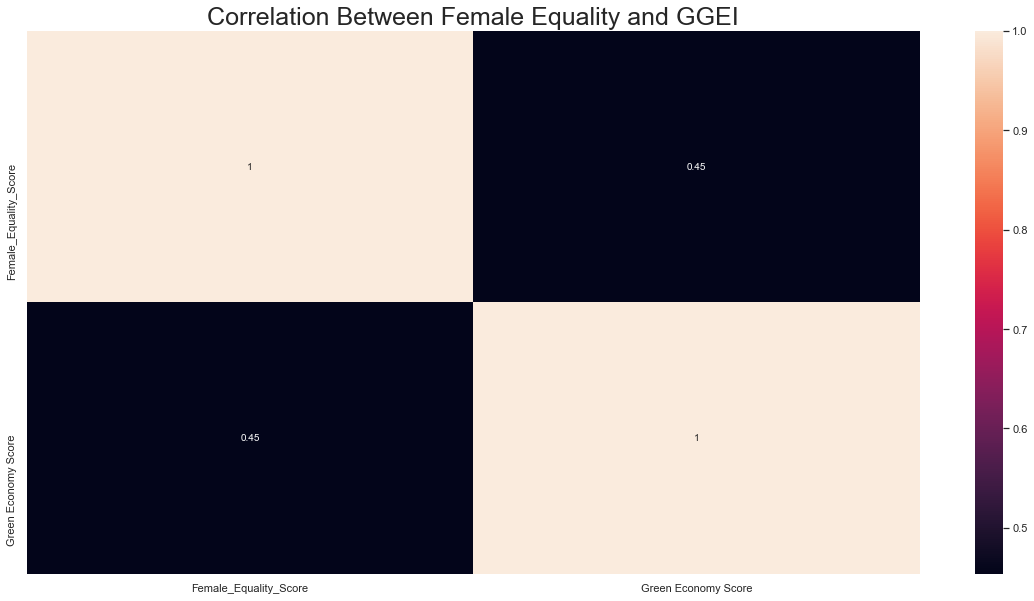

In [1785]:
correlation_climate_fe = FE_COMPLETE.merge(ggei)
correlation_climate_fe.rename(columns = {'stage_3_score':'Female_Equality_Score', 'score':'Green Economy Score'}, inplace = True)
plt.figure(figsize = (20, 10))
sns.heatmap(correlation_climate_fe.corr(), annot = True)
plt.title('Correlation Between Female Equality and GGEI', fontsize = 25);

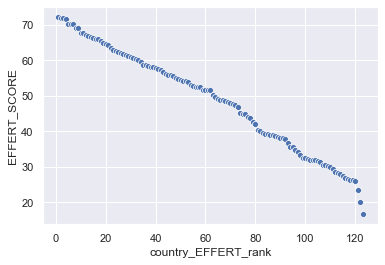

In [1792]:
sns.scatterplot(data=EFFERT_FINAL, y = 'EFFERT_SCORE', x = 'country_EFFERT_rank')

# What are the countries' rank changes?

In [1797]:
rank_change = EFI_FINAL.merge(EFFERT_FINAL)
rank_change.head()

country  economic_freedom_score  country_EFI_rank  EFFERT_SCORE  \
0    singapore                    88.8               1.0     70.144236   
1  new zealand                    84.2               2.0     69.222091   
2  switzerland                    81.7               3.0     71.818099   
3    australia                    80.9               4.0     64.493892   
4      ireland                    80.4               5.0     67.032650   

   country_EFFERT_rank  
0                  7.0  
1                  8.0  
2                  2.0  
3                 20.0  
4                 12.0

In [1807]:
rank_change['rank_change'] = rank_change['country_EFI_rank'] - rank_change['country_EFFERT_rank']

In [1824]:
EFI_to_EFFERT_rank_change = rank_change.sort_values('rank_change', ascending = False).reset_index().drop('index', axis = 1)

In [1829]:
EFI_to_EFFERT_rank_change['country'] = EFI_to_EFFERT_rank_change['country'].str.title()

In [1830]:
EFI_to_EFFERT_rank_change.head()

country  economic_freedom_score  country_EFI_rank  EFFERT_SCORE  \
0   Brazil                    51.4             113.0     54.136454   
1   Greece                    57.3              85.0     58.726967   
2  Ukraine                    51.9             111.5     48.906457   
3   France                    63.9              60.0     64.997071   
4  Croatia                    61.0              70.5     60.641311   

   country_EFFERT_rank  rank_change  
0                 51.0         62.0  
1                 36.0         49.0  
2                 67.0         44.5  
3                 19.0         41.0  
4                 31.0         39.5

In [1831]:
EFI_to_EFFERT_rank_change.to_csv('EFI_to_EFFERT_rank_change.csv')

In [1813]:
EFI_to_EFFERT_rank_change

country  economic_freedom_score  country_EFI_rank  \
0                      brazil                    51.4             113.0   
1                      greece                    57.3              85.0   
2                     ukraine                    51.9             111.5   
3                      france                    63.9              60.0   
4                     croatia                    61.0              70.5   
5                   argentina                    52.3             108.0   
6                    portugal                    63.4              61.0   
7                     burundi                    50.9             115.0   
8         trinidad and tobago                    57.7              83.0   
9                    mongolia                    55.7              92.5   
10                    lebanon                    53.2             105.0   
11                     russia                    58.2              80.0   
12                      spain                    65.1              51.0   
13                   djibouti                    45.1             122.0   
14                      italy                    62.5              63.5   
15                 cape verde                    60.0              72.5   
16                    ecuador                    48.5             119.0   
17                   maldives                    51.1             114.0   
18                    hungary                    66.7              47.0   
19                    belgium                    67.5              44.0   
20   central african republic                    49.2             118.0   
21                       togo                    47.8             120.0   
22                    finland                    74.1              24.0   
23               south africa                    63.0              62.0   
24                    vietnam                    53.1             106.0   
25                    moldova                    58.4              79.0   
26                    austria                    71.8              30.0   
27            slovak republic                    65.3              50.0   
28          equatorial guinea                    42.0             123.0   
29                     norway                    74.3              21.0   
30                    myanmar                    53.9             101.0   
31                   slovenia                    64.8              54.5   
32                 mozambique                    46.3             121.0   
33                    germany                    74.2              22.5   
34                       laos                    53.6             102.5   
35         dominican republic                    61.6              68.0   
36                   bulgaria                    68.3              40.0   
37                     sweden                    76.3              13.0   
38                     zambia                    54.3              98.0   
39                     serbia                    62.5              63.5   
40                      malta                    68.5              38.5   
41                     kuwait                    62.2              65.0   
42                      china                    57.8              82.0   
43                 costa rica                    65.6              48.0   
44                    iceland                    77.0              10.0   
45                     israel                    72.2              29.0   
46                   cambodia                    58.7              77.0   
47                       oman                    61.0              70.5   
48                    denmark                    76.6              11.0   
49                     latvia                    73.6              26.0   
50                   cameroon                    51.9             111.5   
51                  lithuania                    75.3              17.0   
52                      kenya                  

In [1821]:
FINAL_COPY_FE[FINAL_COPY_FE.country.str.contains('burundi')]

Unnamed: 0  country          region  year  percent_female_paid  \
14          14  burundi  eastern africa  2018                2.909   

    %_vulnerable_female_employees_reverse   industry_restrictions  \
14                                -9.7052  no gender restrictions   

    %_individuals_pay_difference  female_labor_participation_ratio  \
14                        -4.996                        103.493177   

    female_business_owners_%_of_total  
14                               44.0

In [1832]:
FINAL_COPY_FE[FINAL_COPY_FE.country.str.contains('brazil')]

Unnamed: 0 country         region  year  percent_female_paid  \
11          11  brazil  south america  2018            73.621002   

    %_vulnerable_female_employees_reverse   industry_restrictions  \
11                                 -2.316  no gender restrictions   

    %_individuals_pay_difference  female_labor_participation_ratio  \
11                     10.213001                          72.59072   

    female_business_owners_%_of_total  
11                               27.2

In [1823]:
ggei.sort_values('country')

country  score
37                    albania  53.66
38                    andorra  53.46
95                  argentina  43.41
88                    armenia  44.80
99                  australia  42.59
8                     austria  64.79
91                 azerbaijan  43.66
129                   bahrain  33.04
112                bangladesh  39.41
23                    belgium  57.37
127                     benin  34.34
126    bosnia and herzegovina  34.41
32                     brazil  54.17
106                  bulgaria  40.27
73               burkina faso  46.76
118                   burundi  38.79
53                   cambodia  50.22
72                   cameroon  47.08
15                     canada  59.66
41                 cape verde  52.55
92   central african republic  43.59
108                      chad  39.81
36                      chile  53.95
27                      china  55.31
11                   colombia  61.88
116                   comoros  39.12
13                 costa rica  61.42
55                    croatia  49.12
85                     cyprus  45.11
68             czech republic  47.73
6                     denmark  68.00
98                   djibouti  42.99
75                   dominica  46.67
93         dominican republic  43.54
65                    ecuador  47.94
66                      egypt  47.92
102         equatorial guinea  41.46
76                    estonia  46.62
39                   ethiopia  52.94
4                     finland  69.97
9                      france  64.05
63                      gabon  48.09
43                    georgia  51.83
5                     germany  68.90
78                      ghana  46.03
29                     greece  54.85
69                     guinea  47.46
125             guinea-bissau  35.10
128                     haiti  33.90
31                    hungary  54.19
2                     iceland  71.29
35                      india  53.98
82                  indonesia  45.27
14                    ireland  59.93
48                     israel  51.20
24                      italy  56.06
86                ivory coast  44.89
18                      japan  59.27
81                     jordan  45.70
20                      kenya  58.09
87                     kuwait  44.81
62                       laos  48.13
77                     latvia  46.32
109                   lebanon  39.70
46                  lithuania  51.59
42                 luxembourg  52.31
96                  macedonia  43.22
67                 madagascar  47.75
54                   malaysia  49.90
74                   maldives  46.70
100                      mali  42.26
44                      malta  51.63
122                mauritania  37.90
45                  mauritius  51.62
40                     mexico  52.63
117                   moldova  38.80
19                     monaco  59.09
119                  mongolia  38.34
101                montenegro  42.05
47                    morocco  51.28
97                 mozambique  43.04
84                    myanmar  45.15
60                      nepal  48.35
16                netherlands  59.37
17                new zealand  59.28
111                     niger  39.57
52                    nigeria  50.56
3                      norway  70.31
110                      oman  39.70
113                  pakistan  39.35
57                     panama  49.03
28                       peru  55.26
50                philippines  50.78
105                    poland  41.01
34                   portugal  54.05
71                      qatar  47.15
64                    romania  47.99
104                    russia  41.15
49                     rwanda  50.92
107               saint lucia  40.19
115     sao tome and principe  39.12
89               saudi arabia  44.51
94                    senegal  43.46
114                    serbia  39.27
70                 seychelles  47.23
12                  singapore  61.54
83            slovak republic  45.27
51                   slove

## Creating a region rank for EFFERT Index

In [1836]:
region_rank = data_2018[['Country', 'Region Rank']]

In [1842]:
#loop through countries and add in region 
regions = []
for x in EFFERT_FINAL['country']:
    a = cc.convert(names = x, to = 'unregion')
    regions.append(a)

In [1848]:
EFFERT_FINAL['region'] = regions
EFFERT_FINAL = change_column_order(EFFERT_FINAL, 'region', 1)
EFFERT_FINAL

country                     region  EFFERT_SCORE  \
0                      sweden            Northern Europe     72.277567   
1                 switzerland             Western Europe     71.818099   
2                     iceland            Northern Europe     71.792557   
3                      norway            Northern Europe     71.707644   
4                     finland            Northern Europe     70.271340   
5                     denmark            Northern Europe     70.253521   
6                   singapore         South-Eastern Asia     70.144236   
7                 new zealand  Australia and New Zealand     69.222091   
8                     germany             Western Europe     69.052090   
9              united kingdom            Northern Europe     67.652842   
10                     canada           Northern America     67.610895   
11                    ireland            Northern Europe     67.032650   
12                    austria             Western Europe     66.894056   
13                  lithuania            Northern Europe     66.494469   
14              united states           Northern America     66.177704   
15                    estonia            Northern Europe     66.112529   
16                netherlands             Western Europe     66.068148   
17                 luxembourg             Western Europe     65.479186   
18                     france             Western Europe     64.997071   
19                  australia  Australia and New Zealand     64.493892   
20                     latvia            Northern Europe     64.203831   
21                    belgium             Western Europe     63.507614   
22                     israel               Western Asia     62.861931   
23                      spain            Southern Europe     62.494699   
24                    hungary             Eastern Europe     62.312667   
25                   portugal            Southern Europe     62.190492   
26                   bulgaria             Eastern Europe     61.859389   
27                  mauritius             Eastern Africa     61.405943   
28             czech republic             Eastern Europe     61.155586   
29                      malta            Southern Europe     60.837072   
30                    croatia            Southern Europe     60.641311   
31                    uruguay              South America     60.249586   
32            slovak republic             Eastern Europe     60.128301   
33                      qatar               Western Asia     59.548850   
34                      chile              South America     58.729383   
35                     greece            Southern Europe     58.726967   
36                      italy            Southern Europe     58.513756   
37                     poland             Eastern Europe     58.202130   
38                   slovenia            Southern Europe     58.081390   
39                 costa rica            Central America     57.840432   
40                      japan               Eastern Asia     57.597079   
41                    romania             Eastern Europe     57.394261   
42               south africa            Southern Africa     56.837360   
43                saint lucia                  Caribbean     56.160027   
44                south korea               Eastern Asia     55.946418   
45                 cape verde             Western Africa     55.799846   
46                    georgia               Western Asia     55.605650   
47                   colombia              South America     55.104457   
48                     cyprus               Western Asia     54.796963   
49        trinidad and tobago                  Caribbean     54.411257   
50                     brazil              South America     54.136454   
51                     russia             Eastern Europe     54.112104   
52                     serbia            Southern Europe     54.031553   
53                     pan

In [1857]:
EFFERT_FINAL.groupby('region').country.size()

region
Australia and New Zealand     2
Caribbean                     4
Central America               3
Eastern Africa               11
Eastern Asia                  5
Eastern Europe                9
Middle Africa                 7
Northern Africa               3
Northern America              2
Northern Europe              10
South America                 7
South-Eastern Asia            8
Southern Africa               1
Southern Asia                 5
Southern Europe              12
Western Africa               13
Western Asia                 14
Western Europe                7
Name: country, dtype: int64

In [1882]:
EFFERT_FINAL['region_rank'] = EFFERT_FINAL.groupby("region")["EFFERT_SCORE"].rank(ascending = 0, method = 'dense')

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1885]:
EFFERT_FINAL.rename(columns = {'country_EFFERT_rank':'global_rank'}, inplace = True)
EFFERT_FINAL

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


country                     region  EFFERT_SCORE  \
0                      sweden            Northern Europe     72.277567   
1                 switzerland             Western Europe     71.818099   
2                     iceland            Northern Europe     71.792557   
3                      norway            Northern Europe     71.707644   
4                     finland            Northern Europe     70.271340   
5                     denmark            Northern Europe     70.253521   
6                   singapore         South-Eastern Asia     70.144236   
7                 new zealand  Australia and New Zealand     69.222091   
8                     germany             Western Europe     69.052090   
9              united kingdom            Northern Europe     67.652842   
10                     canada           Northern America     67.610895   
11                    ireland            Northern Europe     67.032650   
12                    austria             Western Europe     66.894056   
13                  lithuania            Northern Europe     66.494469   
14              united states           Northern America     66.177704   
15                    estonia            Northern Europe     66.112529   
16                netherlands             Western Europe     66.068148   
17                 luxembourg             Western Europe     65.479186   
18                     france             Western Europe     64.997071   
19                  australia  Australia and New Zealand     64.493892   
20                     latvia            Northern Europe     64.203831   
21                    belgium             Western Europe     63.507614   
22                     israel               Western Asia     62.861931   
23                      spain            Southern Europe     62.494699   
24                    hungary             Eastern Europe     62.312667   
25                   portugal            Southern Europe     62.190492   
26                   bulgaria             Eastern Europe     61.859389   
27                  mauritius             Eastern Africa     61.405943   
28             czech republic             Eastern Europe     61.155586   
29                      malta            Southern Europe     60.837072   
30                    croatia            Southern Europe     60.641311   
31                    uruguay              South America     60.249586   
32            slovak republic             Eastern Europe     60.128301   
33                      qatar               Western Asia     59.548850   
34                      chile              South America     58.729383   
35                     greece            Southern Europe     58.726967   
36                      italy            Southern Europe     58.513756   
37                     poland             Eastern Europe     58.202130   
38                   slovenia            Southern Europe     58.081390   
39                 costa rica            Central America     57.840432   
40                      japan               Eastern Asia     57.597079   
41                    romania             Eastern Europe     57.394261   
42               south africa            Southern Africa     56.837360   
43                saint lucia                  Caribbean     56.160027   
44                south korea               Eastern Asia     55.946418   
45                 cape verde             Western Africa     55.799846   
46                    georgia               Western Asia     55.605650   
47                   colombia              South America     55.104457   
48                     cyprus               Western Asia     54.796963   
49        trinidad and tobago                  Caribbean     54.411257   
50                     brazil              South America     54.136454   
51                     russia             Eastern Europe     54.112104   
52                     serbia            Southern Europe     54.031553   
53                     pan

## Seeing regional rank changes by creating region rank from EFI Index countries that were included in EFFERT

In [1965]:
#loop through countries and add in region 
regions = []
for x in EFI_FINAL['country']:
    a = cc.convert(names = x, to = 'unregion')
    regions.append(a)
EFI_FINAL['region'] = regions
EFI_FINAL = change_column_order(EFI_FINAL, 'region', 2)
EFI_FINAL.head()

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


country  economic_freedom_score                     region  \
0    singapore                    88.8         South-Eastern Asia   
1  new zealand                    84.2  Australia and New Zealand   
2  switzerland                    81.7             Western Europe   
3    australia                    80.9  Australia and New Zealand   
4      ireland                    80.4            Northern Europe   

   country_EFI_rank  
0               1.0  
1               2.0  
2               3.0  
3               4.0  
4               5.0

In [1968]:
EFI_FINAL['region_rank'] = EFI_FINAL.groupby('region')['economic_freedom_score'].rank(ascending = 0, method = 'dense')
EFI_FINAL

C:\Users\Sam Cannon\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


country  economic_freedom_score  \
0                   singapore                    88.8   
1                 new zealand                    84.2   
2                 switzerland                    81.7   
3                   australia                    80.9   
4                     ireland                    80.4   
5                     estonia                    78.8   
6              united kingdom                    78.0   
7                      canada                    77.7   
8        united arab emirates                    77.6   
9                     iceland                    77.0   
10                    denmark                    76.6   
11                 luxembourg                    76.4   
12                     sweden                    76.3   
13                    georgia                    76.2   
14                netherlands                    76.2   
15              united states                    75.7   
16                  lithuania                    75.3   
17                      chile                    75.2   
18                  mauritius                    75.1   
19                   malaysia                    74.5   
20                     norway                    74.3   
21             czech republic                    74.2   
22                    germany                    74.2   
23                    finland                    74.1   
24                south korea                    73.8   
25                     latvia                    73.6   
26                      qatar                    72.6   
27                      japan                    72.3   
28                     israel                    72.2   
29                    austria                    71.8   
30                  macedonia                    71.3   
31                    romania                    69.4   
32                    uruguay                    69.2   
33                     rwanda                    69.1   
34                   colombia                    68.9   
35                       peru                    68.7   
36                    armenia                    68.7   
37                      malta                    68.5   
38                     poland                    68.5   
39                   bulgaria                    68.3   
40                     cyprus                    67.8   
41                    bahrain                    67.7   
42                saint lucia                    67.6   
43                    belgium                    67.5   
44                   thailand                    67.1   
45                     panama                    67.0   
46                    hungary                    66.7   
47                 costa rica                    65.6   
48                     turkey                    65.4   
49            slovak republic                    65.3   
50                      spain                    65.1   
51                philippines                    65.0   
52                     jordan                    64.9   
53                   slovenia                    64.8   
54                     mexico                    64.8   
55                    albania                    64.5   
56                 montenegro                    64.3   
57                 azerbaijan                    64.3   
58                  indonesia                    64.2   
59                     france                    63.9   
60                   portugal                    63.4   
61               south africa                    63.0   
62                      italy                    62.5   
63                     serbia                    62.5   
64                     kuwait                    62.2   
65                ivory coast                    62.0   
66                    morocco                    61.9   
67         dominican republic                    61.6   
68     bosnia and herzegovina                    61.4   
69                    croatia   

In [1973]:
EFFERT_FINAL

country                     region  EFFERT_SCORE  \
0                      sweden            Northern Europe     72.277567   
1                 switzerland             Western Europe     71.818099   
2                     iceland            Northern Europe     71.792557   
3                      norway            Northern Europe     71.707644   
4                     finland            Northern Europe     70.271340   
5                     denmark            Northern Europe     70.253521   
6                   singapore         South-Eastern Asia     70.144236   
7                 new zealand  Australia and New Zealand     69.222091   
8                     germany             Western Europe     69.052090   
9              united kingdom            Northern Europe     67.652842   
10                     canada           Northern America     67.610895   
11                    ireland            Northern Europe     67.032650   
12                    austria             Western Europe     66.894056   
13                  lithuania            Northern Europe     66.494469   
14              united states           Northern America     66.177704   
15                    estonia            Northern Europe     66.112529   
16                netherlands             Western Europe     66.068148   
17                 luxembourg             Western Europe     65.479186   
18                     france             Western Europe     64.997071   
19                  australia  Australia and New Zealand     64.493892   
20                     latvia            Northern Europe     64.203831   
21                    belgium             Western Europe     63.507614   
22                     israel               Western Asia     62.861931   
23                      spain            Southern Europe     62.494699   
24                    hungary             Eastern Europe     62.312667   
25                   portugal            Southern Europe     62.190492   
26                   bulgaria             Eastern Europe     61.859389   
27                  mauritius             Eastern Africa     61.405943   
28             czech republic             Eastern Europe     61.155586   
29                      malta            Southern Europe     60.837072   
30                    croatia            Southern Europe     60.641311   
31                    uruguay              South America     60.249586   
32            slovak republic             Eastern Europe     60.128301   
33                      qatar               Western Asia     59.548850   
34                      chile              South America     58.729383   
35                     greece            Southern Europe     58.726967   
36                      italy            Southern Europe     58.513756   
37                     poland             Eastern Europe     58.202130   
38                   slovenia            Southern Europe     58.081390   
39                 costa rica            Central America     57.840432   
40                      japan               Eastern Asia     57.597079   
41                    romania             Eastern Europe     57.394261   
42               south africa            Southern Africa     56.837360   
43                saint lucia                  Caribbean     56.160027   
44                south korea               Eastern Asia     55.946418   
45                 cape verde             Western Africa     55.799846   
46                    georgia               Western Asia     55.605650   
47                   colombia              South America     55.104457   
48                     cyprus               Western Asia     54.796963   
49        trinidad and tobago                  Caribbean     54.411257   
50                     brazil              South America     54.136454   
51                     russia             Eastern Europe     54.112104   
52                     serbia            Southern Europe     54.031553   
53                     pan

In [1974]:
EFI_FINAL

country  economic_freedom_score  \
0                   singapore                    88.8   
1                 new zealand                    84.2   
2                 switzerland                    81.7   
3                   australia                    80.9   
4                     ireland                    80.4   
5                     estonia                    78.8   
6              united kingdom                    78.0   
7                      canada                    77.7   
8        united arab emirates                    77.6   
9                     iceland                    77.0   
10                    denmark                    76.6   
11                 luxembourg                    76.4   
12                     sweden                    76.3   
13                    georgia                    76.2   
14                netherlands                    76.2   
15              united states                    75.7   
16                  lithuania                    75.3   
17                      chile                    75.2   
18                  mauritius                    75.1   
19                   malaysia                    74.5   
20                     norway                    74.3   
21             czech republic                    74.2   
22                    germany                    74.2   
23                    finland                    74.1   
24                south korea                    73.8   
25                     latvia                    73.6   
26                      qatar                    72.6   
27                      japan                    72.3   
28                     israel                    72.2   
29                    austria                    71.8   
30                  macedonia                    71.3   
31                    romania                    69.4   
32                    uruguay                    69.2   
33                     rwanda                    69.1   
34                   colombia                    68.9   
35                       peru                    68.7   
36                    armenia                    68.7   
37                      malta                    68.5   
38                     poland                    68.5   
39                   bulgaria                    68.3   
40                     cyprus                    67.8   
41                    bahrain                    67.7   
42                saint lucia                    67.6   
43                    belgium                    67.5   
44                   thailand                    67.1   
45                     panama                    67.0   
46                    hungary                    66.7   
47                 costa rica                    65.6   
48                     turkey                    65.4   
49            slovak republic                    65.3   
50                      spain                    65.1   
51                philippines                    65.0   
52                     jordan                    64.9   
53                   slovenia                    64.8   
54                     mexico                    64.8   
55                    albania                    64.5   
56                 montenegro                    64.3   
57                 azerbaijan                    64.3   
58                  indonesia                    64.2   
59                     france                    63.9   
60                   portugal                    63.4   
61               south africa                    63.0   
62                      italy                    62.5   
63                     serbia                    62.5   
64                     kuwait                    62.2   
65                ivory coast                    62.0   
66                    morocco                    61.9   
67         dominican republic                    61.6   
68     bosnia and herzegovina                    61.4   
69                    croatia   

In [1978]:
df = EFI_FINAL.merge(EFFERT_FINAL, on = ['country', 'region'])

In [1984]:
df.rename(columns = {'region_rank_x':'EFI_region_rank', 'country_EFI_rank':'EFI_global_rank', 'global_rank':'EFFERT_global_rank', 
                     'region_rank_y':'EFFERT_region_rank'}, inplace = True)
df.head(1)

country  economic_freedom_score              region  EFI_global_rank  \
0  singapore                    88.8  South-Eastern Asia              1.0   

   EFI_region_rank  EFFERT_SCORE  EFFERT_global_rank  EFFERT_region_rank  
0              1.0     70.144236                 7.0                 1.0

In [1991]:
df['global_rank_change'] = df['EFI_global_rank'] - df['EFFERT_global_rank']
df['regional_rank_change'] = df['EFI_region_rank'] - df['EFFERT_region_rank']
df['country'] = df.country.str.title()
df

country  economic_freedom_score  \
0                   Singapore                    88.8   
1                 New Zealand                    84.2   
2                 Switzerland                    81.7   
3                   Australia                    80.9   
4                     Ireland                    80.4   
5                     Estonia                    78.8   
6              United Kingdom                    78.0   
7                      Canada                    77.7   
8        United Arab Emirates                    77.6   
9                     Iceland                    77.0   
10                    Denmark                    76.6   
11                 Luxembourg                    76.4   
12                     Sweden                    76.3   
13                    Georgia                    76.2   
14                Netherlands                    76.2   
15              United States                    75.7   
16                  Lithuania                    75.3   
17                      Chile                    75.2   
18                  Mauritius                    75.1   
19                   Malaysia                    74.5   
20                     Norway                    74.3   
21             Czech Republic                    74.2   
22                    Germany                    74.2   
23                    Finland                    74.1   
24                South Korea                    73.8   
25                     Latvia                    73.6   
26                      Qatar                    72.6   
27                      Japan                    72.3   
28                     Israel                    72.2   
29                    Austria                    71.8   
30                  Macedonia                    71.3   
31                    Romania                    69.4   
32                    Uruguay                    69.2   
33                     Rwanda                    69.1   
34                   Colombia                    68.9   
35                       Peru                    68.7   
36                    Armenia                    68.7   
37                      Malta                    68.5   
38                     Poland                    68.5   
39                   Bulgaria                    68.3   
40                     Cyprus                    67.8   
41                    Bahrain                    67.7   
42                Saint Lucia                    67.6   
43                    Belgium                    67.5   
44                   Thailand                    67.1   
45                     Panama                    67.0   
46                    Hungary                    66.7   
47                 Costa Rica                    65.6   
48                     Turkey                    65.4   
49            Slovak Republic                    65.3   
50                      Spain                    65.1   
51                Philippines                    65.0   
52                     Jordan                    64.9   
53                   Slovenia                    64.8   
54                     Mexico                    64.8   
55                    Albania                    64.5   
56                 Montenegro                    64.3   
57                 Azerbaijan                    64.3   
58                  Indonesia                    64.2   
59                     France                    63.9   
60                   Portugal                    63.4   
61               South Africa                    63.0   
62                      Italy                    62.5   
63                     Serbia                    62.5   
64                     Kuwait                    62.2   
65                Ivory Coast                    62.0   
66                    Morocco                    61.9   
67         Dominican Republic                    61.6   
68     Bosnia And Herzegovina                    61.4   
69                    Croatia   

In [1994]:
df.to_csv('FINAL_VERSION_OF_EFFERT_PROJECT.csv')

# This marks the end of the EFFERT Index project, I will be updating this posting with a link to the blog post outlining the spirit behind this Index and the methodology!

## Note: I had to treat The Congo as one area in order to be able to include the countries in my analysis, since the GGEI only scored "The Congo" rather than DRC and RC separately, I can understand if this is offensive but I wanted to keep them in there to capture the data so that it could be useful still.. please contact me with any questions at fultoncannon@gmail.com